In [ ]:
install.packages("rbcb")  # para obter os dados do SGS do Banco Central do Brasil
install.packages("stats")
install.packages("urca")       # para os testes de raiz unitária
install.packages("fpp3")       # para gerar as previsões
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘xts’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘ggplot2’, ‘quadprog’, ‘warp’, ‘BH’, ‘Rcpp’, ‘distributional’, ‘progressr’, ‘ggdist’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘RcppArmadillo’




In [ ]:
library(rbcb)
library(ggplot2)
library(stats)
library(urca)
library(fpp3)
library(tidyverse)
library(forecast)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.0 ──

✔ tibble      3.2.1     ✔ tsibbledata 0.4.1
✔ dplyr       1.1.4     ✔ feasts      0.3.2
✔ tidyr       1.3.1     ✔ fable       0.3.4
✔ lubridate   1.9.3     ✔ fabletools  0.4.2
✔ tsibble     1.1.5     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ readr   2.1.5
✔ purrr   1.0.2     ✔ stringr 1.5.1
── Conflicts ────────────────────────────────────────── tidy

In [ ]:
cod <- c(433
        ,1635
        ,1636
        ,1637
        ,1638
        ,1639
        ,1640
        ,1641
        ,1642
        ,1643)

In [ ]:
ipca  <- get_series( cod, start_date = '2004-01-01', as = "ts" )

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version



In [ ]:
dat <- data.frame( ipca = ipca$`433`
                  ,alimentacao_e_bebidas = ipca$`1635`
                  ,habitacao = ipca$`1636`
                  ,artigos_de_residencia = ipca$`1637`
                  ,vestuario = ipca$`1638`
                  ,transportes = ipca$`1639`
                  ,comunicacao = ipca$`1640`
                  ,saude_e_cuidados_pessoais = ipca$`1641`
                  ,despesas_pessoais = ipca$`1642`
                  ,educacao = ipca$`1643`
                  )
head(dat)

ipca alimentacao_e_bebidas habitacao artigos_de_residencia vestuario
1 0.76  0.88                 1.16      0.37                   0.03    
2 0.61  0.15                 0.29      0.43                  -0.23    
3 0.47  0.43                 0.59      0.70                   0.46    
4 0.37 -0.34                 0.82      0.31                   1.11    
5 0.51  0.23                 0.62      0.29                   1.34    
6 0.71  0.72                 0.20      0.63                   1.14    
  transportes comunicacao saude_e_cuidados_pessoais despesas_pessoais educacao
1  0.79        0.16       0.43                      0.97              0.68    
2  0.52        0.83       0.28                      0.39              6.70    
3 -0.08        0.72       0.74                      1.02              0.62    
4  0.12       -0.01       1.59                      0.30              0.40    
5  0.54        0.06       1.25                      0.08              0.25    
6  1.58        0.06       0.42                      0.30              0.19

In [ ]:
str(dat)

'data.frame':	245 obs. of  10 variables:
 $ ipca                     : Time-Series  from 2004 to 2024: 0.76 0.61 0.47 0.37 0.51 0.71 0.91 0.69 0.33 0.44 ...
 $ alimentacao_e_bebidas    : Time-Series  from 2004 to 2024: 0.88 0.15 0.43 -0.34 0.23 0.72 0.67 0.85 -0.19 -0.23 ...
 $ habitacao                : Time-Series  from 2004 to 2024: 1.16 0.29 0.59 0.82 0.62 0.2 1.28 0.34 0.3 0.46 ...
 $ artigos_de_residencia    : Time-Series  from 2004 to 2024: 0.37 0.43 0.7 0.31 0.29 0.63 0.43 -0.03 0.68 0.49 ...
 $ vestuario                : Time-Series  from 2004 to 2024: 0.03 -0.23 0.46 1.11 1.34 1.14 0.51 0.5 0.96 1.12 ...
 $ transportes              : Time-Series  from 2004 to 2024: 0.79 0.52 -0.08 0.12 0.54 1.58 1.03 1.21 0.36 0.98 ...
 $ comunicacao              : Time-Series  from 2004 to 2024: 0.16 0.83 0.72 -0.01 0.06 0.06 4.46 0.64 2.82 0.69 ...
 $ saude_e_cuidados_pessoais: Time-Series  from 2004 to 2024: 0.43 0.28 0.74 1.59 1.25 0.42 0.48 0.42 0 0.4 ...
 $ despesas_pessoais        : Ti

In [ ]:
dat$mes=time(dat$ipca)

# **IPCA agregado**

In [ ]:
treino <- head(dat, round(nrow(dat) * 0.7))
teste <- tail(dat, round(nrow(dat) * 0.3)-1)

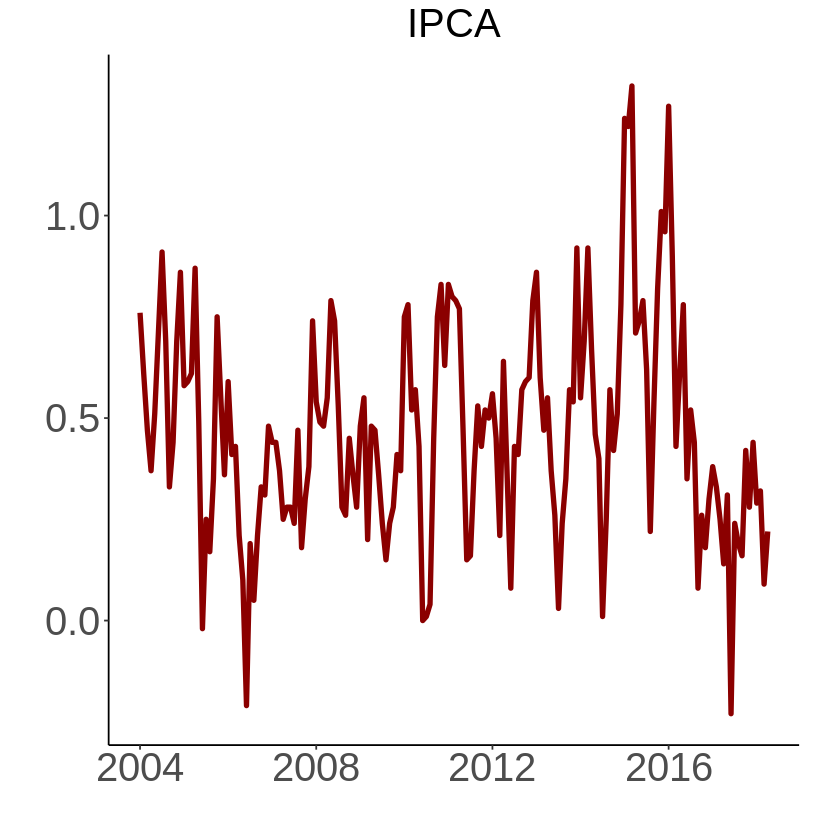

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

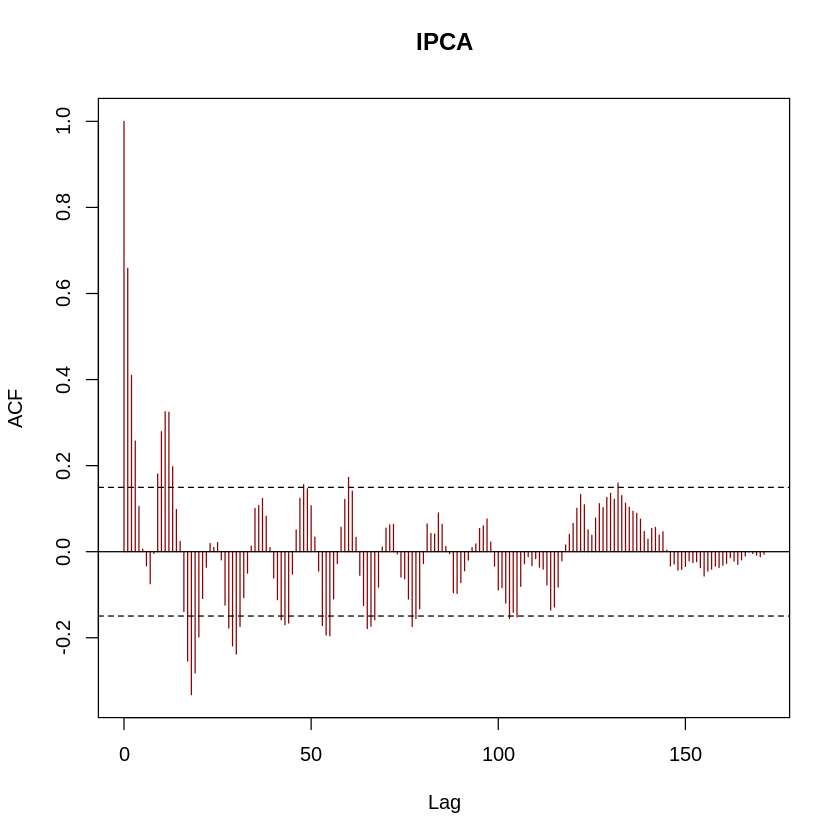

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

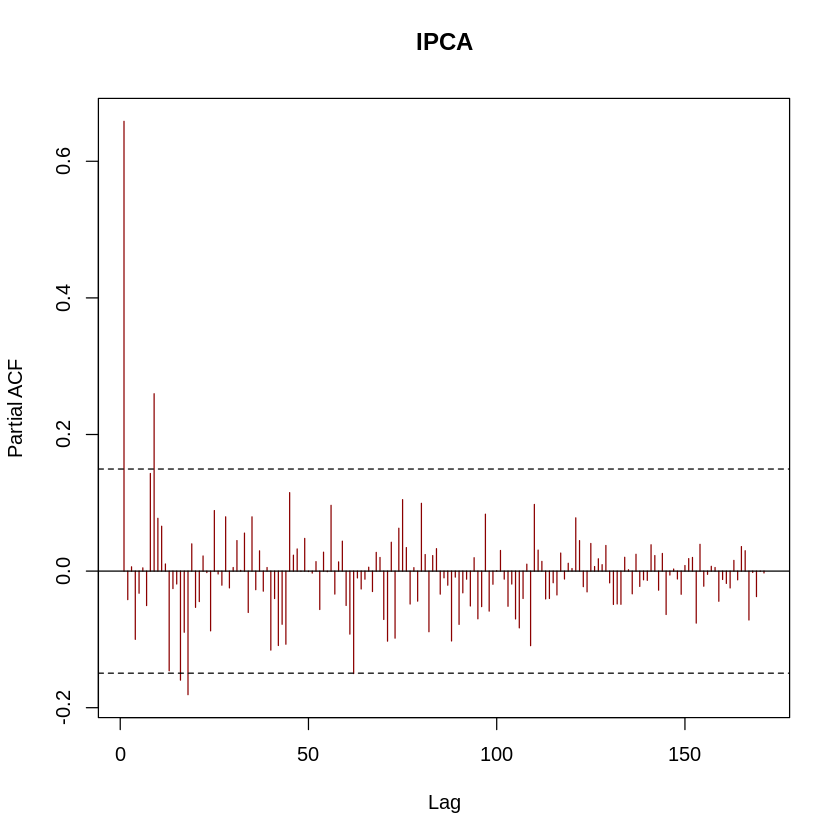

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50124 -0.09945 -0.00426  0.10851  0.56241 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.0989246  0.0568906   1.739   0.0842 .
z.lag.1      -0.2565064  0.1136870  -2.256   0.0256 *
tt            0.0001508  0.0003507   0.430   0.6679  
z.diff.lag1  -0.1440251  0.1295535  -1.112   0.2681  
z.diff.lag2  -0.1077721  0.1292403  -0.834   0.4057  
z.diff.lag3  -0.0061075  0.1278103  -0.048   0.9620  
z.diff.lag4  -0.0425770  0.1236815  -0.344   0.7312  
z.diff.lag5  -0.1154677  0.1151087  -1.003   0.3175  
z.diff.lag6  -0.1121854  0.1058135  -1.060   0.2908  
z.diff.lag7  -0.2238631  0.1035114  -2.163   0.0322 *
z.diff.lag8  -0.2511498  0.1001250  -2.508   0.0132 *


Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1282 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.15 1  
2 -0.14 2  
3 -0.10 3  
4  0.14 4  
5  0.20 5  
6  0.20 6

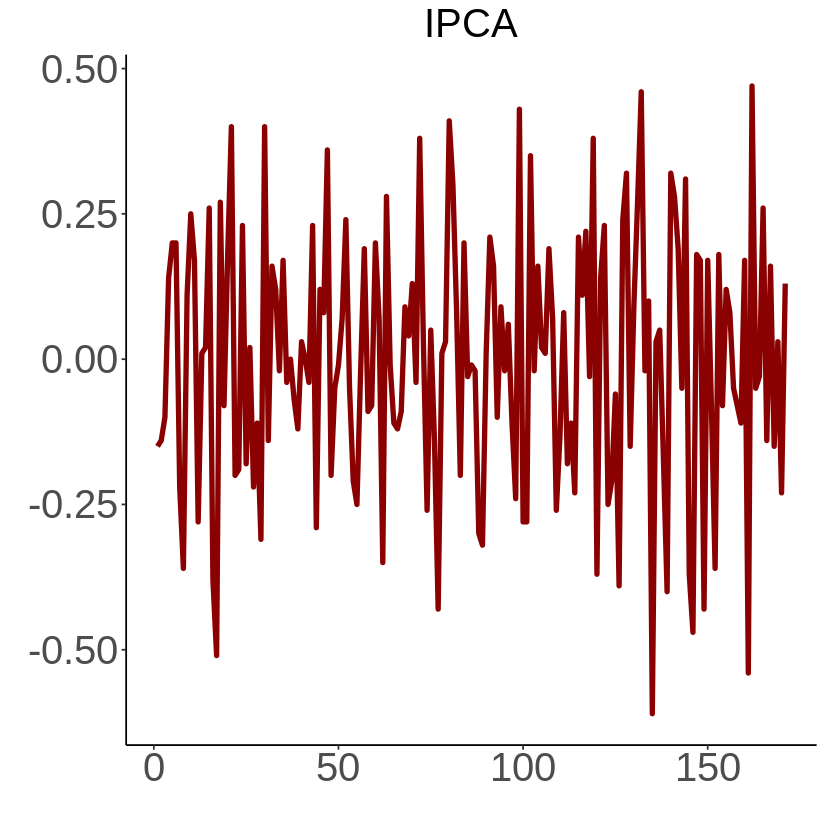

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

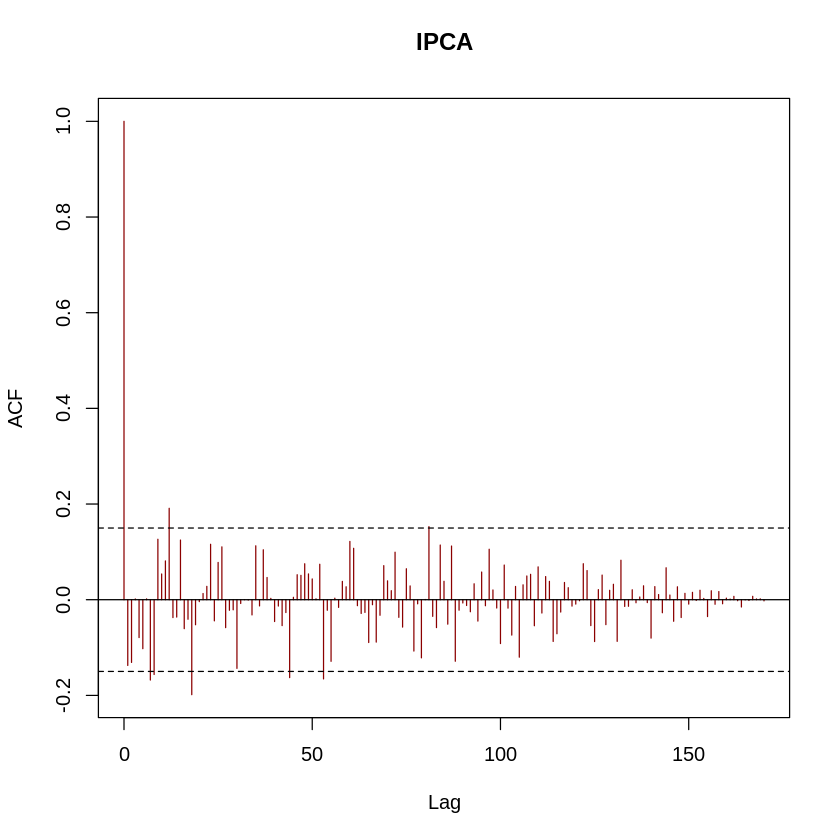

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

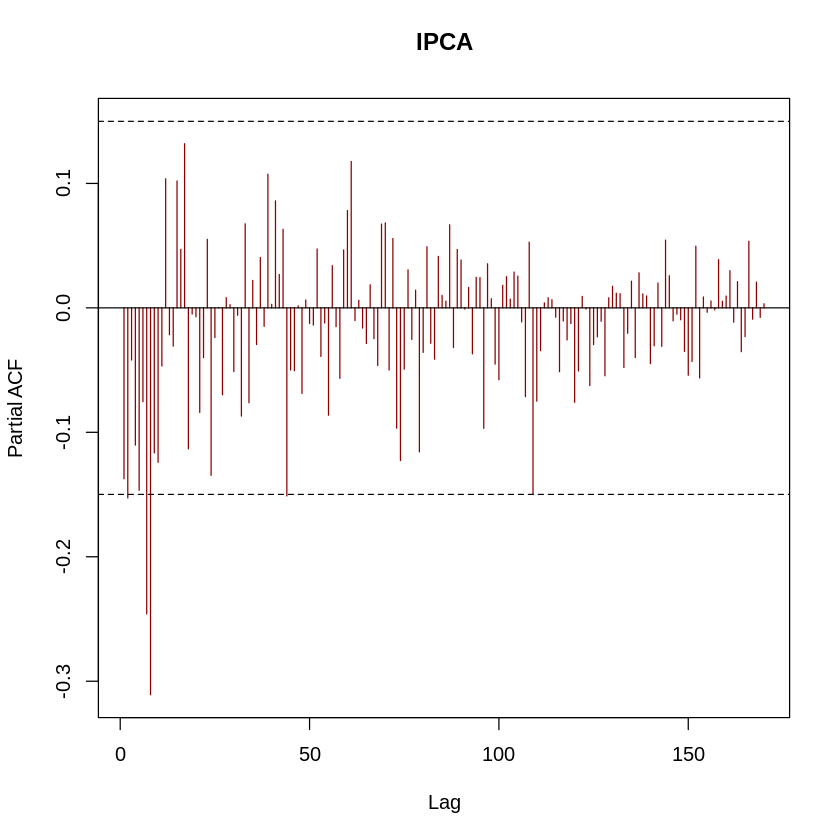

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54515 -0.10744  0.01751  0.11546  0.55250 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.509e-03  3.554e-02  -0.127  0.89923    
z.lag.1      -3.574e+00  7.374e-01  -4.847 3.22e-06 ***
tt           -4.827e-05  3.483e-04  -0.139  0.88997    
z.diff.lag1   2.208e+00  7.087e-01   3.115  0.00222 ** 
z.diff.lag2   1.881e+00  6.655e-01   2.827  0.00537 ** 
z.diff.lag3   1.666e+00  6.117e-01   2.723  0.00727 ** 
z.diff.lag4   1.428e+00  5.520e-01   2.587  0.01068 *  
z.diff.lag5   1.138e+00  4.882e-01   2.331  0.02117 *  
z.diff.lag6   8.764e-01  4.274e-01   2.051  0.04213 *  
z.diff.lag7   5.181e-01  3.718e-01   1.394  0.16563    
z.diff.lag8   1.511e-01  3.127e-

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), rejeita-se a hipótese nula do teste ADF. Portanto não se pode afirmar que a série temporal possui raiz unitária, o que significa que não se pode afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0204 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`433`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.76  0.61  0.47  0.37  0.51  0.71  0.91  0.69  0.33  0.44  0.69  0.86
2005  0.58  0.59  0.61  0.87  0.49 -0.02  0.25  0.17  0.35  0.75  0.55  0.36
2006  0.59  0.41  0.43  0.21  0.10 -0.21  0.19  0.05  0.21  0.33  0.31  0.48
2007  0.44  0.44  0.37  0.25  0.28  0.28  0.24  0.47  0.18  0.30  0.38  0.74
2008  0.54  0.49  0.48  0.55  0.79  0.74  0.53  0.28  0.26  0.45  0.36  0.28
2009  0.48  0.55  0.20  0.48  0.47  0.36  0.24  0.15  0.24  0.28  0.41  0.37
2010  0.75  0.78  0.52  0.57  0.43  0.00  0.01  0.04  0.45  0.75  0.83  0.63
2011  0.83  0.80  0.79  0.77  0.47  0.15  0.16  0.37  0.53  0.43  0.52  0.50
2012  0.56  0.45  0.21  0.64  0.36  0.08  0.43  0.41  0.57  0.59  0.60  0.79
2013  0.86  0.60  0.47  0.55  0.37  0.26  0.03  0.24  0.35  0.57  0.54  0.92
2014  0.55  0.69  0.92  0.67  0.46  0.40  0.01  0.25  0.57  0.42  0.51  0.78
2015  1.24  1.22  1.32  0.71  0.74  0.79  0.62  0.22  0.54  0.82  1.01  0.96
2016  1.27  0.90  0.43  0.61  0.78  0.35  0.52  0.44  0.08  0.26  0.18  0.30
2017  0.38  0.33  0.25  0.14  0.31 -0.23  0.24  0.19  0.16  0.42  0.28  0.44
2018  0.29  0.32  0.09  0.22  0.40  1.26  0.33 -0.09  0.48  0.45 -0.21  0.15
2019  0.32  0.43  0.75  0.57  0.13  0.01  0.19  0.11 -0.04  0.10  0.51  1.15
2020  0.21  0.25  0.07 -0.31 -0.38  0.26  0.36  0.24  0.64  0.86  0.89  1.35
2021  0.25  0.86  0.93  0.31  0.83  0.53  0.96  0.87  1.16  1.25  0.95  0.73
2022  0.54  1.01  1.62  1.06  0.47  0.67 -0.68 -0.36 -0.29  0.59  0.41  0.62
2023  0.53  0.84  0.71  0.61  0.23 -0.08  0.12  0.23  0.26  0.24  0.28  0.56
2024  0.42  0.83  0.16  0.38  0.46

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(1,0,0)(2,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1     sar2    mean
      0.6364  0.2732  -0.1095  0.4681
s.e.  0.0593  0.0808   0.0831  0.0478

sigma^2 = 0.03817:  log likelihood = 38.03
AIC=-66.07   AICc=-65.7   BIC=-50.33

In [ ]:
accuracy(arima_treino,train=treino)

ME         RMSE    MAE       MPE  MAPE MASE      ACF1      
Training set -0.0021462 0.19309 0.1531067 -Inf Inf  0.6553523 0.02380301

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME        RMSE      MAE       MPE      MAPE     MASE ACF1
Training set 0.2166535 0.2166535 0.2166535 28.50704 28.50704 NaN  NaN

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


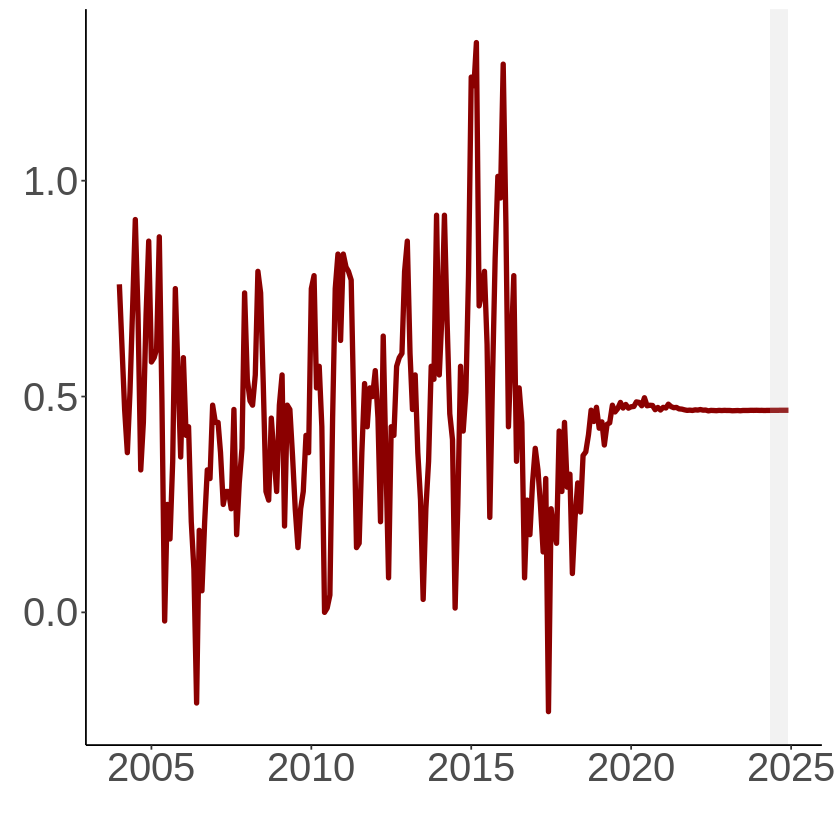

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

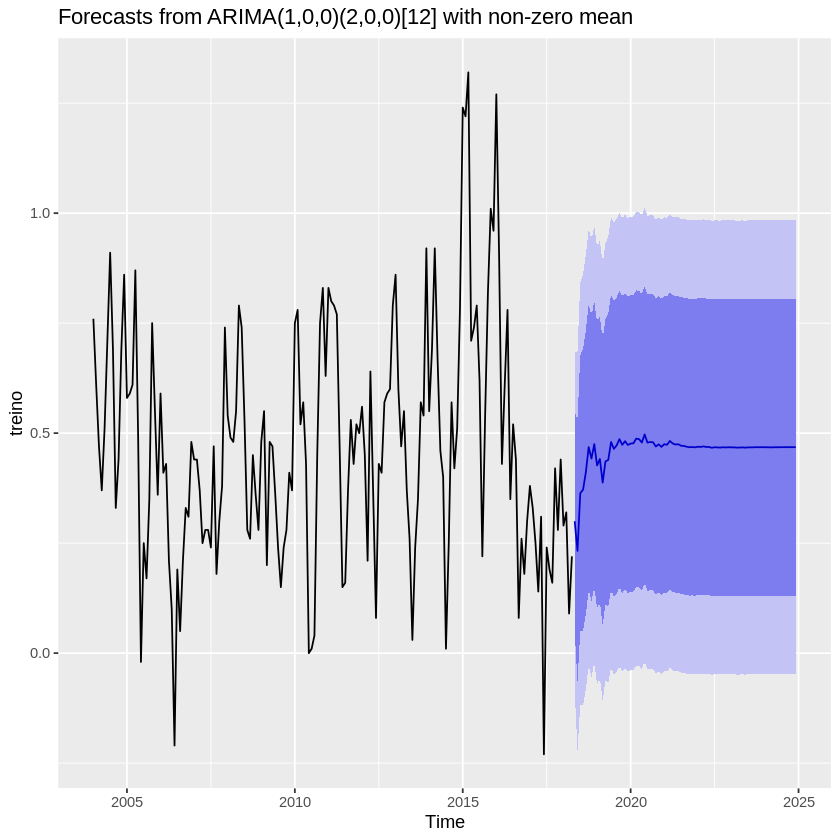

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

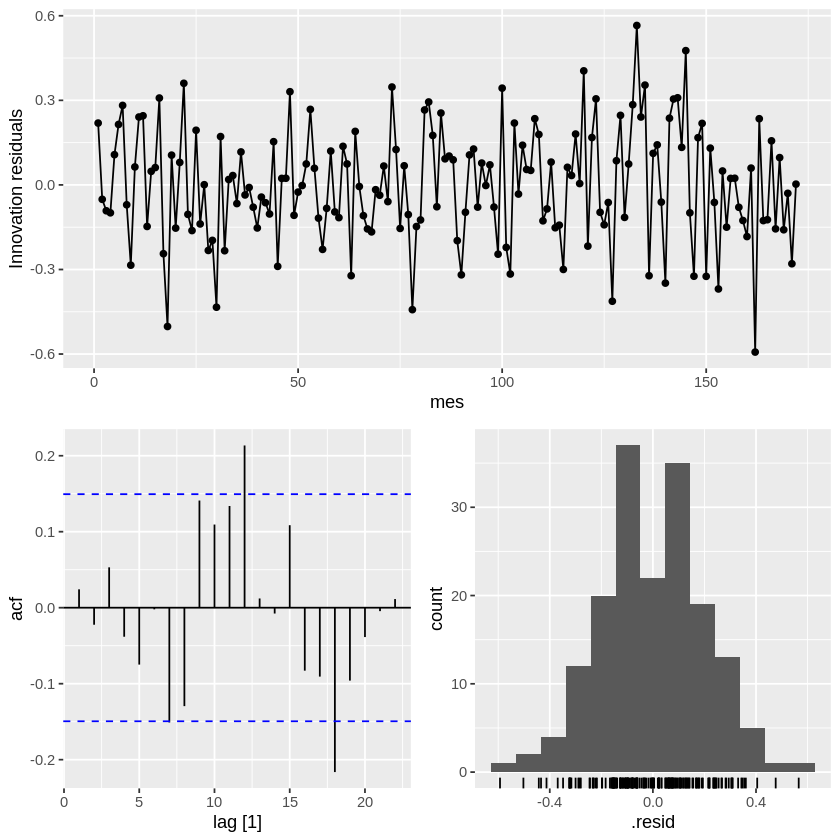

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
ipca_acumulado_agregado=(prod(df$value)-1)*100
ipca_acumulado_agregado

[1] 5.762844

# **IPCA desagregado - Alimentação e bebidas**

In [ ]:
dat_ipca <- data.frame( ipca = dat$alimentacao_e_bebidas, mes = time(dat$alimentacao_e_bebidas))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

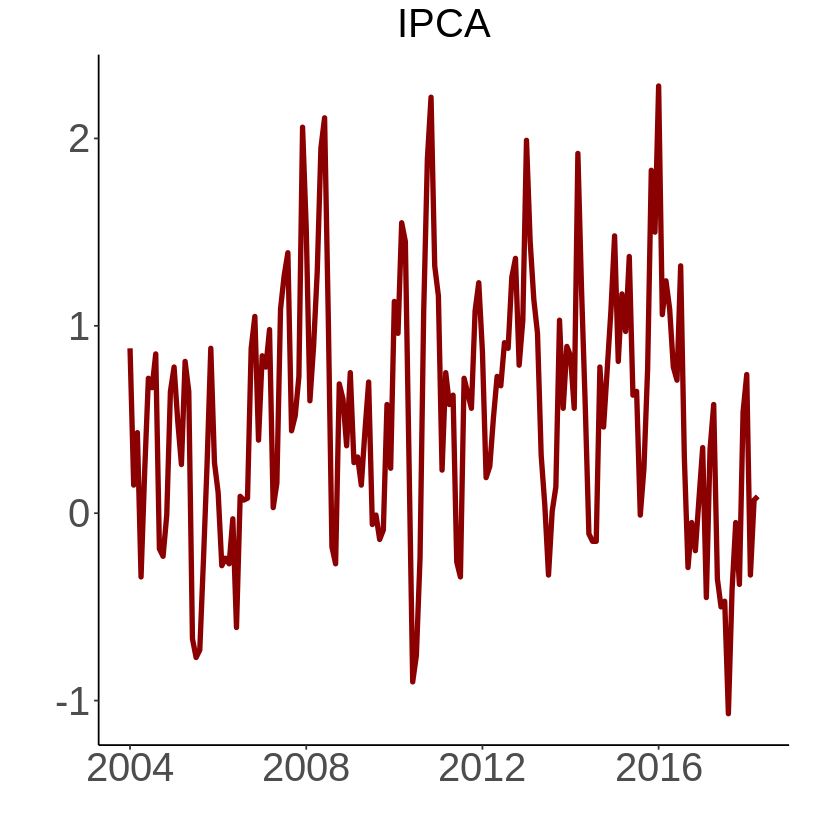

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

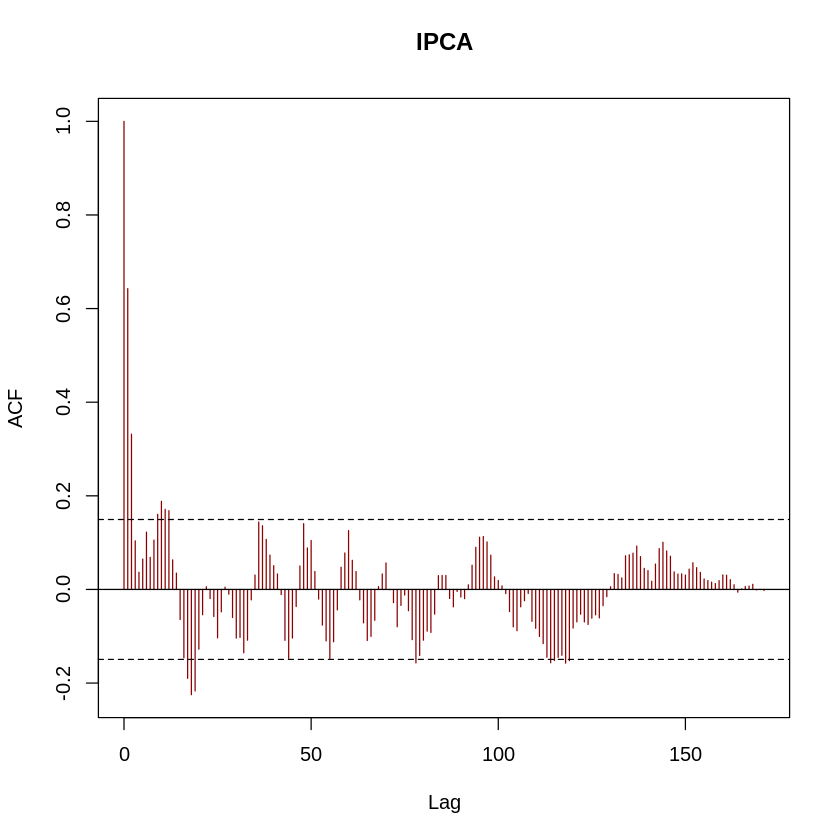

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

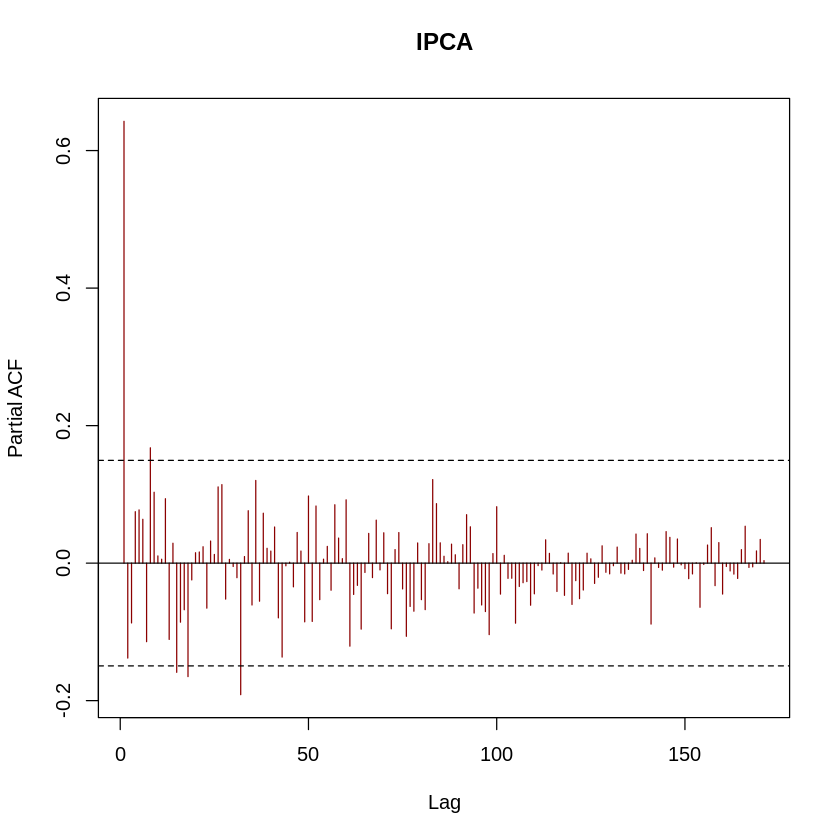

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35164 -0.33203 -0.05012  0.33653  1.55201 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.1555717  0.1031648   1.508   0.1337  
z.lag.1      -0.2532217  0.1207798  -2.097   0.0378 *
tt           -0.0002358  0.0009088  -0.259   0.7956  
z.diff.lag1   0.0167279  0.1361750   0.123   0.9024  
z.diff.lag2  -0.0910194  0.1333374  -0.683   0.4959  
z.diff.lag3  -0.1934622  0.1303719  -1.484   0.1400  
z.diff.lag4  -0.1979451  0.1295103  -1.528   0.1286  
z.diff.lag5  -0.1601786  0.1269581  -1.262   0.2091  
z.diff.lag6   0.0211011  0.1192046   0.177   0.8597  
z.diff.lag7  -0.2509449  0.1165480  -2.153   0.0330 *
z.diff.lag8  -0.1094163  0.1135142  -0.964   0.3367  


Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1902 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.01), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.73 1  
2  0.28 2  
3 -0.77 3  
4  0.57 4  
5  0.49 5  
6 -0.05 6

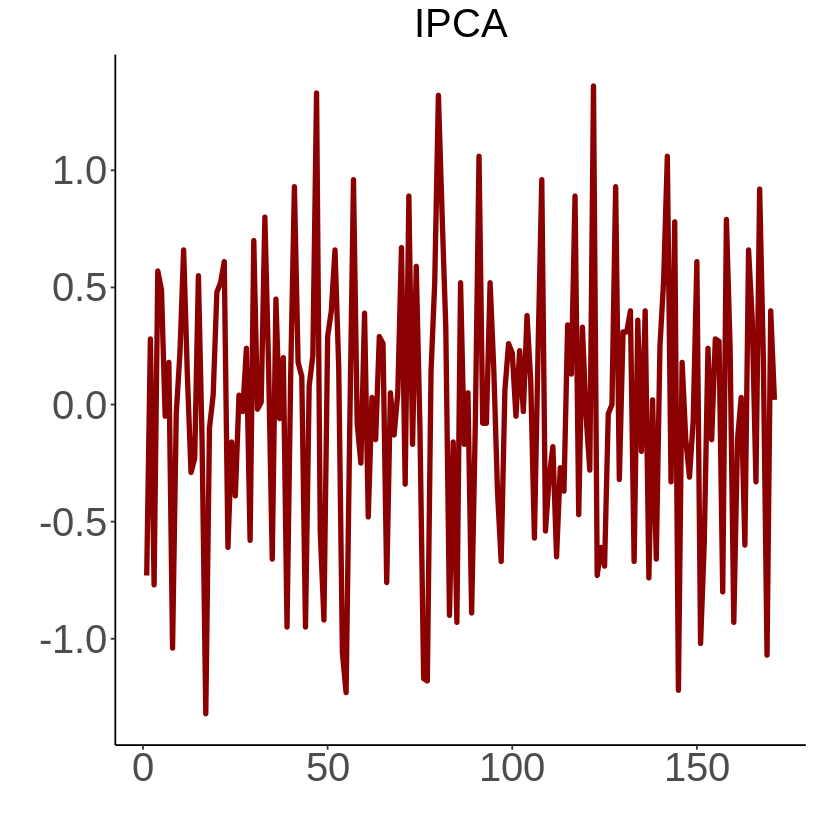

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

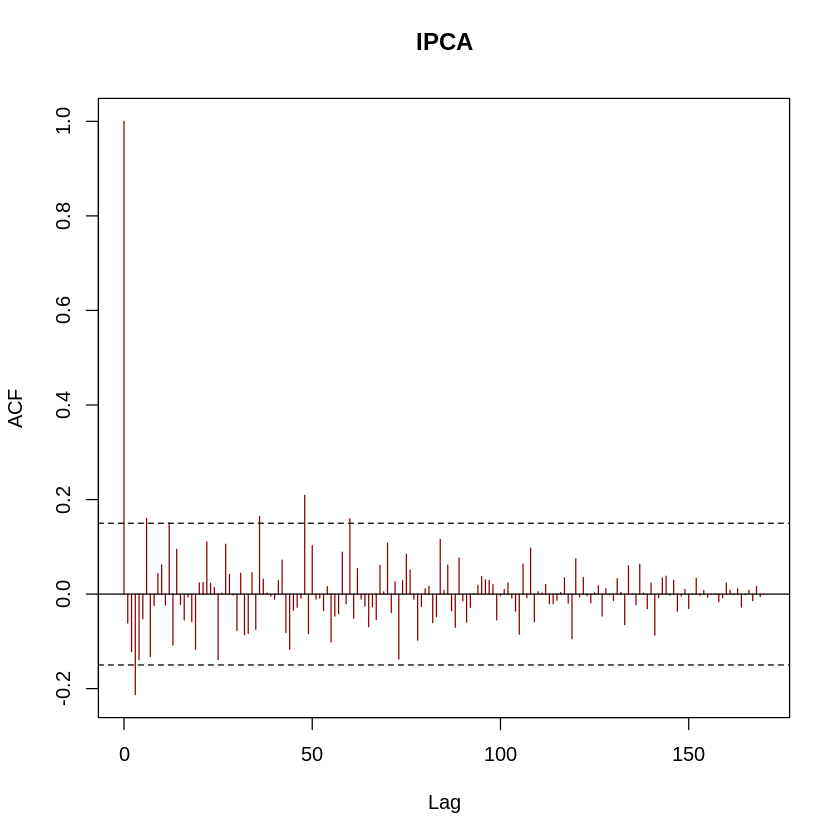

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

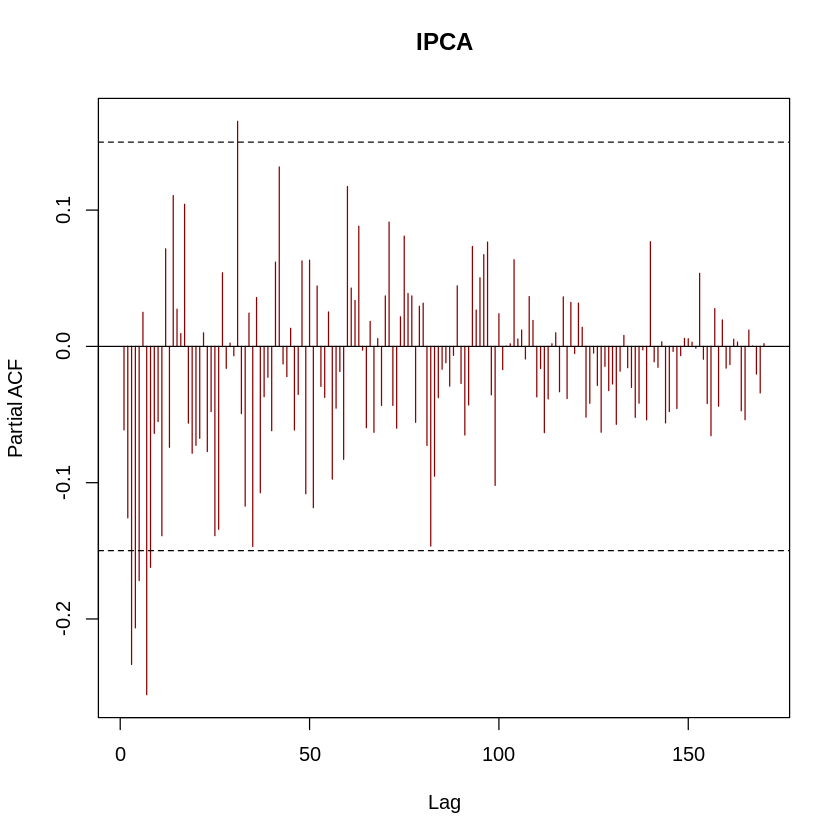

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28856 -0.37520 -0.01916  0.36526  1.47748 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0610620  0.0921444   0.663 0.508604    
z.lag.1      -3.9395804  0.7407084  -5.319 3.94e-07 ***
tt           -0.0007819  0.0009085  -0.861 0.390861    
z.diff.lag1   2.7358528  0.7109712   3.848 0.000179 ***
z.diff.lag2   2.4159265  0.6711840   3.599 0.000439 ***
z.diff.lag3   2.0117433  0.6266486   3.210 0.001637 ** 
z.diff.lag4   1.6152574  0.5725773   2.821 0.005468 ** 
z.diff.lag5   1.2561868  0.5091202   2.467 0.014791 *  
z.diff.lag6   1.0985312  0.4429803   2.480 0.014304 *  
z.diff.lag7   0.6910114  0.3817844   1.810 0.072403 .  
z.diff.lag8   0.4357092  0.31354

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), rejeita-se a hipótese nula do teste ADF. Portanto não se pode afirmar que a série temporal possui raiz unitária, o que significa que não se pode afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0176 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1635`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.88  0.15  0.43 -0.34  0.23  0.72  0.67  0.85 -0.19 -0.23 -0.01  0.65
2005  0.78  0.49  0.26  0.81  0.65 -0.67 -0.77 -0.73 -0.25  0.27  0.88  0.27
2006  0.11 -0.28 -0.24 -0.27 -0.03 -0.61  0.09  0.07  0.08  0.88  1.05  0.39
2007  0.84  0.78  0.98  0.03  0.16  1.09  1.27  1.39  0.44  0.52  0.73  2.06
2008  1.52  0.60  0.89  1.29  1.95  2.11  1.05 -0.18 -0.27  0.69  0.61  0.36
2009  0.75  0.27  0.30  0.15  0.44  0.70 -0.06 -0.01 -0.14 -0.09  0.58  0.24
2010  1.13  0.96  1.55  1.45  0.28 -0.90 -0.76 -0.24  1.08  1.89  2.22  1.32
2011  1.16  0.23  0.75  0.58  0.63 -0.26 -0.34  0.72  0.64  0.56  1.08  1.23
2012  0.86  0.19  0.25  0.51  0.73  0.68  0.91  0.88  1.26  1.36  0.79  1.03
2013  1.99  1.45  1.14  0.96  0.31  0.04 -0.33  0.01  0.14  1.03  0.56  0.89
2014  0.84  0.56  1.92  1.19  0.58 -0.11 -0.15 -0.15  0.78  0.46  0.77  1.08
2015  1.48  0.81  1.17  0.97  1.37  0.63  0.65 -0.01  0.24  0.77  1.83  1.50
2016  2.28  1.06  1.24  1.09  0.78  0.71  1.32  0.30 -0.29 -0.05 -0.20  0.08
2017  0.35 -0.45  0.34  0.58 -0.35 -0.50 -0.47 -1.07 -0.41 -0.05 -0.38  0.54
2018  0.74 -0.33  0.07  0.09  0.32  2.03 -0.12 -0.34  0.10  0.59  0.39  0.44
2019  0.90  0.78  1.37  0.63 -0.56 -0.25  0.01 -0.35 -0.43  0.05  0.72  3.38
2020  0.39  0.11  1.13  1.79  0.24  0.38  0.01  0.78  2.28  1.93  2.54  1.74
2021  1.02  0.27  0.13  0.40  0.44  0.43  0.60  1.39  1.02  1.17 -0.04  0.84
2022  1.11  1.28  2.42  2.06  0.48  0.80  1.30  0.24 -0.51  0.72  0.53  0.66
2023  0.59  0.16  0.05  0.71  0.16 -0.66 -0.46 -0.85 -0.71  0.31  0.63  1.11
2024  1.38  0.95  0.53  0.70  0.62

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(2,0,0)(0,0,1)[12] with non-zero mean 

Coefficients:
         ar1      ar2    sma1    mean
      0.7446  -0.1694  0.2154  0.5234
s.e.  0.0752   0.0758  0.0835  0.1060

sigma^2 = 0.2498:  log likelihood = -123.33
AIC=256.66   AICc=257.03   BIC=272.4

In [ ]:
accuracy(arima_treino,train=treino)

ME            RMSE     MAE      MPE      MAPE     MASE    
Training set -0.0009343482 0.493995 0.397207 54.61935 161.8434 0.581722
             ACF1        
Training set -0.006554721

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME         RMSE      MAE      MPE     MAPE     MASE     
Training set 0.05281762 0.3683292 0.342059 -72.553 120.2746 0.6674321
             ACF1       
Training set -0.02056475

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


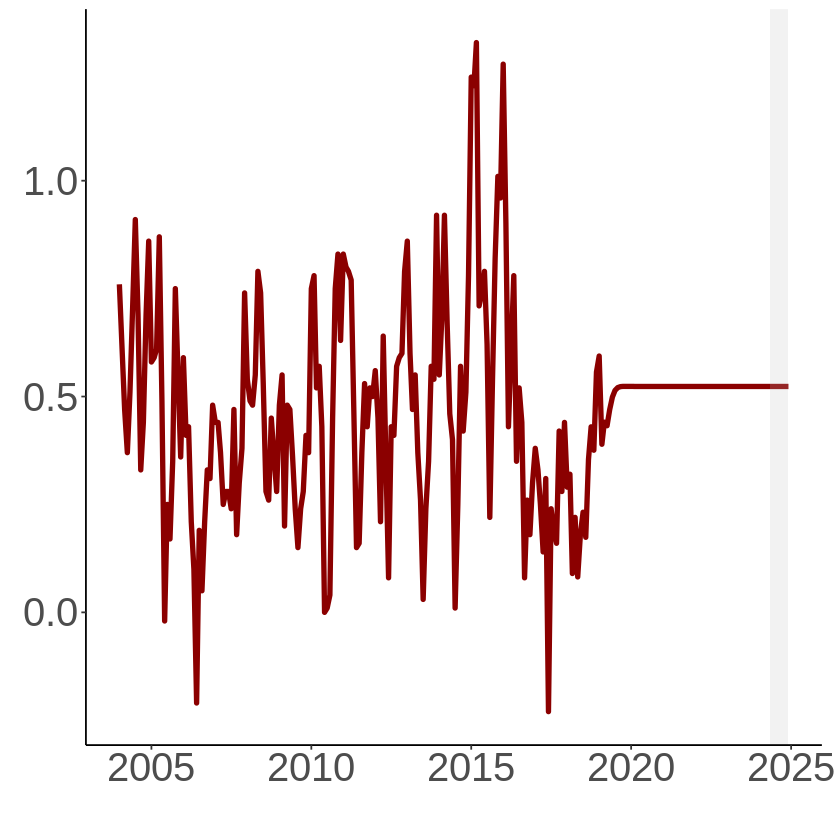

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

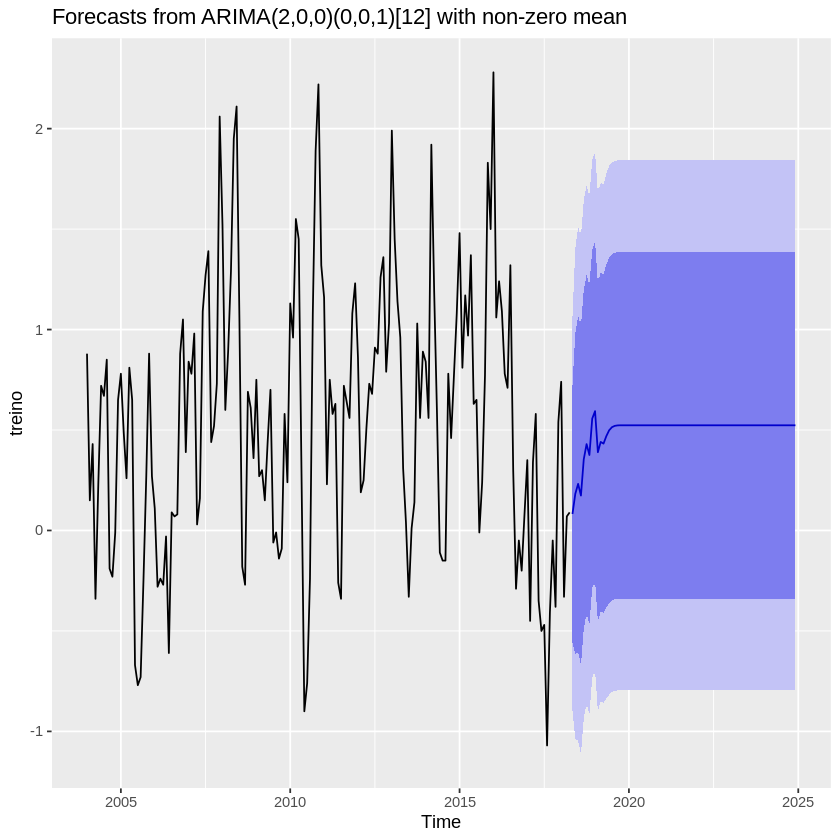

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

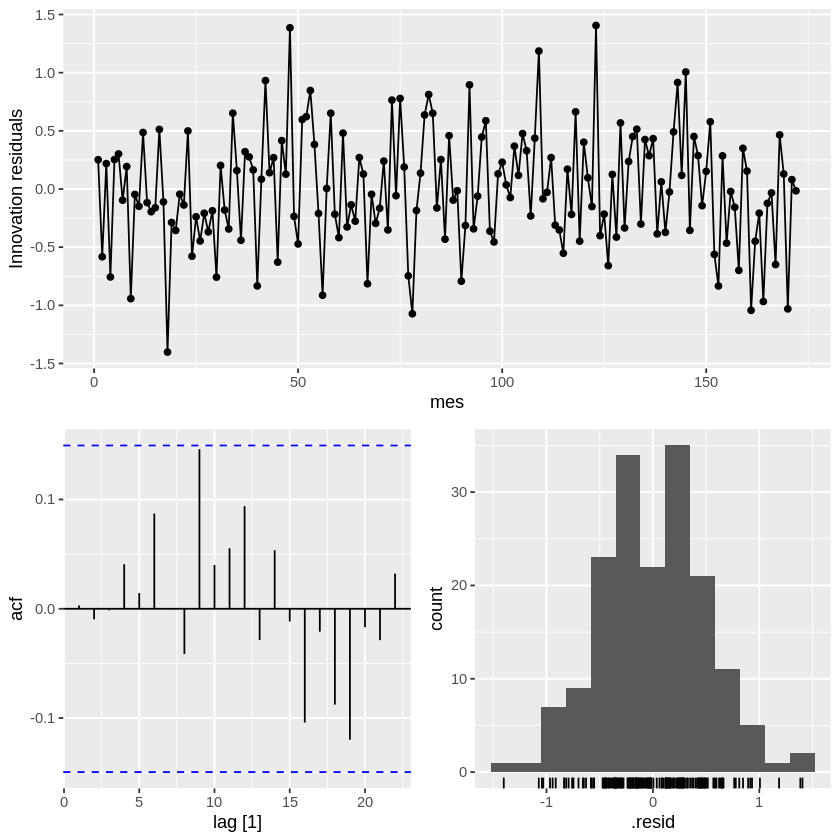

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
alimentacao_e_bebidas_acumulado=(prod(df$value)-1)*100
alimentacao_e_bebidas_acumulado

[1] 6.464459

# **IPCA desagregado - Habitação**

In [ ]:
dat_ipca <- data.frame( ipca = dat$habitacao, mes = time(dat$habitacao))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

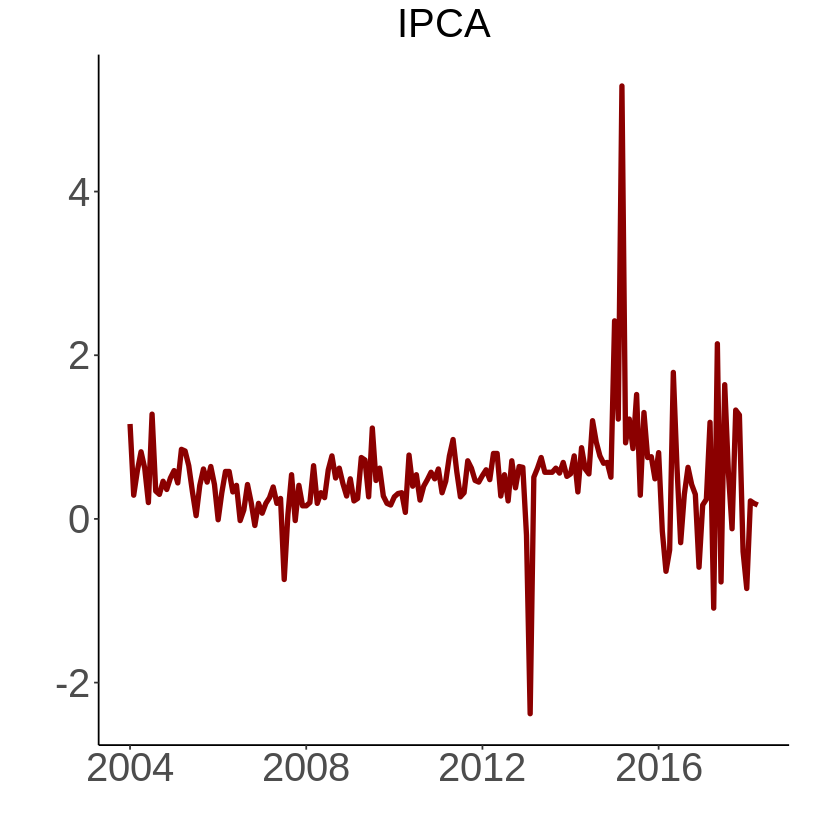

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

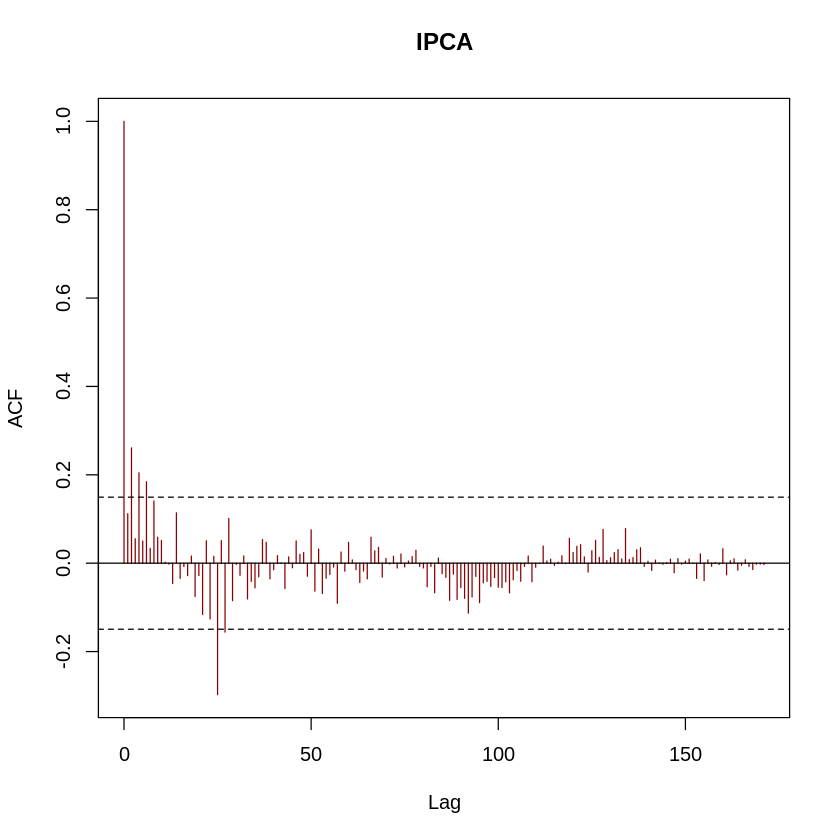

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

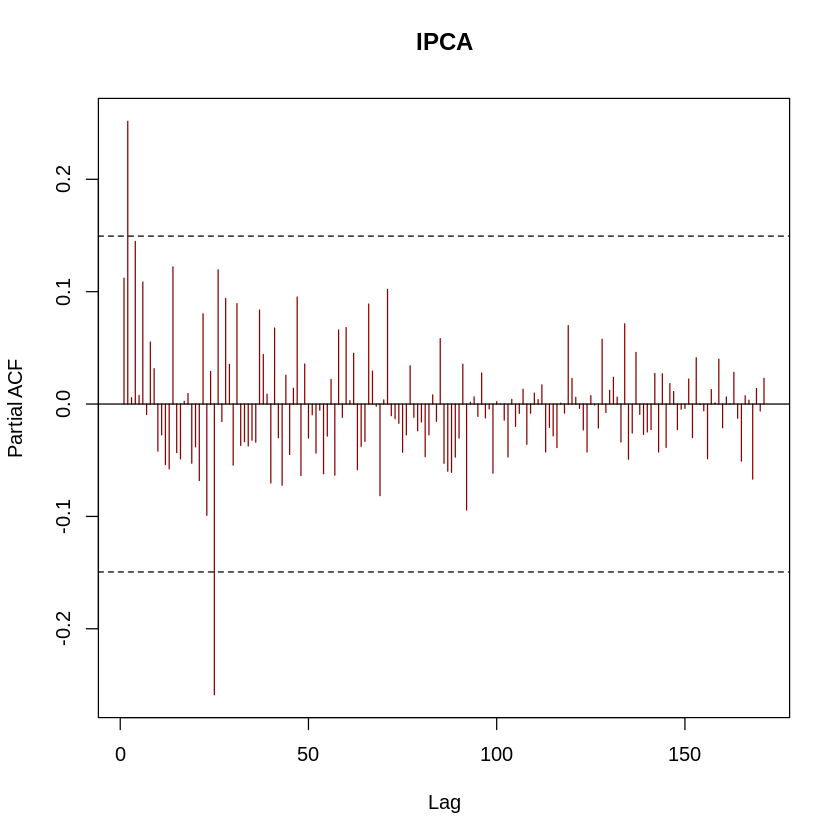

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7889 -0.1952  0.0049  0.2128  4.2521 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.1984467  0.1263652   1.570  0.11851   
z.lag.1      -0.5985553  0.1935245  -3.093  0.00238 **
tt            0.0009443  0.0011800   0.800  0.42488   
z.diff.lag1  -0.3241309  0.1908962  -1.698  0.09168 . 
z.diff.lag2  -0.1282933  0.1886240  -0.680  0.49750   
z.diff.lag3  -0.1538987  0.1846355  -0.834  0.40593   
z.diff.lag4  -0.0262147  0.1811011  -0.145  0.88511   
z.diff.lag5  -0.0084045  0.1771510  -0.047  0.96223   
z.diff.lag6   0.0825520  0.1708507   0.483  0.62970   
z.diff.lag7   0.0681177  0.1658595   0.411  0.68191   
z.diff.lag8   0.1440534  0.1568824   0.918  0.36004  

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1114 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.87 1  
2  0.30 2  
3  0.23 3  
4 -0.20 4  
5 -0.42 5  
6  1.08 6

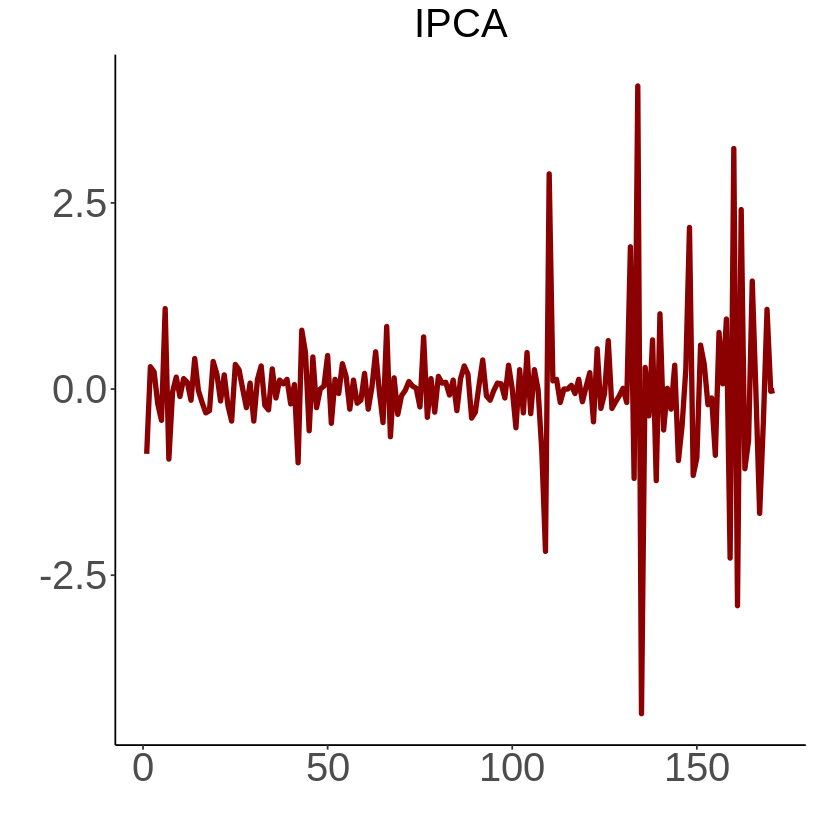

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

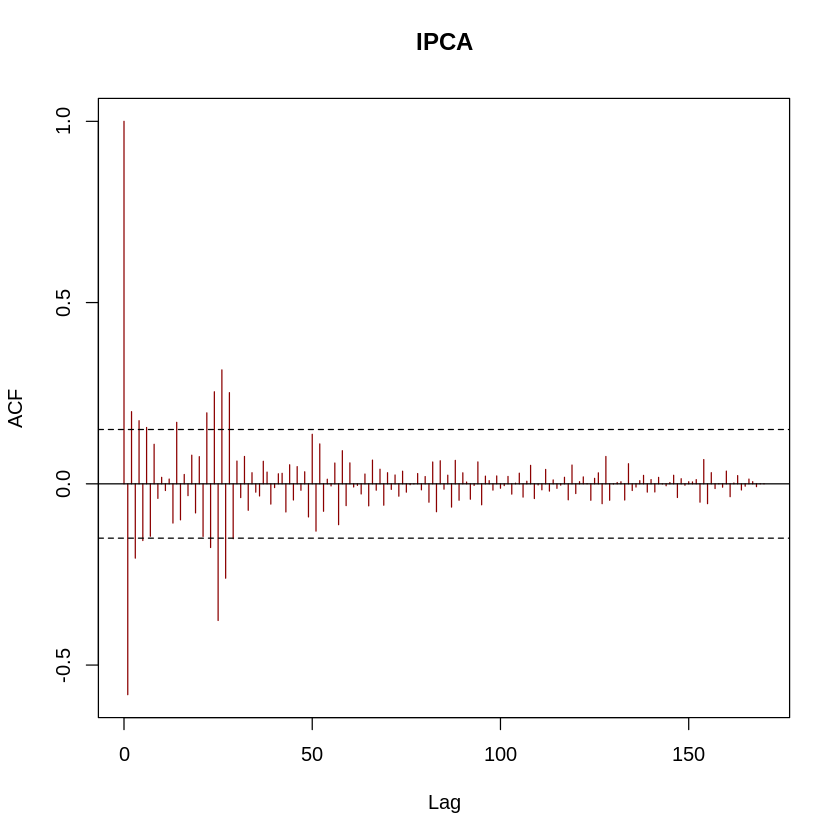

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

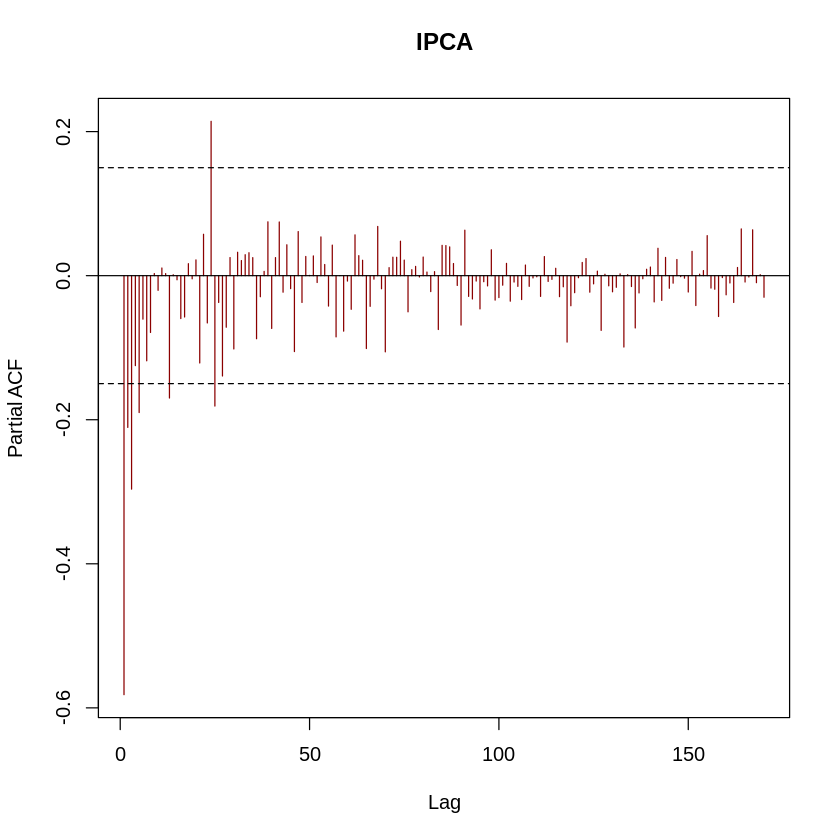

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7335 -0.2020  0.0000  0.2039  4.0812 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0188682  0.1152853   0.164 0.870225    
z.lag.1      -5.3262335  1.0446682  -5.098 1.07e-06 ***
tt           -0.0003243  0.0011287  -0.287 0.774249    
z.diff.lag1   3.4663167  1.0187801   3.402 0.000866 ***
z.diff.lag2   2.8591586  0.9745453   2.934 0.003901 ** 
z.diff.lag3   2.2595338  0.9175763   2.463 0.014985 *  
z.diff.lag4   1.8312778  0.8483584   2.159 0.032549 *  
z.diff.lag5   1.4530303  0.7684468   1.891 0.060665 .  
z.diff.lag6   1.1818463  0.6793521   1.740 0.084069 .  
z.diff.lag7   0.9219083  0.5857904   1.574 0.117747    
z.diff.lag8   0.7462764  0.4852561   1.538

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), rejeita-se a hipótese nula do teste ADF. Portanto não se pode afirmar que a série temporal possui raiz unitária, o que significa que não se pode afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0204 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1636`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  1.16  0.29  0.59  0.82  0.62  0.20  1.28  0.34  0.30  0.46  0.36  0.50
2005  0.59  0.44  0.85  0.83  0.65  0.33  0.04  0.41  0.61  0.45  0.64  0.42
2006 -0.01  0.32  0.58  0.58  0.33  0.41 -0.02  0.11  0.42  0.20 -0.08  0.19
2007  0.07  0.19  0.26  0.39  0.19  0.25 -0.74  0.05  0.54 -0.02  0.41  0.16
2008  0.16  0.20  0.65  0.19  0.32  0.26  0.60  0.77  0.50  0.62  0.43  0.28
2009  0.49  0.22  0.25  0.75  0.72  0.27  1.11  0.47  0.62  0.28  0.19  0.17
2010  0.27  0.31  0.32  0.08  0.78  0.40  0.54  0.23  0.40  0.48  0.57  0.49
2011  0.61  0.32  0.46  0.77  0.97  0.58  0.27  0.32  0.71  0.62  0.47  0.45
2012  0.53  0.60  0.48  0.80  0.80  0.28  0.54  0.22  0.71  0.38  0.64  0.63
2013 -0.20 -2.38  0.51  0.62  0.75  0.57  0.57  0.57  0.62  0.56  0.69  0.52
2014  0.55  0.77  0.33  0.87  0.61  0.55  1.20  0.94  0.77  0.68  0.69  0.51
2015  2.42  1.22  5.29  0.93  1.22  0.86  1.52  0.29  1.30  0.75  0.76  0.49
2016  0.81 -0.15 -0.64 -0.38  1.79  0.63 -0.29  0.30  0.63  0.42  0.30 -0.59
2017  0.17  0.24  1.18 -1.09  2.14 -0.77  1.64  0.57 -0.12  1.33  1.27 -0.40
2018 -0.85  0.22  0.19  0.17  0.83  2.48  1.54  0.44  0.37  0.14 -0.71 -0.15
2019  0.24  0.38  0.25  0.24  0.98  0.07  1.20  1.19  0.02 -0.61  0.71 -0.82
2020  0.55 -0.39  0.13 -0.10 -0.25  0.04  0.80  0.36  0.37  0.36  0.44  2.88
2021 -1.07  0.40  0.81  0.22  1.78  1.10  3.10  0.68  2.56  1.04  1.03  0.74
2022  0.16  0.54  1.15 -1.14 -1.70  0.41 -1.05  0.10  0.60  0.34  0.51  0.20
2023  0.33  0.82  0.57  0.48  0.67  0.69 -1.01  1.11  0.47  0.02  0.48  0.34
2024  0.25  0.27  0.19 -0.01  0.67

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1     ar2    mean
      0.0836  0.2511  0.4892
s.e.  0.0737  0.0736  0.0690

sigma^2 = 0.3727:  log likelihood = -157.74
AIC=323.48   AICc=323.72   BIC=336.07

In [ ]:
accuracy(arima_treino,train=treino)

ME           RMSE      MAE       MPE      MAPE     MASE     
Training set -0.001223408 0.6051698 0.3454402 56.14526 136.5049 0.7518764
             ACF1         
Training set -0.0009743782

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME        RMSE      MAE      MPE     MAPE    MASE      ACF1       
Training set 0.3815789 0.5519935 0.511866 16.7347 60.2864 0.5883517 -0.04804087

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


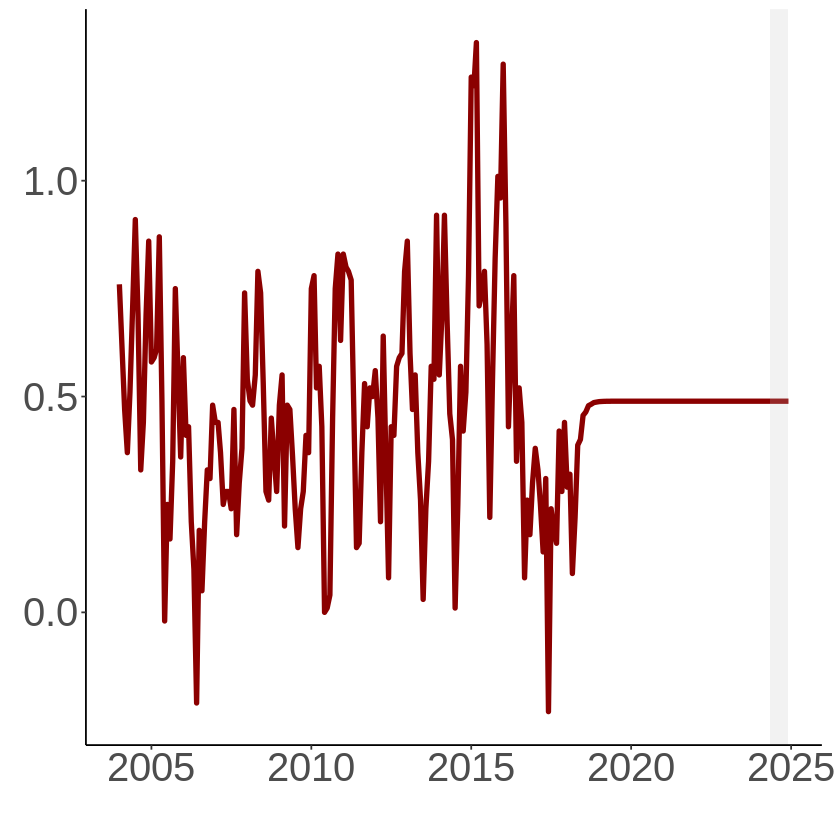

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

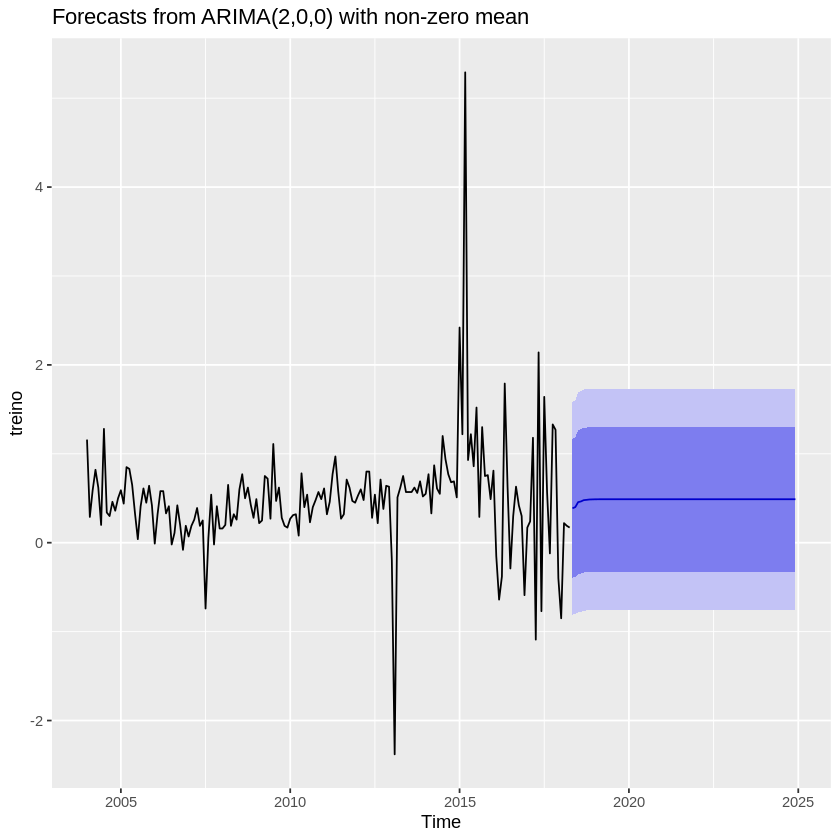

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

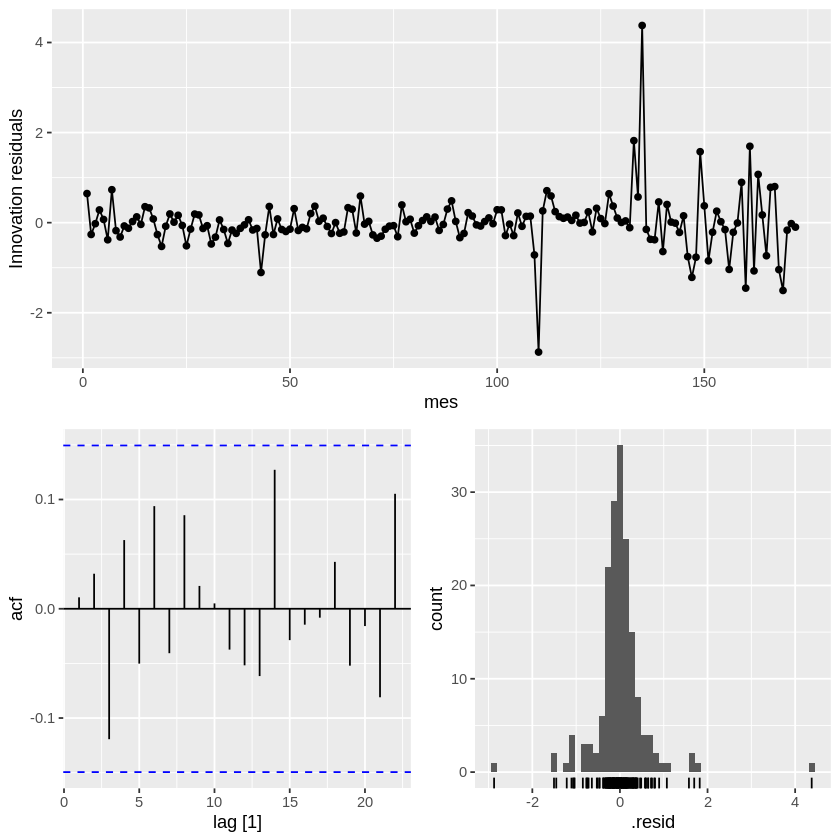

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
habitacao_acumulado=(prod(df$value)-1)*100
habitacao_acumulado

[1] 6.030726

# **IPCA desagregado - Artigos de residência**

In [ ]:
dat_ipca <- data.frame( ipca = dat$artigos_de_residencia, mes = time(dat$artigos_de_residencia))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

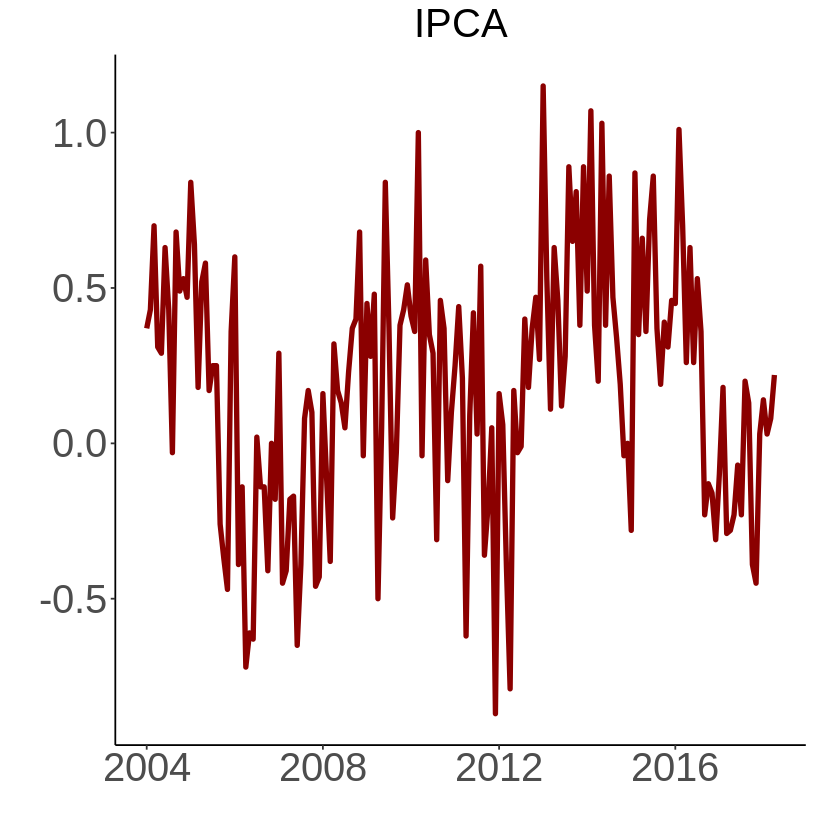

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

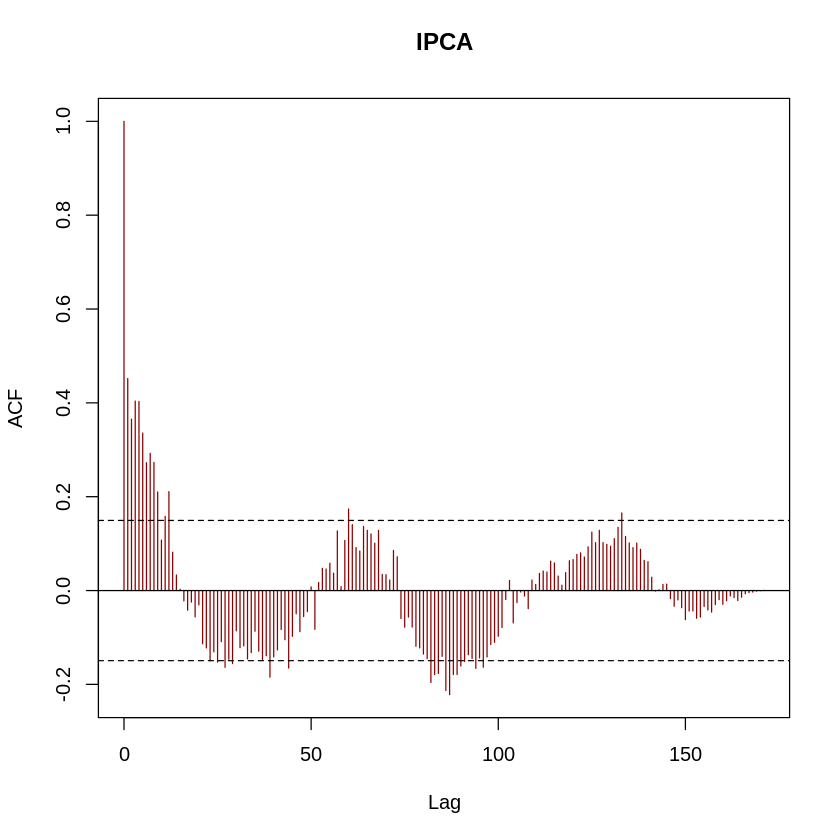

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

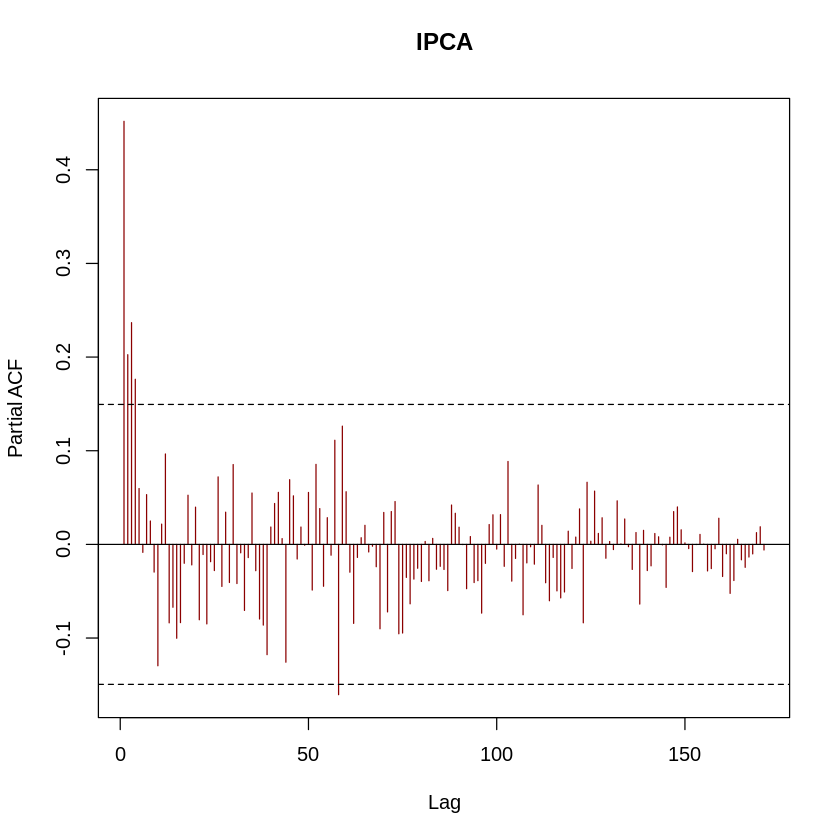

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8824 -0.2622  0.0146  0.2153  0.7051 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0242164  0.0625521  -0.387  0.69923   
z.lag.1      -0.3280137  0.1152469  -2.846  0.00507 **
tt            0.0007947  0.0006359   1.250  0.21343   
z.diff.lag1  -0.4173790  0.1276862  -3.269  0.00135 **
z.diff.lag2  -0.3235959  0.1301305  -2.487  0.01404 * 
z.diff.lag3  -0.1791936  0.1306564  -1.371  0.17236   
z.diff.lag4  -0.0490975  0.1314331  -0.374  0.70928   
z.diff.lag5   0.0318196  0.1316442   0.242  0.80935   
z.diff.lag6   0.0272211  0.1300771   0.209  0.83453   
z.diff.lag7   0.0857011  0.1274043   0.673  0.50224   
z.diff.lag8   0.1146468  0.1252730   0.915  0.36163  

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1767 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.01), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1  0.06 1  
2  0.27 2  
3 -0.39 3  
4 -0.02 4  
5  0.34 5  
6 -0.20 6

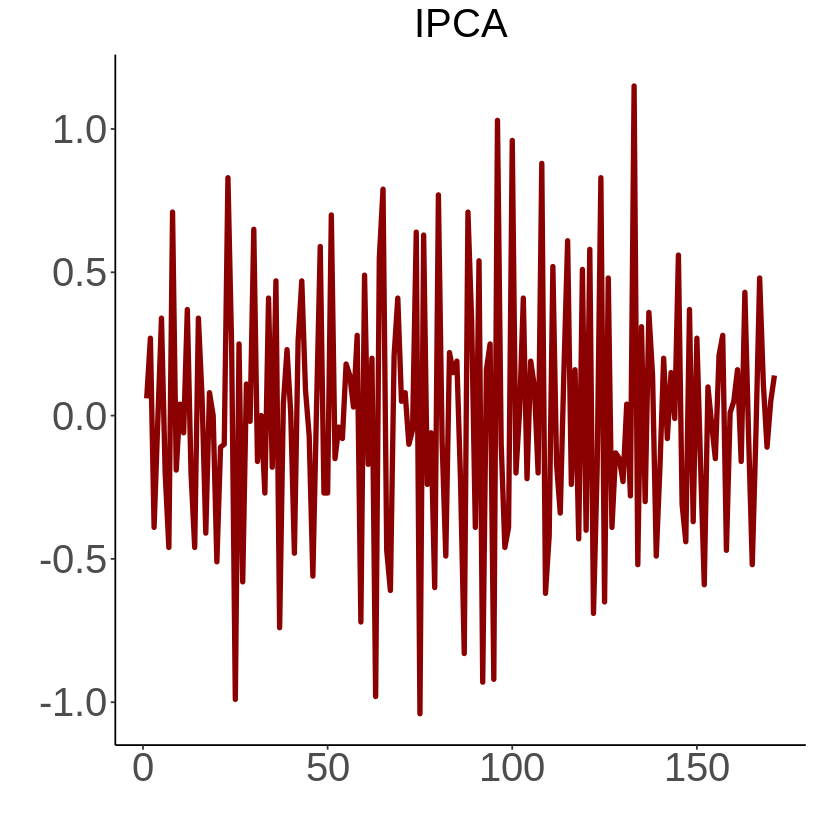

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

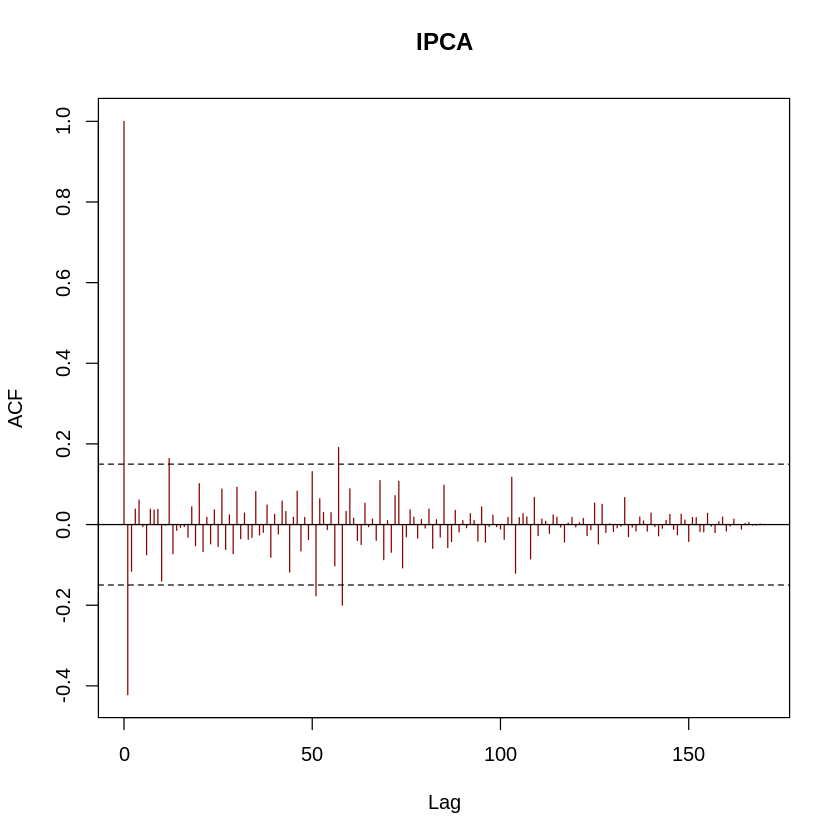

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

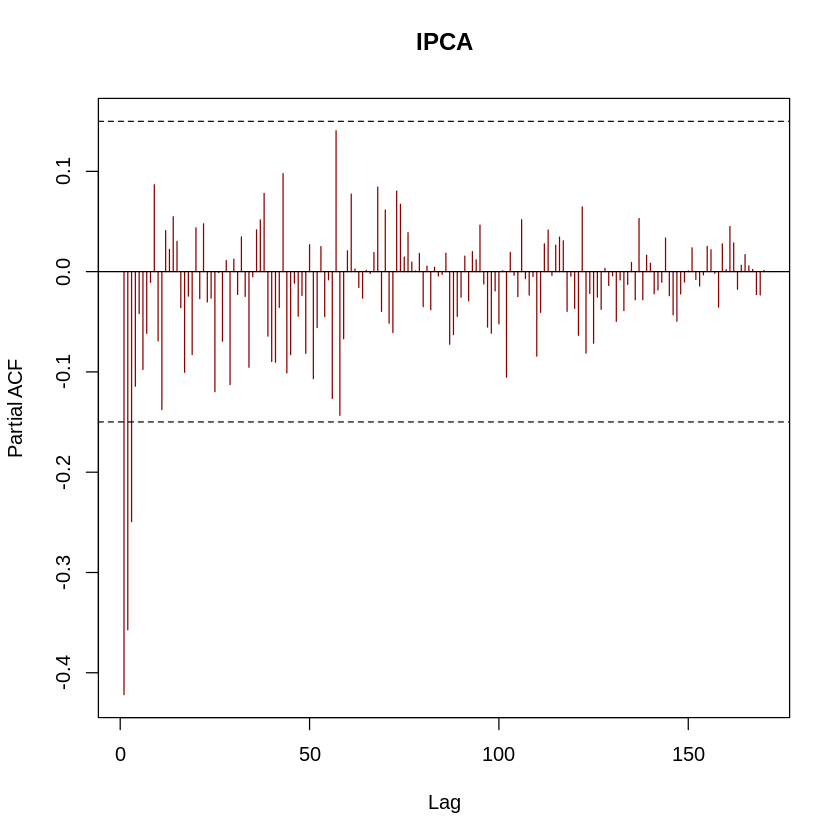

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89384 -0.30303  0.02117  0.23519  0.78105 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0360044  0.0646554  -0.557   0.5785    
z.lag.1      -3.5095829  0.8440088  -4.158  5.5e-05 ***
tt            0.0002657  0.0006320   0.420   0.6748    
z.diff.lag1   1.8090990  0.8177691   2.212   0.0285 *  
z.diff.lag2   1.2438816  0.7754618   1.604   0.1109    
z.diff.lag3   0.8558546  0.7260122   1.179   0.2404    
z.diff.lag4   0.6127392  0.6737338   0.909   0.3646    
z.diff.lag5   0.4571266  0.6159003   0.742   0.4592    
z.diff.lag6   0.3105179  0.5530110   0.562   0.5753    
z.diff.lag7   0.2405782  0.4852844   0.496   0.6208    
z.diff.lag8   0.2100911  0.41400

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), rejeita-se a hipótese nula do teste ADF. Portanto não se pode afirmar que a série temporal possui raiz unitária, o que significa que não se pode afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0234 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1637`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.37  0.43  0.70  0.31  0.29  0.63  0.43 -0.03  0.68  0.49  0.53  0.47
2005  0.84  0.64  0.18  0.52  0.58  0.17  0.25  0.25 -0.26 -0.37 -0.47  0.36
2006  0.60 -0.39 -0.14 -0.72 -0.61 -0.63  0.02 -0.14 -0.14 -0.41  0.00 -0.18
2007  0.29 -0.45 -0.41 -0.18 -0.17 -0.65 -0.39  0.08  0.17  0.10 -0.46 -0.43
2008  0.16 -0.11 -0.38  0.32  0.17  0.13  0.05  0.23  0.37  0.40  0.68 -0.04
2009  0.45  0.28  0.48 -0.50  0.05  0.84  0.37 -0.24 -0.03  0.38  0.43  0.51
2010  0.41  0.36  1.00 -0.04  0.59  0.35  0.29 -0.31  0.46  0.37 -0.12  0.10
2011  0.25  0.44  0.21 -0.62  0.09  0.42  0.03  0.57 -0.36 -0.20  0.05 -0.87
2012  0.16  0.06 -0.40 -0.79  0.17 -0.03 -0.01  0.40  0.18  0.37  0.47  0.27
2013  1.15  0.53  0.11  0.63  0.46  0.12  0.28  0.89  0.65  0.81  0.38  0.89
2014  0.49  1.07  0.38  0.20  1.03  0.38  0.86  0.47  0.34  0.19 -0.04  0.00
2015 -0.28  0.87  0.35  0.66  0.36  0.72  0.86  0.37  0.19  0.39  0.31  0.46
2016  0.45  1.01  0.70  0.26  0.63  0.26  0.53  0.36 -0.23 -0.13 -0.16 -0.31
2017 -0.10  0.18 -0.29 -0.28 -0.23 -0.07 -0.23  0.20  0.13 -0.39 -0.45  0.03
2018  0.14  0.03  0.08  0.22 -0.06  0.34  0.47  0.56  0.11  0.76  0.48  0.57
2019  0.32  0.20  0.27 -0.24 -0.10  0.02  0.29  0.56 -0.76 -0.09 -0.36 -0.48
2020 -0.07 -0.08 -1.08 -1.37  0.58  1.30  0.90  0.56  1.00  1.53  0.86  1.76
2021  0.86  0.66  0.69  0.57  1.25  1.09  0.78  0.99  0.90  1.27  1.03  1.37
2022  1.82  1.76  0.57  1.53  0.66  0.55  0.12  0.42 -0.13  0.39 -0.68  0.64
2023  0.70  0.11 -0.27  0.17 -0.23 -0.42  0.04 -0.04 -0.58  0.46 -0.42  0.76
2024  0.22 -0.07 -0.04 -0.26 -0.53

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(1,0,1)(0,0,1)[12] with zero mean 

Coefficients:
         ar1      ma1    sma1
      0.9333  -0.6652  0.1887
s.e.  0.0359   0.0714  0.0803

sigma^2 = 0.1157:  log likelihood = -57.71
AIC=123.43   AICc=123.67   BIC=136.02

In [ ]:
accuracy(arima_treino,train=treino)

ME        RMSE      MAE       MPE MAPE MASE      ACF1       
Training set 0.0296404 0.3371832 0.2808547 NaN Inf  0.6563944 -0.01297404

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME        RMSE      MAE       MPE      MAPE     MASE ACF1
Training set 0.2794934 0.2794934 0.2794934 75.53876 75.53876 NaN  NaN

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


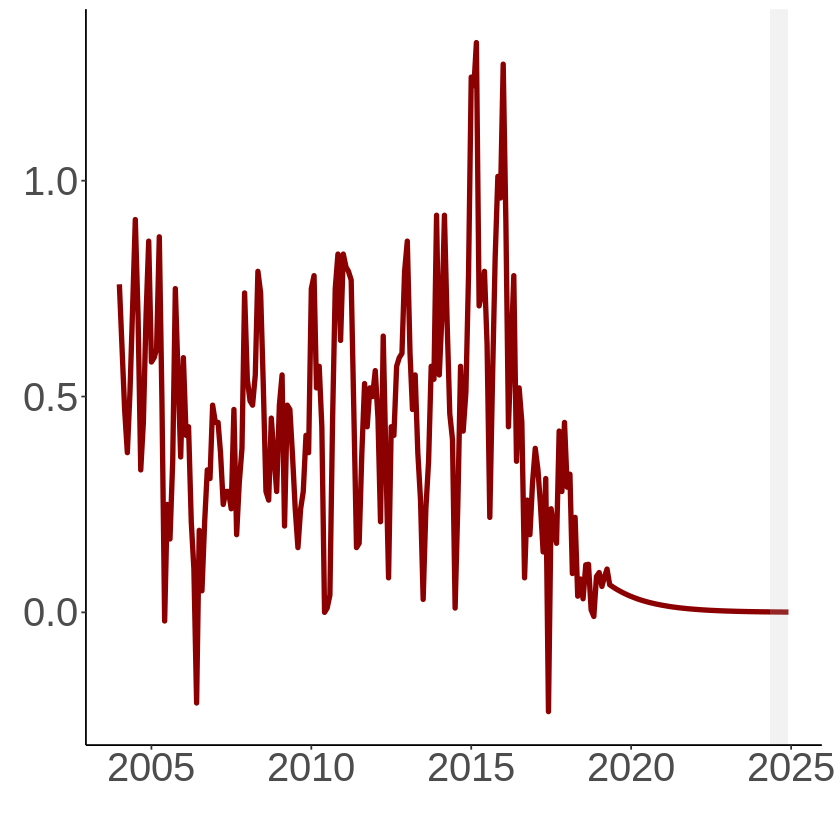

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

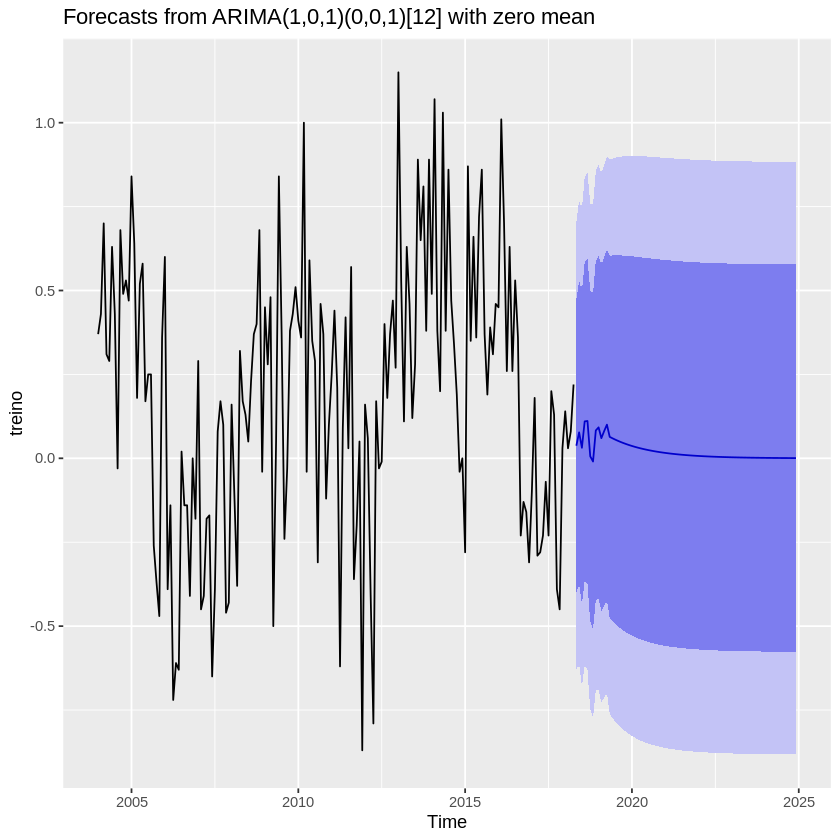

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

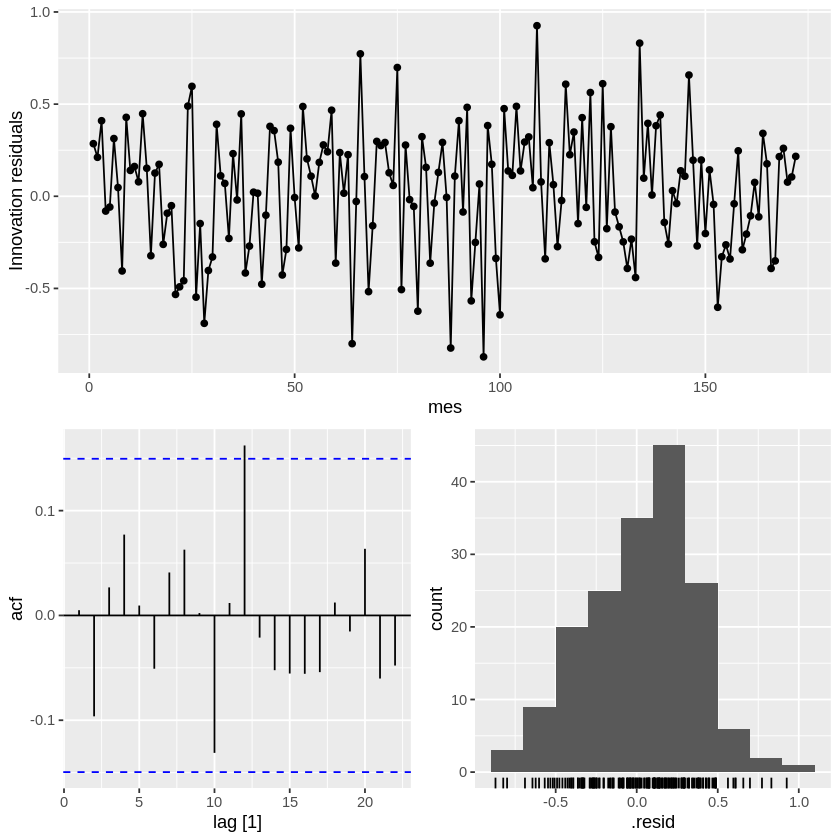

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
artigos_de_residencia_acumulado=(prod(df$value)-1)*100
artigos_de_residencia_acumulado

[1] 0.01133323

# **IPCA desagregado - Vestuário**

In [ ]:
dat_ipca <- data.frame( ipca = dat$vestuario, mes = time(dat$vestuario))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

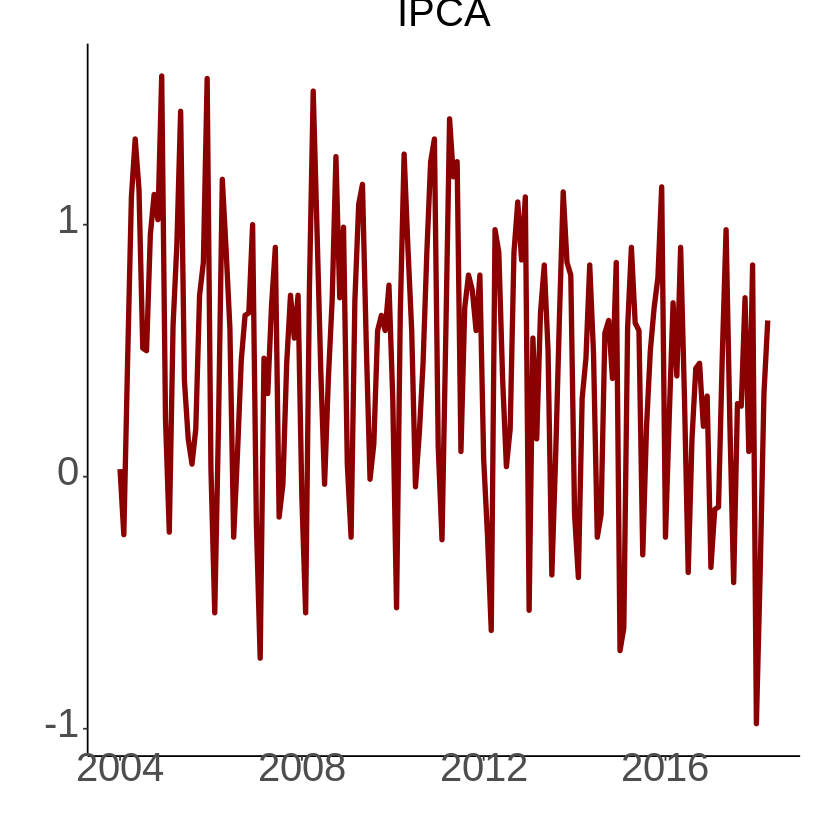

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

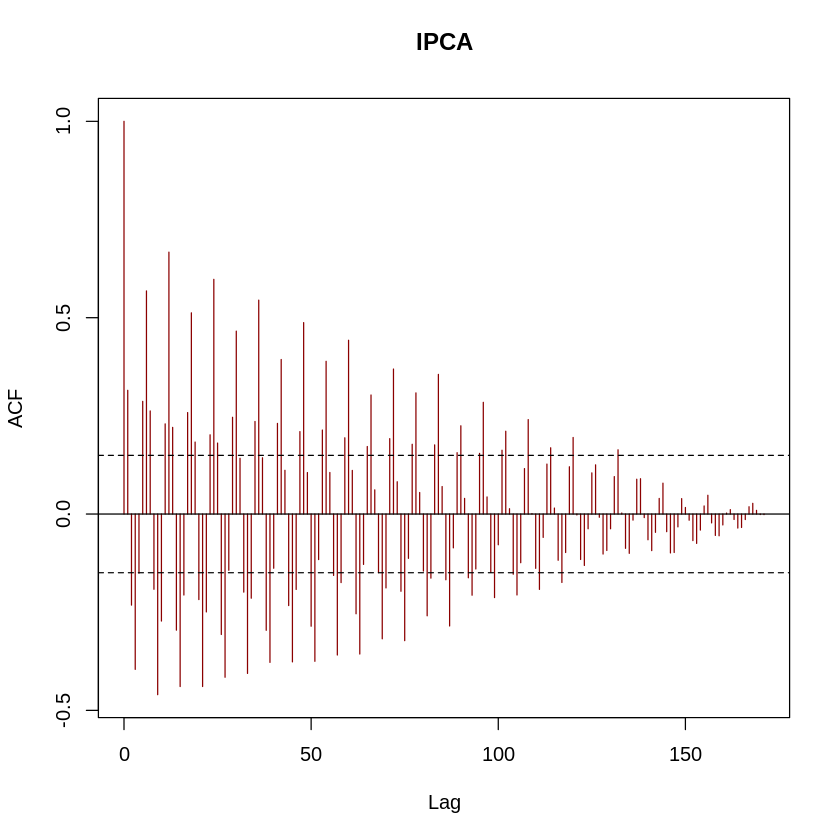

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

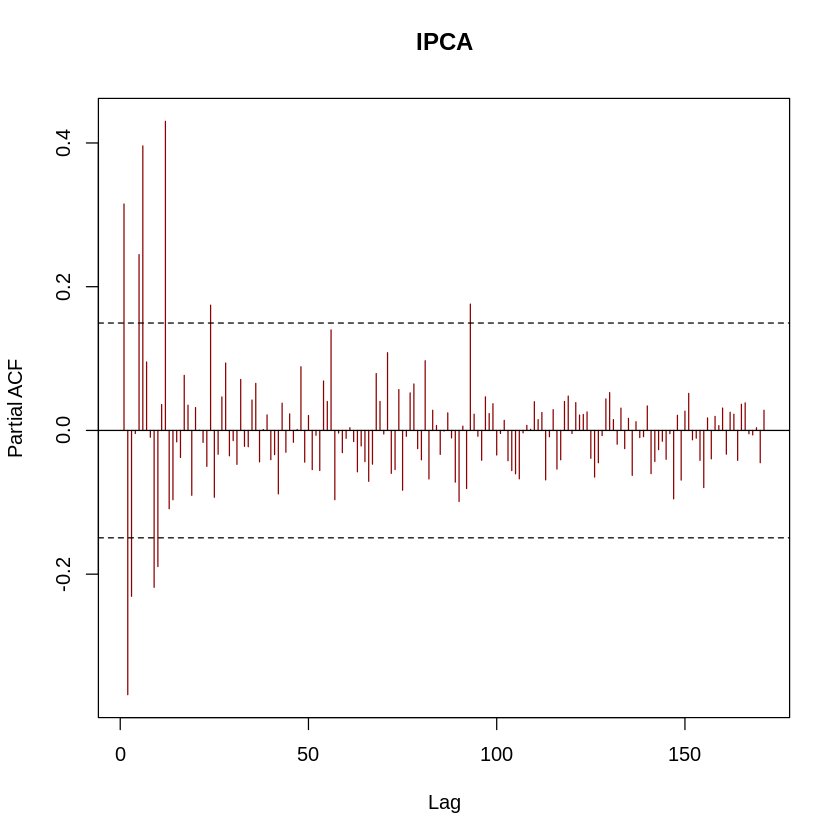

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9442 -0.1820  0.0217  0.1953  0.9206 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3281774  0.1512637   2.170  0.03168 *  
z.lag.1      -0.5711584  0.2177830  -2.623  0.00966 ** 
tt           -0.0009965  0.0007063  -1.411  0.16044    
z.diff.lag1  -0.3385170  0.2166257  -1.563  0.12032    
z.diff.lag2  -0.4191202  0.2031271  -2.063  0.04088 *  
z.diff.lag3  -0.3585620  0.1915820  -1.872  0.06329 .  
z.diff.lag4  -0.2892028  0.1834066  -1.577  0.11703    
z.diff.lag5  -0.1605444  0.1798632  -0.893  0.37356    
z.diff.lag6   0.0227425  0.1754156   0.130  0.89702    
z.diff.lag7   0.0266025  0.1708492   0.156  0.87648    
z.diff.lag8   0.0119860  0.1615477   0.074

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1267 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.01), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.26 1  
2  0.69 2  
3  0.65 3  
4  0.23 4  
5 -0.20 5  
6 -0.63 6

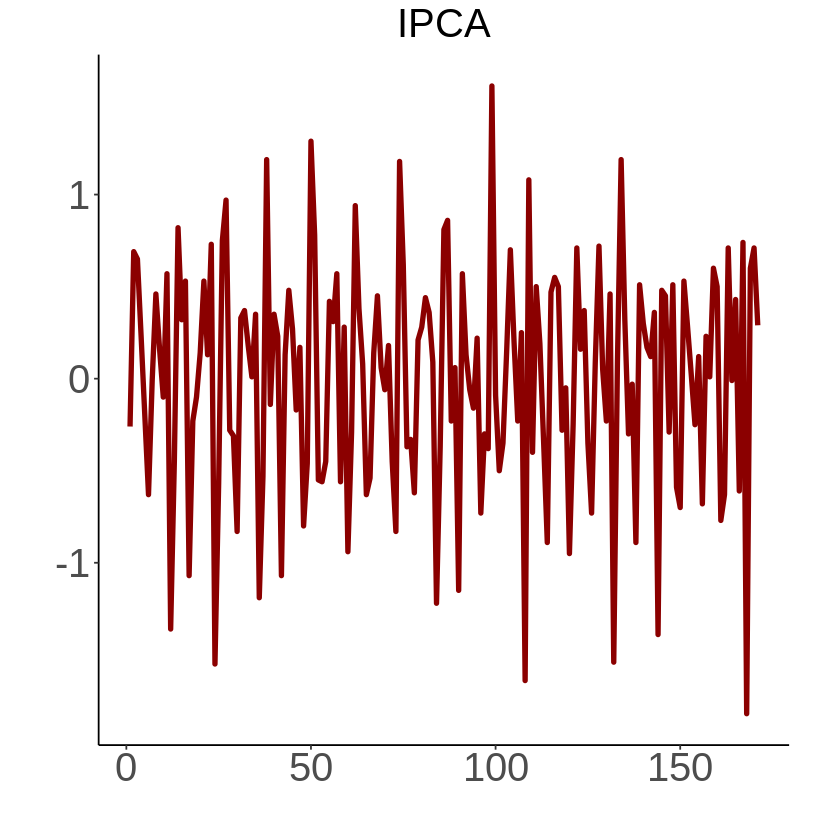

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

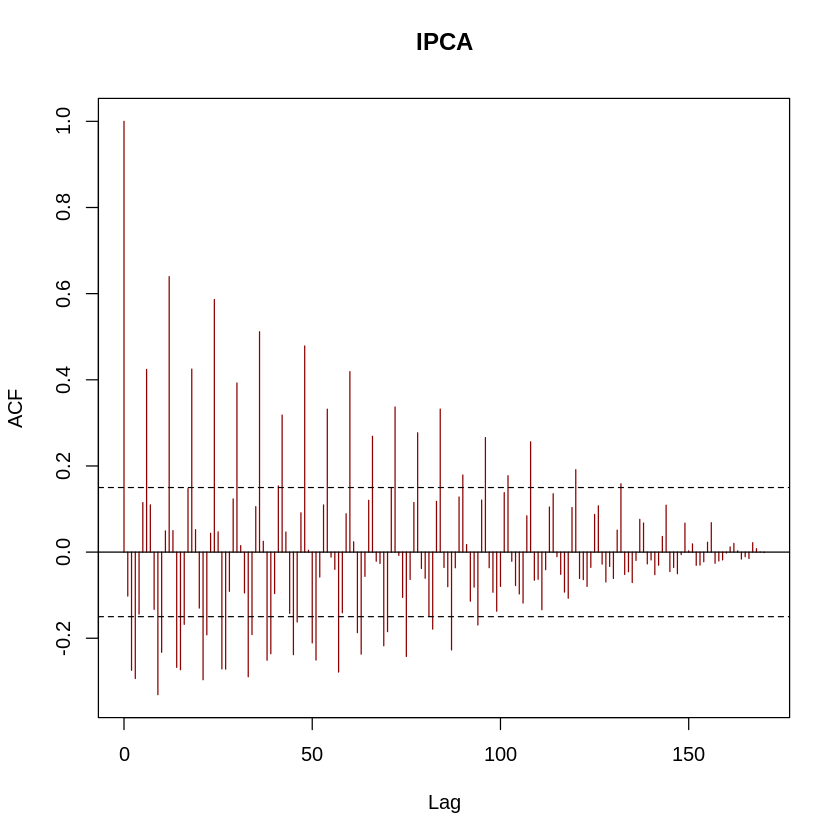

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

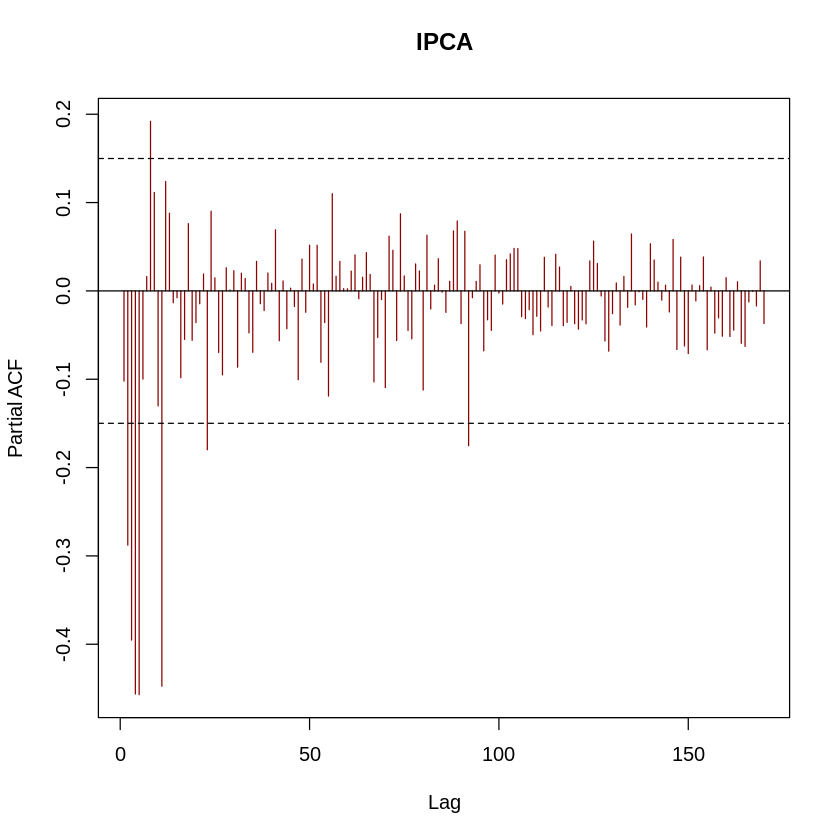

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98034 -0.18777 -0.00062  0.19725  0.99063 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.903e-02  5.980e-02  -0.485 0.628154    
z.lag.1      -6.098e+00  1.173e+00  -5.199  6.8e-07 ***
tt            6.565e-05  5.815e-04   0.113 0.910269    
z.diff.lag1   4.228e+00  1.136e+00   3.723 0.000282 ***
z.diff.lag2   3.389e+00  1.066e+00   3.178 0.001818 ** 
z.diff.lag3   2.667e+00  9.893e-01   2.696 0.007866 ** 
z.diff.lag4   2.061e+00  9.076e-01   2.271 0.024622 *  
z.diff.lag5   1.615e+00  8.199e-01   1.969 0.050835 .  
z.diff.lag6   1.388e+00  7.235e-01   1.918 0.057083 .  
z.diff.lag7   1.186e+00  6.210e-01   1.910 0.058124 .  
z.diff.lag8   1.016e+00  5.095e-

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), rejeita-se a hipótese nula do teste ADF. Portanto não se pode afirmar que a série temporal possui raiz unitária, o que significa que não se pode afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0245 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1638`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.03 -0.23  0.46  1.11  1.34  1.14  0.51  0.50  0.96  1.12  1.02  1.59
2005  0.23 -0.22  0.60  0.92  1.45  0.38  0.15  0.05  0.19  0.72  0.85  1.58
2006  0.03 -0.54  0.21  1.18  0.90  0.59 -0.24  0.09  0.46  0.64  0.65  1.00
2007 -0.19 -0.72  0.47  0.33  0.68  0.91 -0.16 -0.03  0.45  0.72  0.55  0.72
2008 -0.08 -0.54  0.75  1.53  0.98  0.42 -0.03  0.39  0.70  1.27  0.71  0.99
2009  0.05 -0.24  0.70  1.08  1.16  0.53 -0.01  0.13  0.58  0.64  0.58  0.76
2010  0.31 -0.52  0.66  1.28  0.91  0.58 -0.04  0.17  0.45  0.89  1.25  1.34
2011  0.12 -0.25  0.56  1.42  1.19  1.25  0.10  0.67  0.80  0.74  0.58  0.80
2012  0.07 -0.23 -0.61  0.98  0.89  0.39  0.04  0.19  0.89  1.09  0.86  1.11
2013 -0.53  0.55  0.15  0.65  0.84  0.50 -0.39  0.08  0.63  1.13  0.85  0.80
2014 -0.15 -0.40  0.31  0.47  0.84  0.49 -0.24 -0.15  0.57  0.62  0.39  0.85
2015 -0.69 -0.60  0.59  0.91  0.61  0.58 -0.31  0.20  0.50  0.67  0.79  1.15
2016 -0.24  0.24  0.69  0.40  0.91  0.32 -0.38  0.15  0.43  0.45  0.20  0.32
2017 -0.36 -0.13 -0.12  0.48  0.98  0.21 -0.42  0.29  0.28  0.71  0.10  0.84
2018 -0.98 -0.38  0.33  0.62  0.58 -0.16 -0.60  0.19 -0.02  0.33 -0.43  1.14
2019 -1.15 -0.33  0.45  0.18  0.34  0.30 -0.52  0.23  0.27  0.63  0.35  0.00
2020 -0.48 -0.73  0.21  0.10 -0.58 -0.46 -0.52 -0.78  0.37  1.11  0.07  0.59
2021 -0.07  0.38  0.29  0.47  0.92  1.21  0.53  1.02  0.31  1.80  0.95  2.06
2022  1.07  0.88  1.82  1.26  2.11  1.67  0.58  1.69  1.77  1.22  1.10  1.52
2023 -0.27 -0.24  0.31  0.79  0.47  0.35 -0.24  0.54  0.38  0.45 -0.35  0.70
2024  0.14 -0.44  0.03  0.55  0.50

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(1,0,1)(0,1,1)[12] with drift 

Coefficients:
         ar1      ma1     sma1    drift
      0.8546  -0.6950  -0.7913  -0.0024
s.e.  0.0937   0.1242   0.0730   0.0012

sigma^2 = 0.08274:  log likelihood = -31.51
AIC=73.01   AICc=73.4   BIC=88.39

In [ ]:
accuracy(arima_treino,train=treino)

ME           RMSE      MAE       MPE      MAPE     MASE     
Training set -0.007429322 0.2739462 0.1975153 4.332907 56.12789 0.6812342
             ACF1       
Training set -0.02323045

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME           RMSE         MAE          MPE       MAPE      MASE
Training set 2.335381e-07 8.518358e-05 5.651859e-05 0.1068228 0.1068228 Inf 
             ACF1      
Training set -0.1517857

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


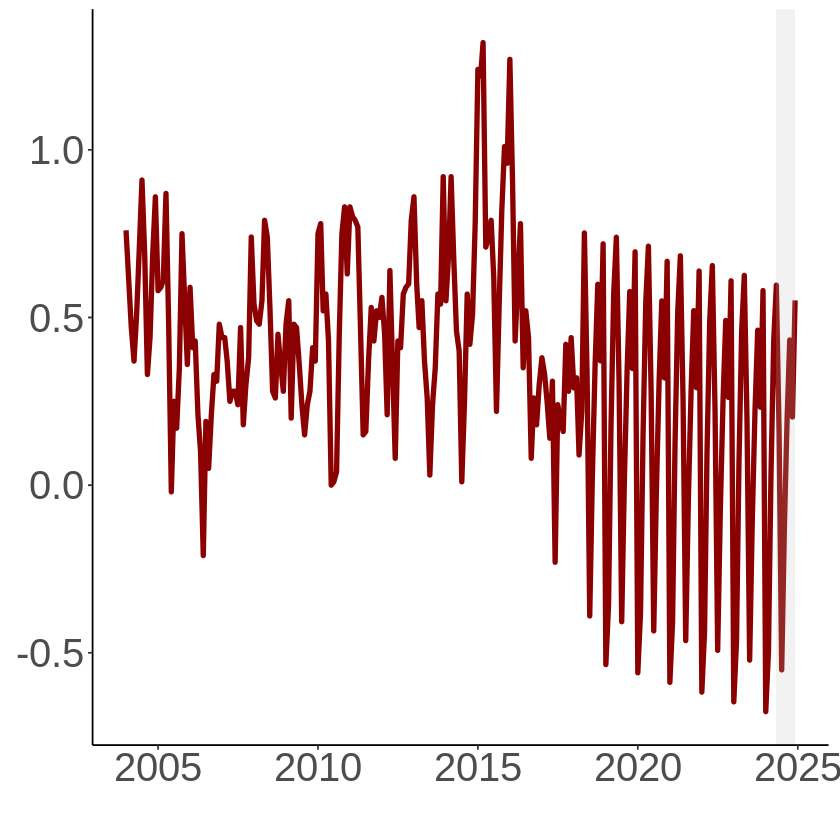

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

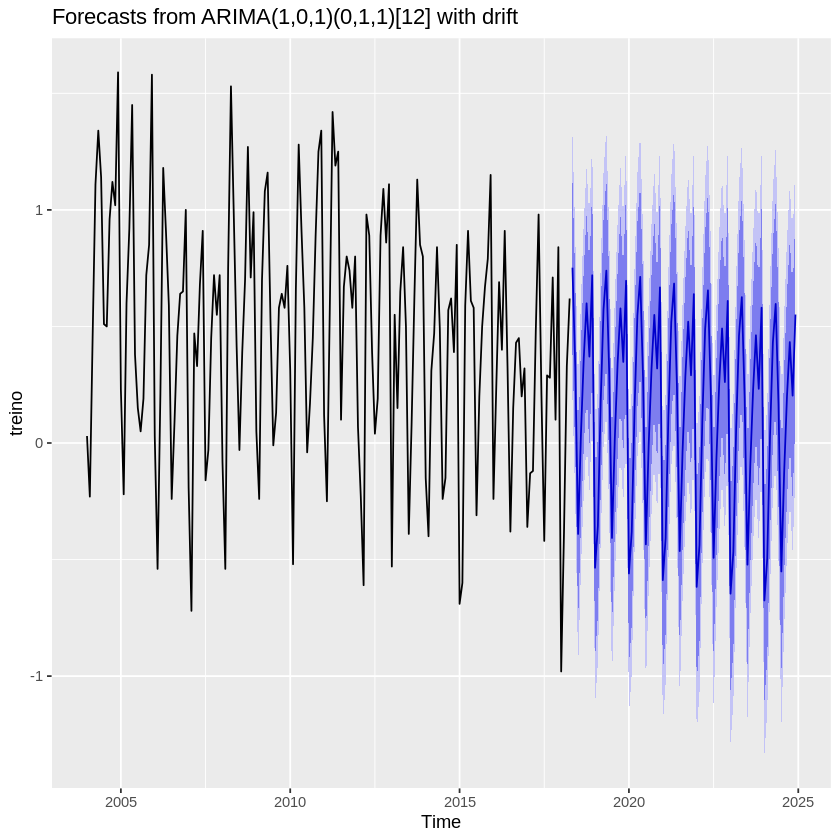

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

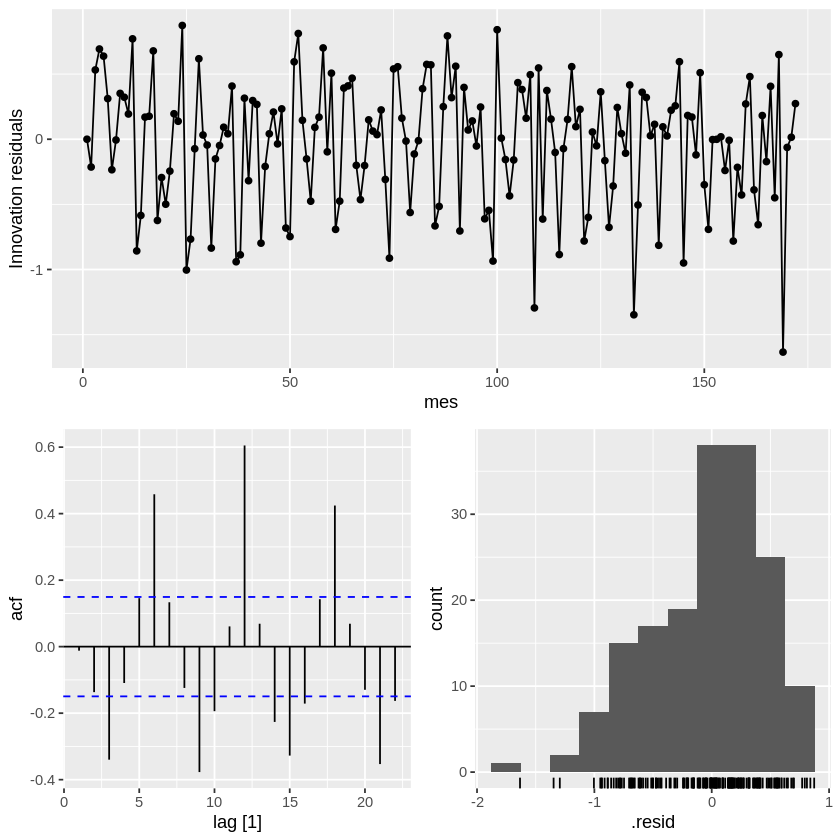

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
vestuario_acumulado=(prod(df$value)-1)*100
vestuario_acumulado

[1] 0.7572688

# **IPCA desagregado - Transportes**

In [ ]:
dat_ipca <- data.frame( ipca = dat$transportes, mes = time(dat$transportes))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

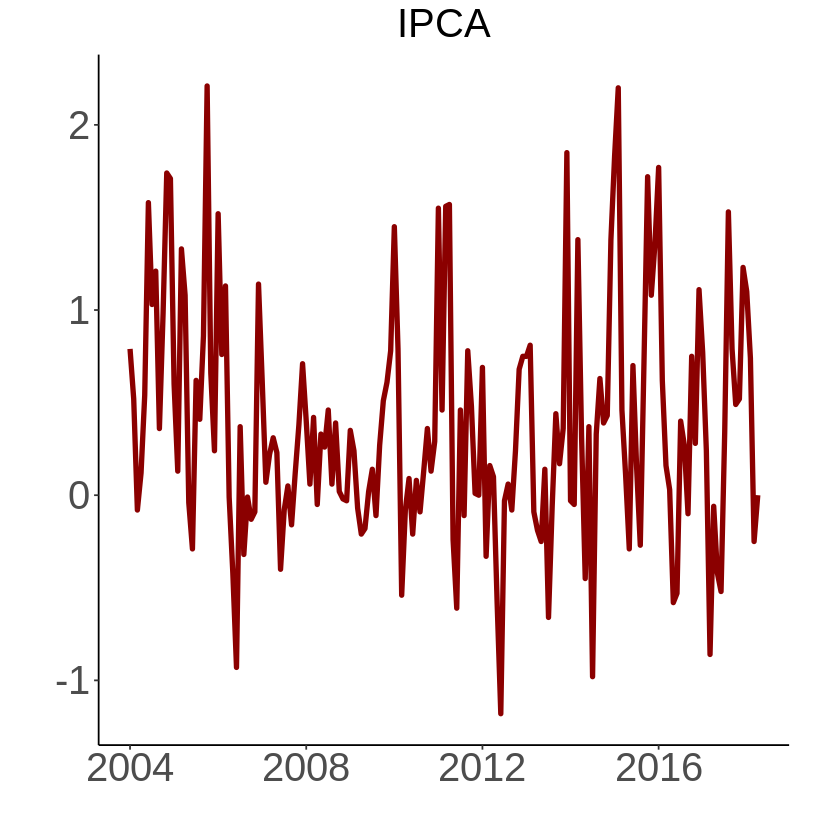

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

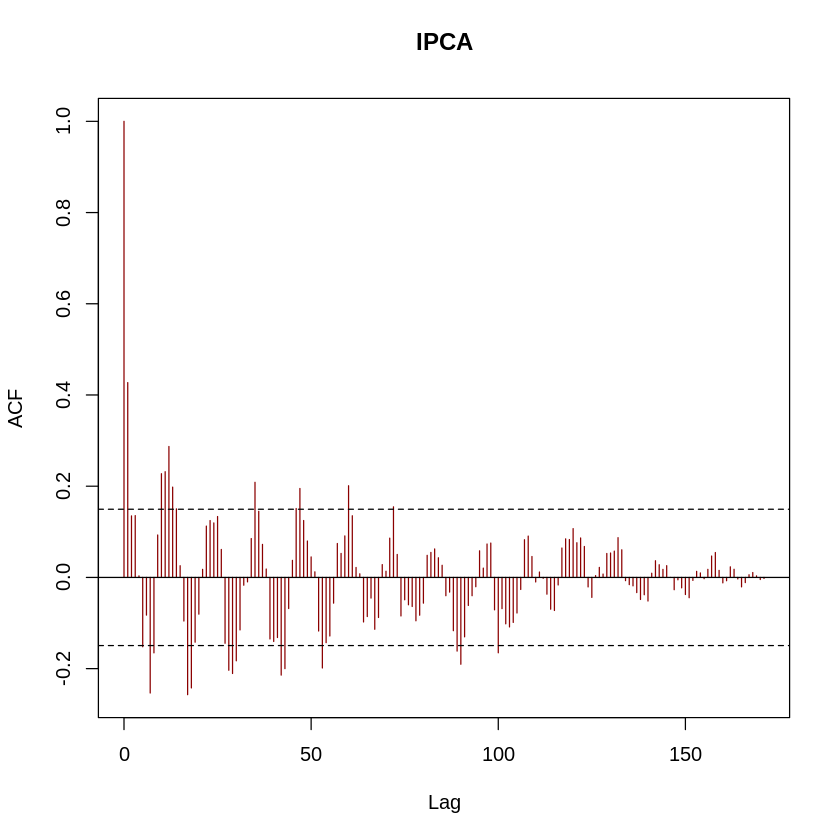

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

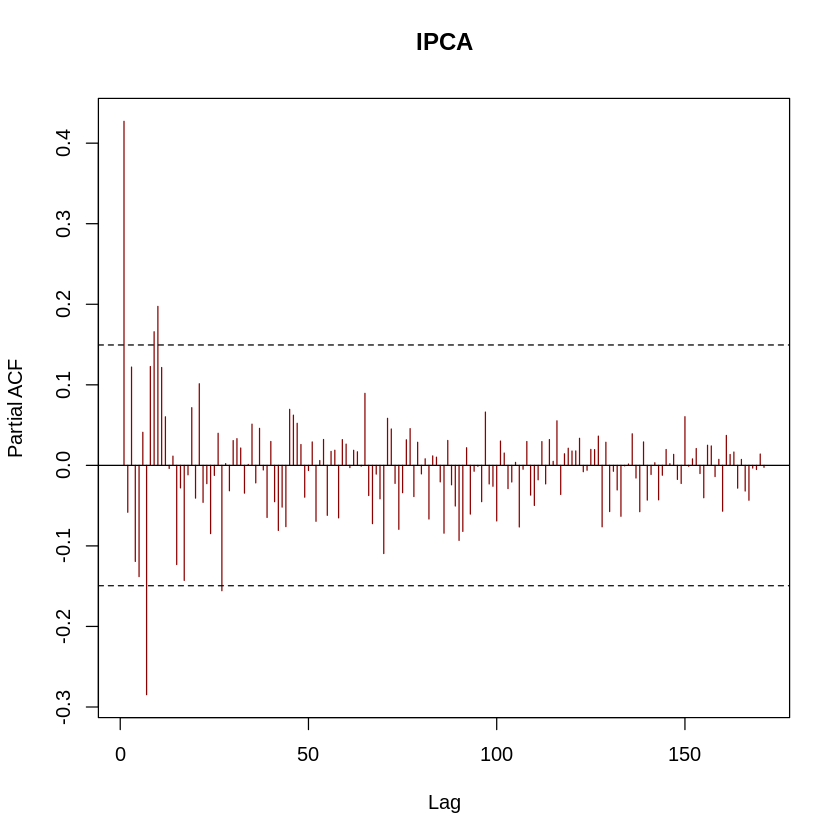

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05947 -0.32872 -0.05031  0.22961  1.46195 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0695174  0.1163663   0.597 0.551178    
z.lag.1      -0.4764108  0.1736063  -2.744 0.006838 ** 
tt            0.0008728  0.0009127   0.956 0.340485    
z.diff.lag1  -0.1484994  0.1751252  -0.848 0.397867    
z.diff.lag2  -0.2908277  0.1718087  -1.693 0.092667 .  
z.diff.lag3  -0.0921624  0.1679729  -0.549 0.584079    
z.diff.lag4  -0.0729975  0.1580064  -0.462 0.644785    
z.diff.lag5  -0.2555569  0.1447822  -1.765 0.079665 .  
z.diff.lag6  -0.1093704  0.1305901  -0.838 0.403694    
z.diff.lag7  -0.4437926  0.1244331  -3.567 0.000492 ***
z.diff.lag8  -0.3947153  0.11755

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1484 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.01), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.27 1  
2 -0.60 2  
3  0.20 3  
4  0.42 4  
5  1.04 5  
6 -0.55 6

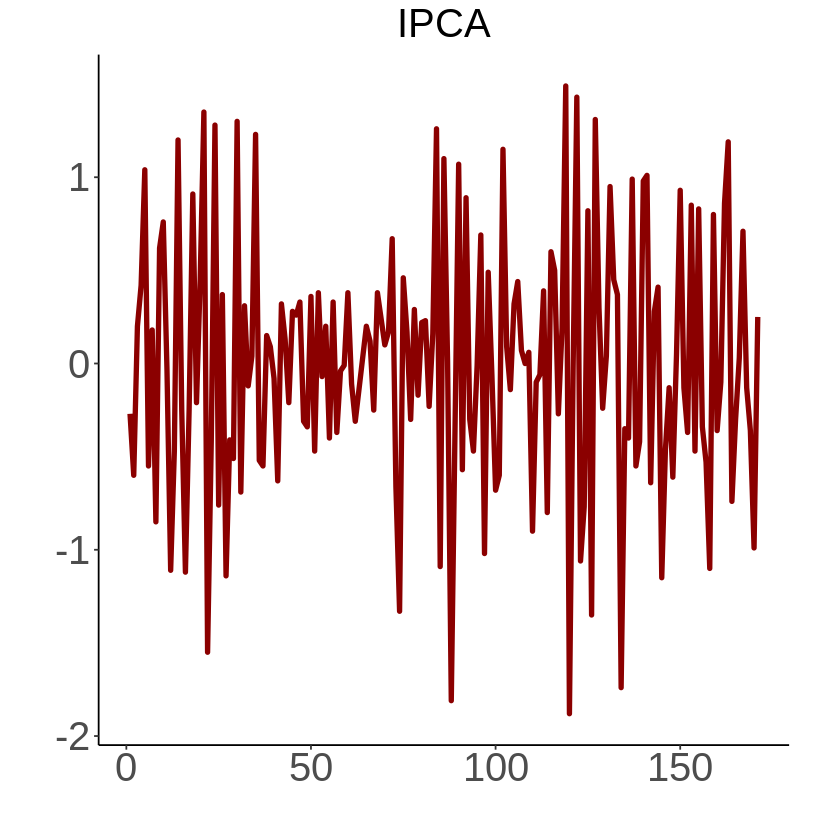

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

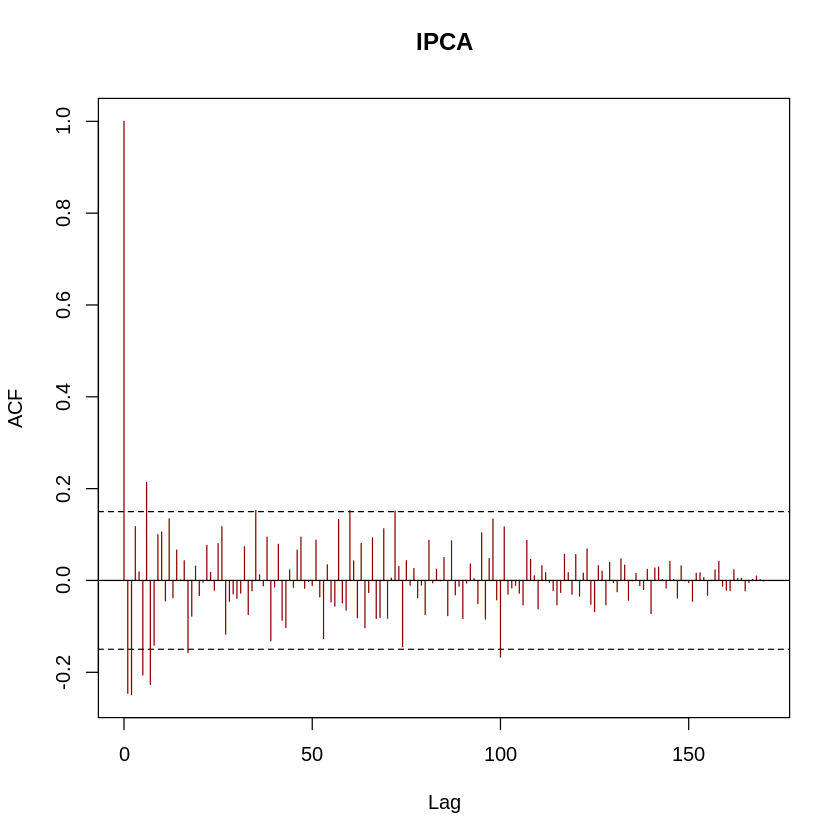

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

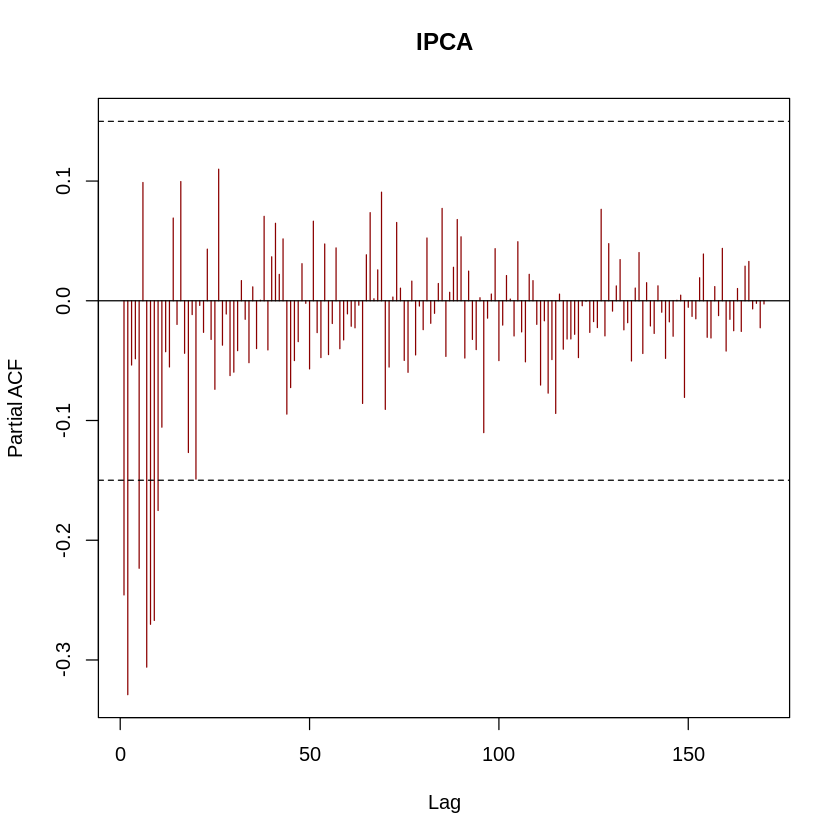

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05603 -0.31147 -0.01771  0.28809  1.43834 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1090278  0.0964197  -1.131 0.260048    
z.lag.1      -6.5044384  1.0138204  -6.416 1.92e-09 ***
tt            0.0010277  0.0009423   1.091 0.277311    
z.diff.lag1   4.9284301  0.9742842   5.059 1.28e-06 ***
z.diff.lag2   4.2398412  0.9148667   4.634 7.99e-06 ***
z.diff.lag3   3.7822725  0.8347577   4.531 1.23e-05 ***
z.diff.lag4   3.3610959  0.7464089   4.503 1.38e-05 ***
z.diff.lag5   2.7790887  0.6589567   4.217 4.36e-05 ***
z.diff.lag6   2.3892708  0.5725712   4.173 5.20e-05 ***
z.diff.lag7   1.7099573  0.4988774   3.428 0.000796 ***
z.diff.lag8   1.1205211  0.41332

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), rejeita-se a hipótese nula do teste ADF. Portanto não se pode afirmar que a série temporal possui raiz unitária, o que significa que não se pode afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0136 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1639`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.79  0.52 -0.08  0.12  0.54  1.58  1.03  1.21  0.36  0.98  1.74  1.71
2005  0.60  0.13  1.33  1.08 -0.04 -0.29  0.62  0.41  0.86  2.21  0.66  0.24
2006  1.52  0.76  1.13 -0.01 -0.42 -0.93  0.37 -0.32 -0.01 -0.13 -0.09  1.14
2007  0.62  0.07  0.22  0.31  0.23 -0.40 -0.08  0.05 -0.16  0.12  0.38  0.71
2008  0.40  0.06  0.42 -0.05  0.33  0.26  0.46  0.06  0.39  0.02 -0.02 -0.03
2009  0.35  0.24 -0.07 -0.21 -0.18  0.02  0.14 -0.11  0.27  0.51  0.61  0.78
2010  1.45  0.79 -0.54 -0.08  0.09 -0.21  0.08 -0.09  0.13  0.36  0.13  0.29
2011  1.55  0.46  1.56  1.57 -0.24 -0.61  0.46 -0.11  0.78  0.48  0.01  0.00
2012  0.69 -0.33  0.16  0.10 -0.58 -1.18 -0.03  0.06 -0.08  0.24  0.68  0.75
2013  0.75  0.81 -0.09 -0.19 -0.25  0.14 -0.66 -0.06  0.44  0.17  0.36  1.85
2014 -0.03 -0.05  1.38  0.32 -0.45  0.37 -0.98  0.33  0.63  0.39  0.43  1.38
2015  1.83  2.20  0.46  0.11 -0.29  0.70  0.15 -0.27  0.71  1.72  1.08  1.36
2016  1.77  0.62  0.16  0.03 -0.58 -0.53  0.40  0.27 -0.10  0.75  0.28  1.11
2017  0.77  0.24 -0.86 -0.06 -0.42 -0.52  0.34  1.53  0.79  0.49  0.52  1.23
2018  1.10  0.74 -0.25  0.00  0.40  1.58  0.49 -1.22  1.69  0.92 -0.74 -0.54
2019  0.02 -0.34  1.44  0.94  0.07 -0.31 -0.17 -0.39  0.00  0.45  0.30  1.54
2020  0.32 -0.23 -0.90 -2.66 -1.90  0.31  0.78  0.82  0.70  1.19  1.33  1.36
2021  0.41  2.28  3.81 -0.08  1.15  0.41  1.52  1.46  1.82  2.62  3.35  0.58
2022 -0.11  0.46  3.02  1.91  1.34  0.57 -4.51 -3.37 -1.98  0.58  0.83  0.21
2023  0.55  0.37  2.11  0.56 -0.57 -0.41  1.50  0.34  1.40  0.35  0.27  0.48
2024 -0.65  0.72 -0.33  0.14  0.44

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(1,0,0)(2,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1    sar2    mean
      0.3820  0.2240  0.0012  0.3806
s.e.  0.0729  0.0815  0.0854  0.0870

sigma^2 = 0.3181:  log likelihood = -143.93
AIC=297.86   AICc=298.22   BIC=313.59

In [ ]:
accuracy(arima_treino,train=treino)

ME           RMSE     MAE       MPE  MAPE MASE      ACF1      
Training set -0.006434813 0.557437 0.4322999 -Inf Inf  0.7727403 0.03550379

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME        RMSE      MAE       MPE     MAPE     MASE      ACF1     
Training set 0.1894366 0.3646352 0.3372564 122.307 123.2177 0.8875168 0.3527473

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


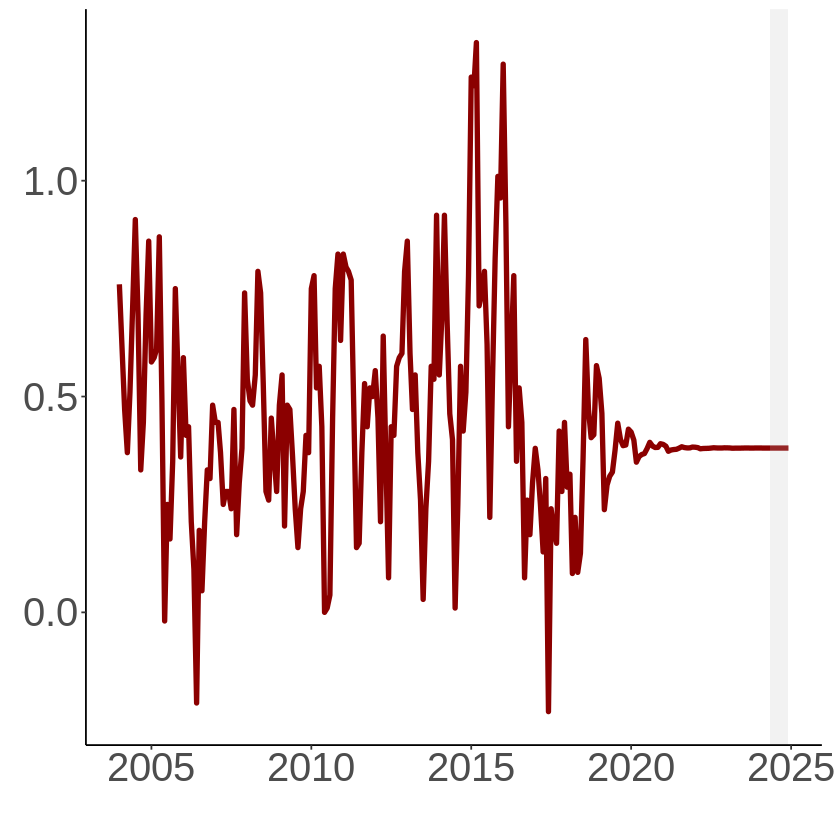

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

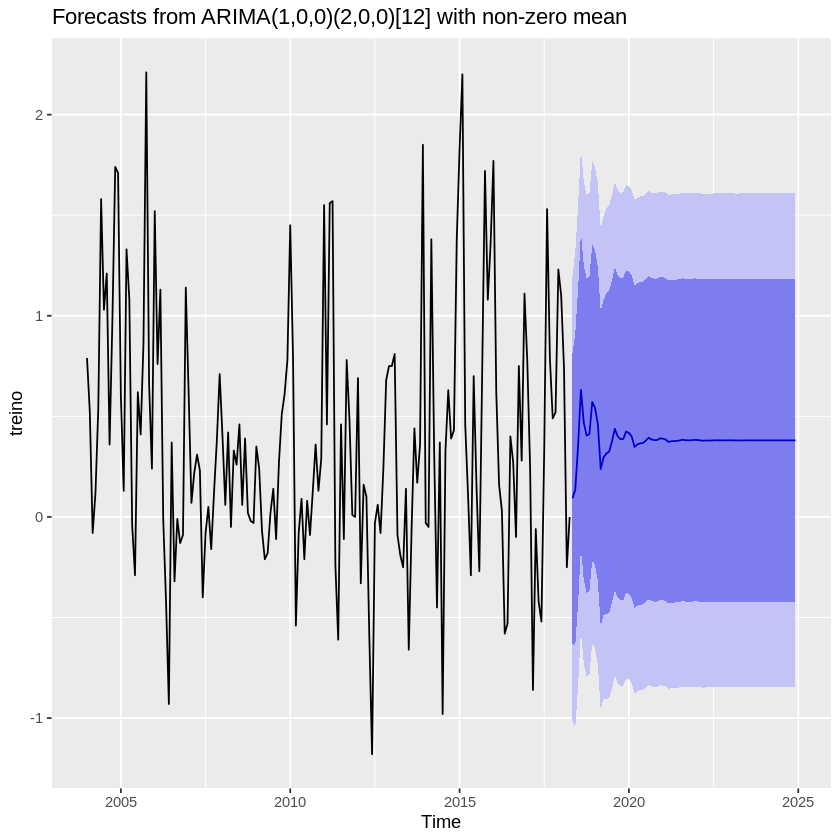

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

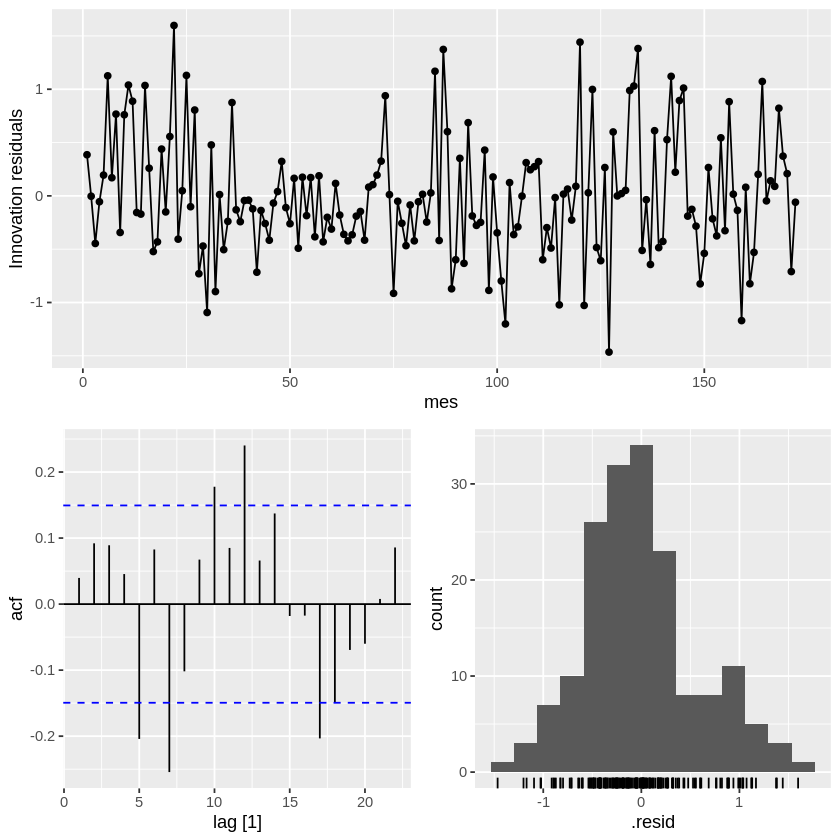

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
transportes_acumulado=(prod(df$value)-1)*100
transportes_acumulado

[1] 4.664538

# **IPCA desagregado - Comunicação**

In [ ]:
dat_ipca <- data.frame( ipca = dat$comunicacao, mes = time(dat$comunicacao))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

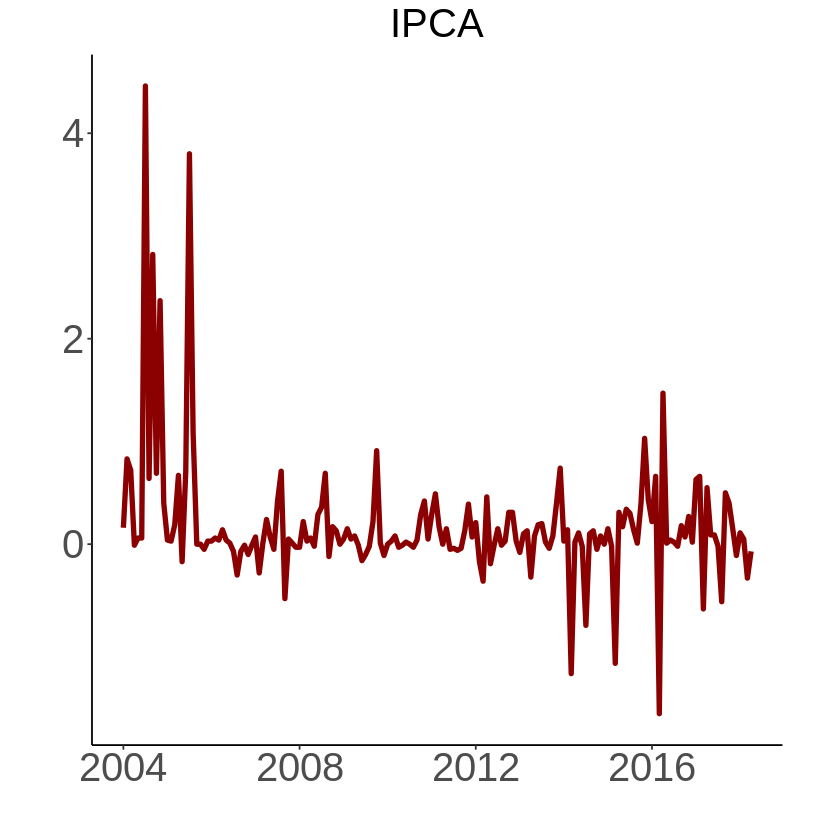

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

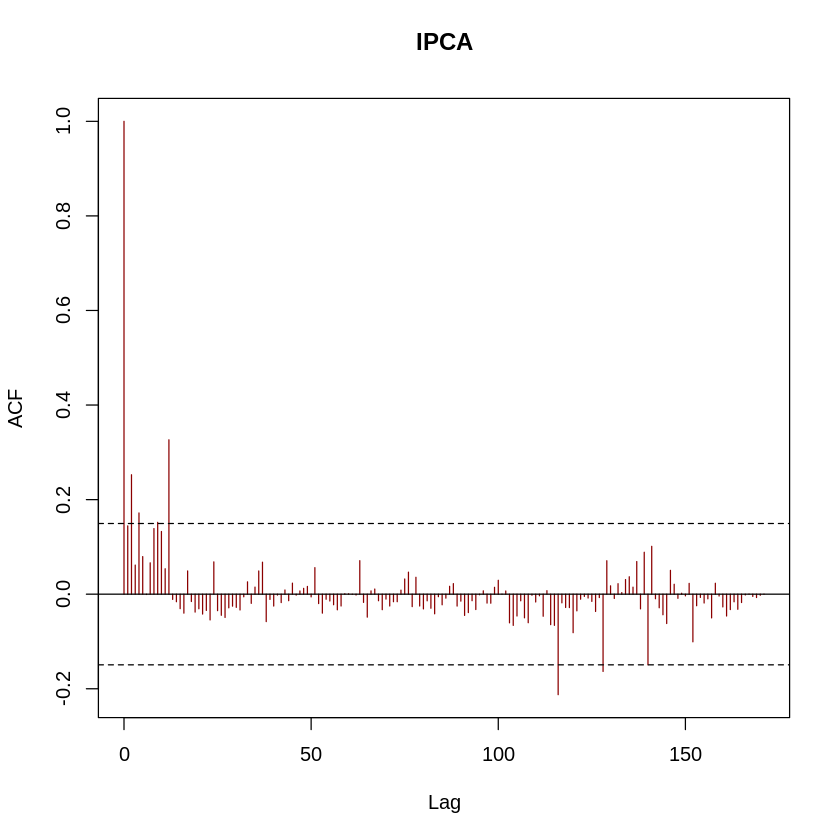

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

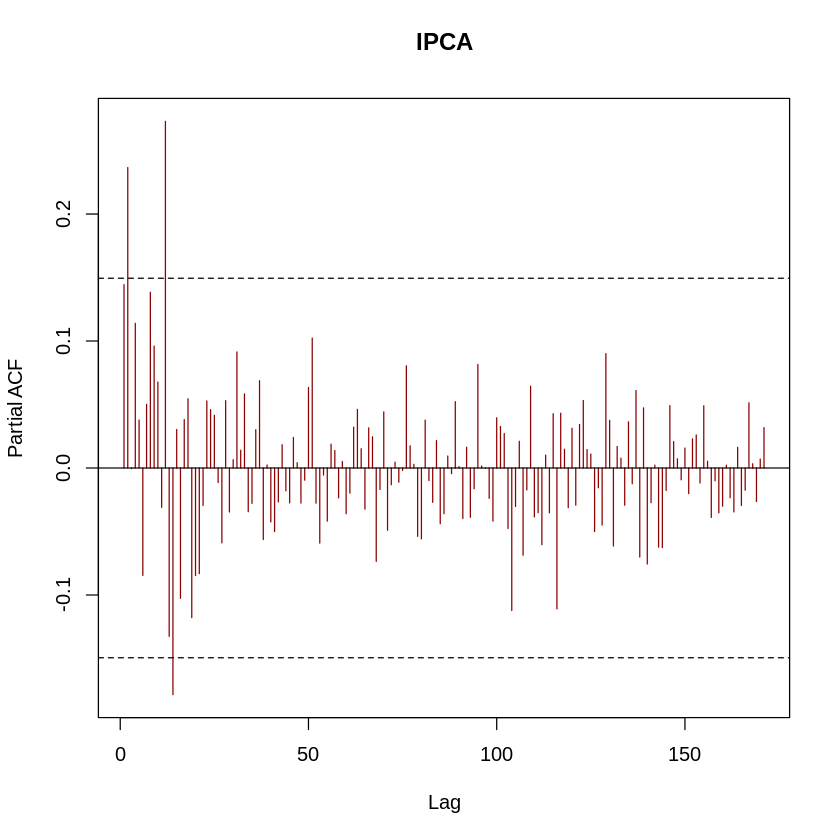

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35661 -0.12908 -0.03205  0.15576  1.85758 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0116522  0.0914729   0.127 0.898814    
z.lag.1      -0.6786171  0.1561772  -4.345 2.61e-05 ***
tt            0.0003374  0.0007934   0.425 0.671329    
z.diff.lag1  -0.2386148  0.1508097  -1.582 0.115792    
z.diff.lag2  -0.3560676  0.1417818  -2.511 0.013130 *  
z.diff.lag3  -0.3753434  0.1404203  -2.673 0.008385 ** 
z.diff.lag4  -0.4531469  0.1371565  -3.304 0.001203 ** 
z.diff.lag5  -0.4239126  0.1348316  -3.144 0.002024 ** 
z.diff.lag6  -0.4716683  0.1272464  -3.707 0.000299 ***
z.diff.lag7  -0.4784723  0.1169943  -4.090 7.16e-05 ***
z.diff.lag8  -0.4131401  0.11151

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal não possui raiz unitária, o que significa que pode-se afirmar que a série é estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2216 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é maior em módulo que a estatística crítica de teste t (no nível de significância de 0.01), rejeita-se a hipótese nula do teste KPSS. Portanto não se pode concluir que a série temporal não possui raiz unitária, o que significa que a série não é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1  0.67 1  
2 -0.11 2  
3 -0.73 3  
4  0.07 4  
5  0.00 5  
6  4.40 6

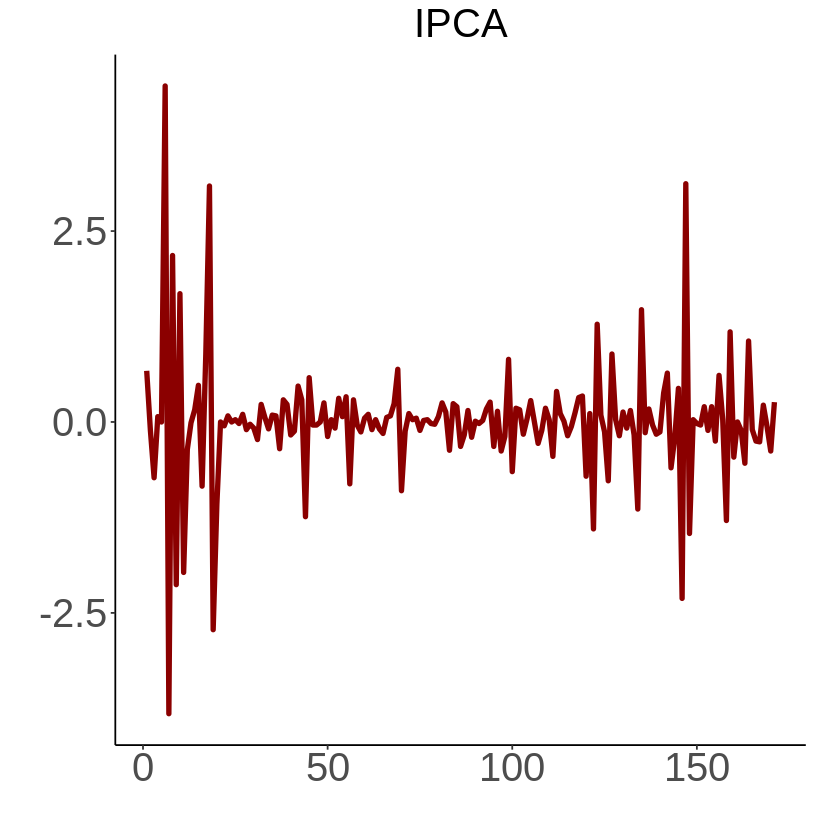

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

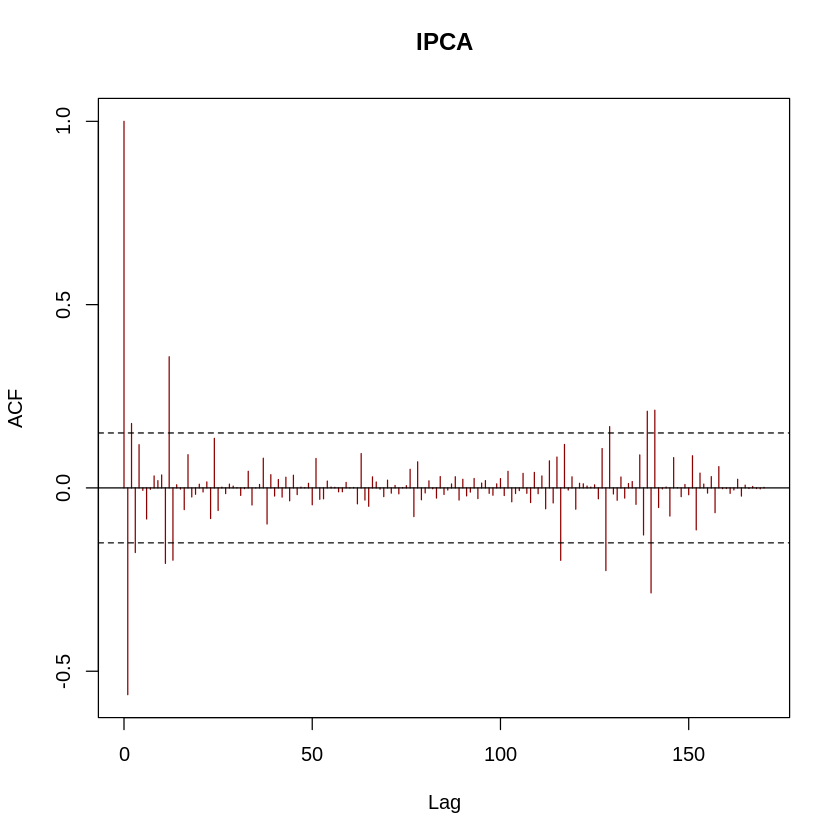

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

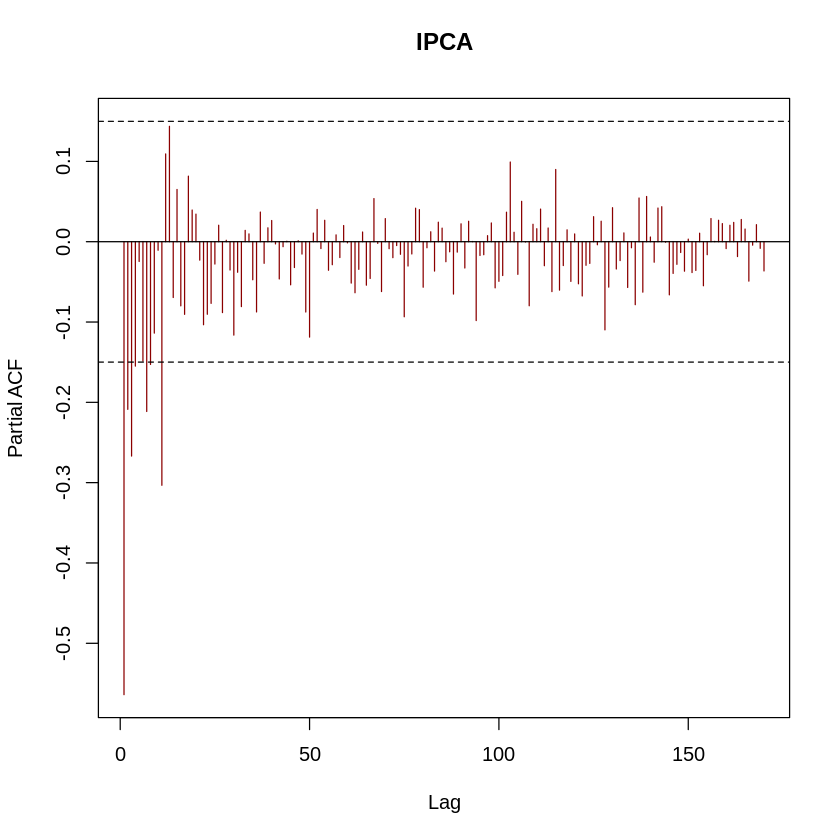

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54367 -0.14355 -0.00335  0.18681  1.59886 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1472917  0.0841633  -1.750 0.082251 .  
z.lag.1      -6.4068725  1.2219738  -5.243 5.57e-07 ***
tt            0.0011559  0.0008008   1.443 0.151094    
z.diff.lag1   4.5933190  1.1833517   3.882 0.000158 ***
z.diff.lag2   3.7961213  1.1086546   3.424 0.000805 ***
z.diff.lag3   3.0950388  1.0158301   3.047 0.002755 ** 
z.diff.lag4   2.4048332  0.9070757   2.651 0.008925 ** 
z.diff.lag5   1.8493690  0.7862178   2.352 0.020024 *  
z.diff.lag6   1.3087724  0.6624920   1.976 0.050133 .  
z.diff.lag7   0.8366204  0.5423561   1.543 0.125146    
z.diff.lag8   0.4340532  0.43261

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal não possui raiz unitária, o que significa que pode-se afirmar que a série é estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0162 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1640`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.16  0.83  0.72 -0.01  0.06  0.06  4.46  0.64  2.82  0.69  2.37  0.40
2005  0.04  0.03  0.19  0.67 -0.17  0.71  3.80  1.08  0.00  0.00 -0.05  0.03
2006  0.03  0.06  0.04  0.14  0.04  0.01 -0.07 -0.30 -0.07 -0.01 -0.10 -0.01
2007  0.07 -0.28  0.01  0.24  0.07 -0.05  0.42  0.71 -0.53  0.05  0.01 -0.03
2008 -0.03  0.22  0.03  0.06 -0.02  0.29  0.36  0.69 -0.12  0.17  0.13  0.00
2009  0.05  0.15  0.05  0.08 -0.01 -0.16 -0.10 -0.02  0.22  0.91  0.01 -0.11
2010  0.00  0.03  0.08 -0.03 -0.01  0.02  0.00 -0.03  0.04  0.29  0.42  0.05
2011  0.29  0.49  0.17  0.00  0.15 -0.05 -0.04 -0.06 -0.04  0.13  0.39  0.07
2012  0.21 -0.17 -0.36  0.46 -0.19 -0.01  0.15 -0.01  0.03  0.31  0.31  0.03
2013 -0.08  0.10  0.13 -0.32  0.08  0.19  0.20  0.02 -0.04  0.08  0.40  0.74
2014  0.03  0.14 -1.26  0.02  0.11 -0.02 -0.79  0.10  0.13 -0.05  0.08  0.00
2015  0.15 -0.02 -1.16  0.31  0.17  0.34  0.30  0.14  0.01  0.39  1.03  0.43
2016  0.22  0.66 -1.65  1.47  0.01  0.04  0.02 -0.02  0.18  0.07  0.27  0.02
2017  0.63  0.66 -0.63  0.55  0.09  0.09 -0.02 -0.56  0.50  0.40  0.15 -0.11
2018  0.11  0.05 -0.33 -0.07  0.16  0.00  0.08  0.03 -0.07  0.02 -0.07  0.01
2019  0.04  0.00 -0.22  0.03 -0.03 -0.02  0.57  0.09 -0.01 -0.01 -0.02  0.66
2020  0.12  0.21  0.04 -0.20  0.24  0.75  0.51  0.67  0.15  0.21  0.29  0.39
2021  0.02 -0.13 -0.07  0.08  0.21 -0.12  0.12  0.23  0.07  0.54  0.09  0.34
2022  1.05  0.29 -0.05  0.08  0.72  0.16  0.07 -1.10 -2.08 -0.48 -0.14  0.50
2023  2.09  0.98  0.50  0.08  0.21 -0.14  0.00 -0.09 -0.11 -0.19 -0.50  0.04
2024 -0.08  1.56 -0.13  0.48  0.14

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(5,1,0)(2,0,2)[12] 

Coefficients:
          ar1      ar2      ar3      ar4      ar5    sar1     sar2     sma1
      -0.7334  -0.4231  -0.3934  -0.1729  -0.0539  0.7940  -0.1873  -0.2868
s.e.   0.0780   0.0942   0.0970   0.0942   0.0768  1.6005   1.0595   1.6051
        sma2
      0.1667
s.e.  0.3082

sigma^2 = 0.3213:  log likelihood = -143.68
AIC=307.37   AICc=308.74   BIC=338.78

In [ ]:
accuracy(arima_treino,train=treino)

ME           RMSE     MAE       MPE  MAPE MASE     ACF1       
Training set -0.004574442 0.550081 0.3512638 -Inf Inf  1.028591 -0.01404034

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME        RMSE      MAE       MPE      MAPE     MASE ACF1      
Training set 0.1450927 0.2511232 0.1450927 17.53486 17.53486 NaN  -0.6666667

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


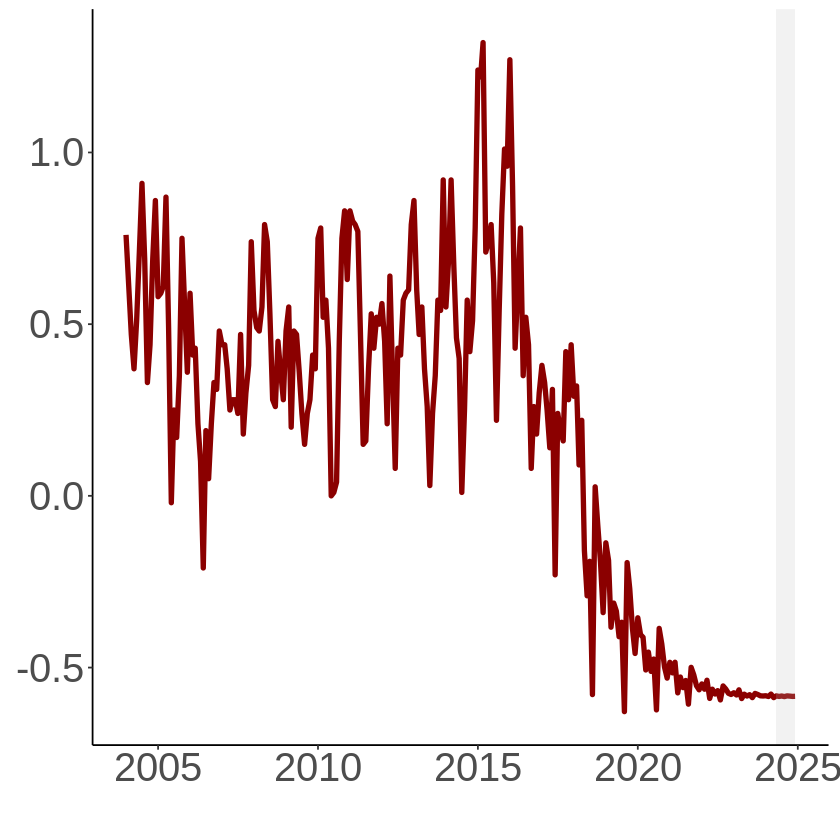

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

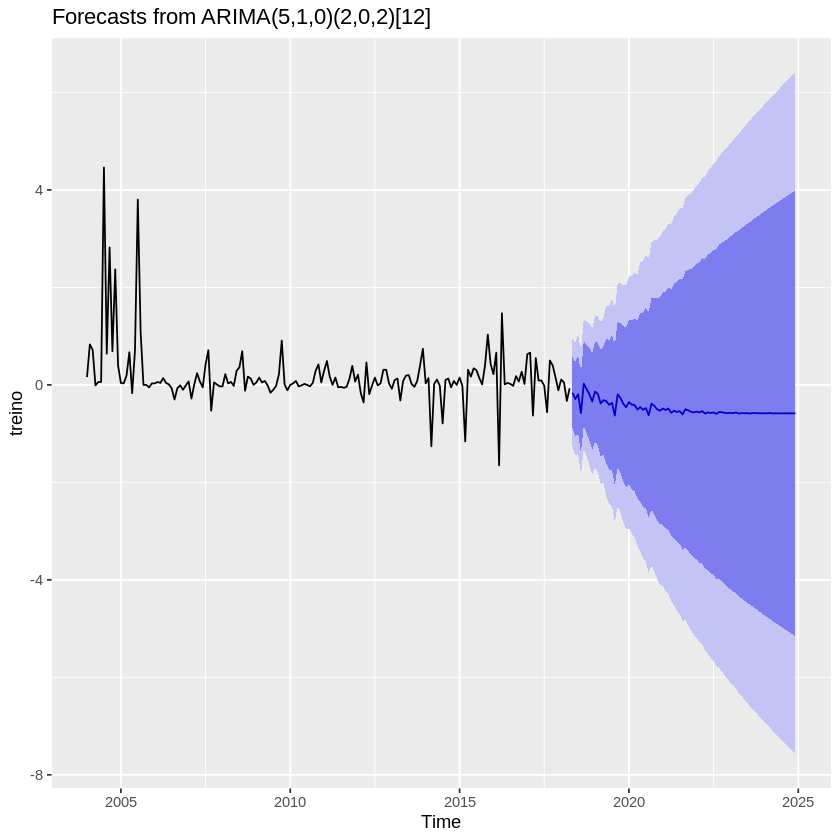

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

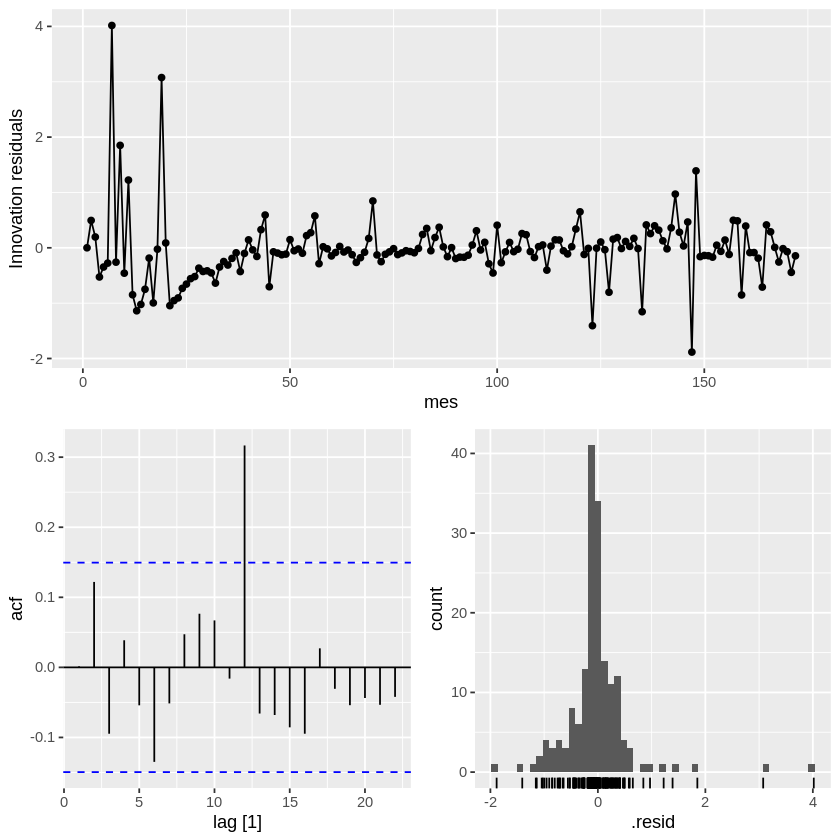

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
comunicacao_acumulado=(prod(df$value)-1)*100
comunicacao_acumulado

[1] -6.778713

# **IPCA desagregado - Saúde e cuidados pessoais**

In [ ]:
dat_ipca <- data.frame( ipca = dat$saude_e_cuidados_pessoais, mes = time(dat$saude_e_cuidados_pessoais))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

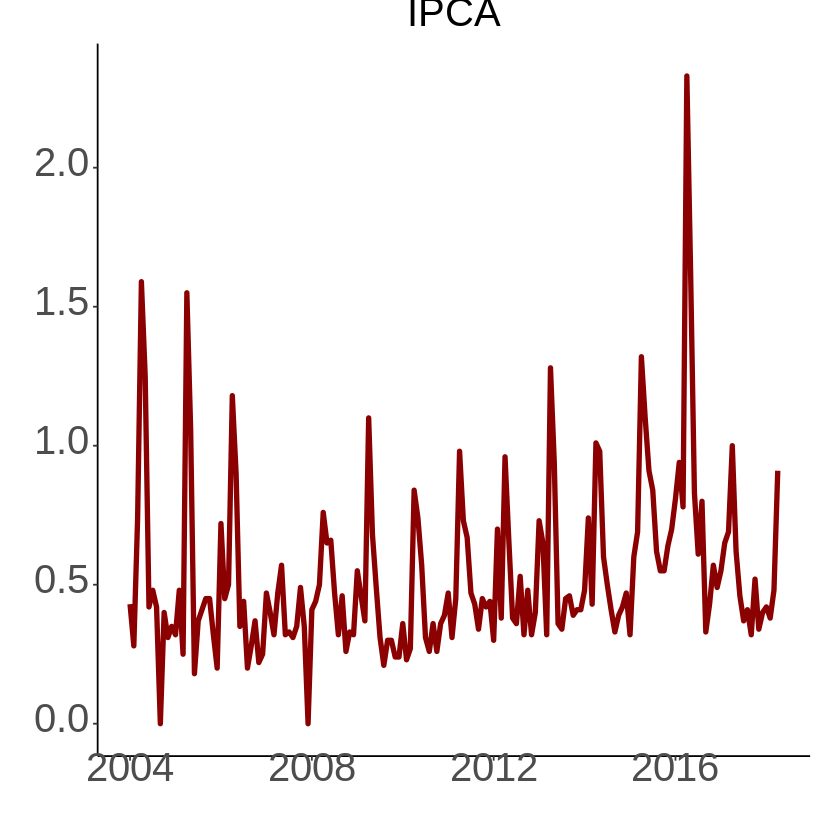

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

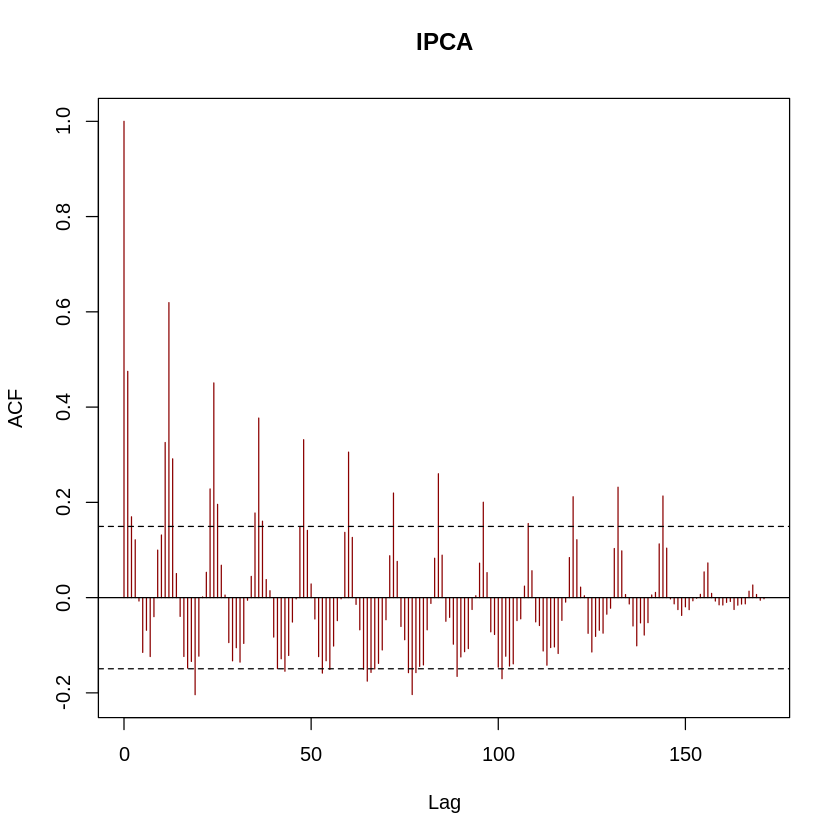

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

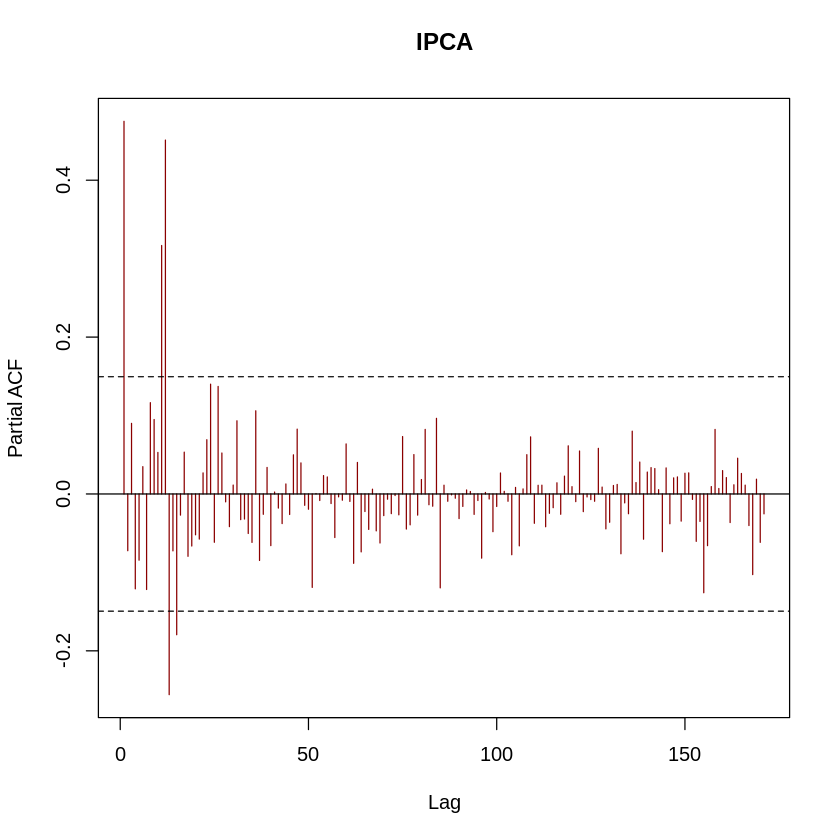

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61860 -0.11367 -0.00575  0.08040  1.23925 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1102394  0.0687514   1.603 0.111027    
z.lag.1      -0.2821961  0.1585937  -1.779 0.077289 .  
tt            0.0004226  0.0004603   0.918 0.360085    
z.diff.lag1  -0.2844314  0.1699922  -1.673 0.096458 .  
z.diff.lag2  -0.3110749  0.1640059  -1.897 0.059866 .  
z.diff.lag3  -0.2739221  0.1552914  -1.764 0.079866 .  
z.diff.lag4  -0.2441554  0.1474469  -1.656 0.099922 .  
z.diff.lag5  -0.3117031  0.1357327  -2.296 0.023093 *  
z.diff.lag6  -0.2824218  0.1252891  -2.254 0.025696 *  
z.diff.lag7  -0.3620245  0.1166035  -3.105 0.002294 ** 
z.diff.lag8  -0.3739471  0.10670

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1222 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.15 1  
2  0.46 2  
3  0.85 3  
4 -0.34 4  
5 -0.83 5  
6  0.06 6

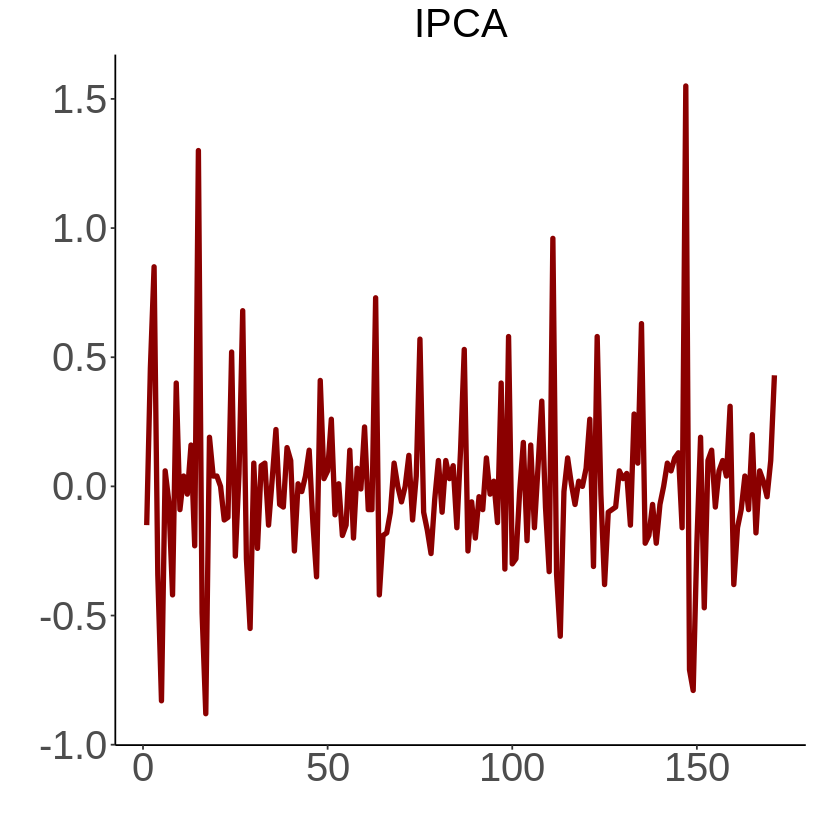

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

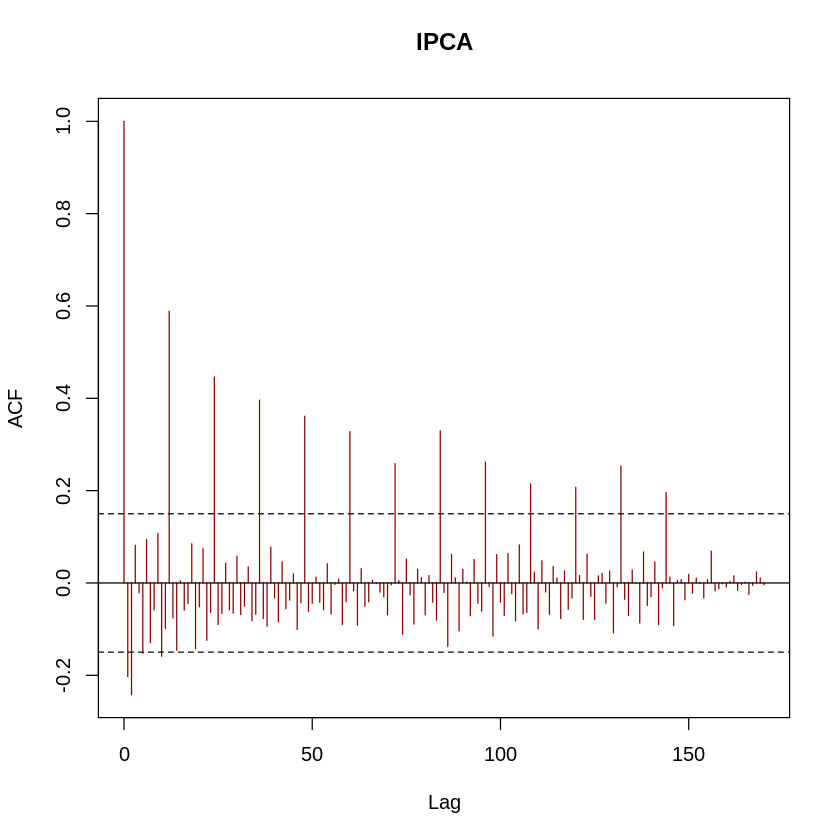

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

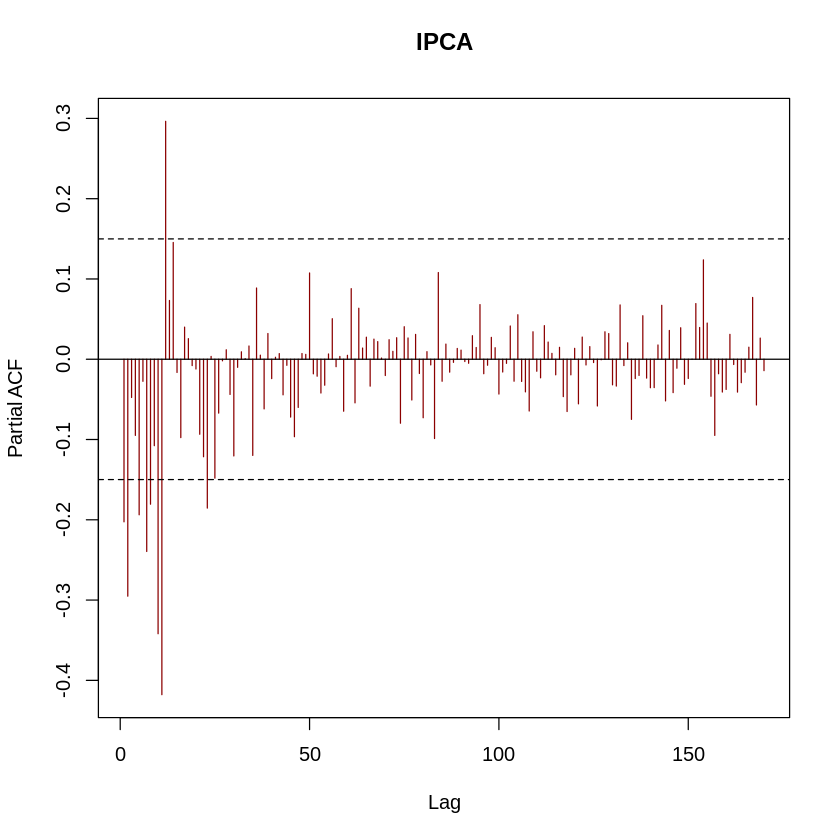

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64075 -0.11433 -0.01123  0.09422  1.16479 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.432e-03  3.728e-02   0.119 0.905532    
z.lag.1      -5.072e+00  9.733e-01  -5.211 6.43e-07 ***
tt           -6.728e-05  3.646e-04  -0.185 0.853855    
z.diff.lag1   3.490e+00  9.351e-01   3.732 0.000274 ***
z.diff.lag2   2.975e+00  8.639e-01   3.444 0.000752 ***
z.diff.lag3   2.536e+00  7.841e-01   3.235 0.001513 ** 
z.diff.lag4   2.143e+00  7.025e-01   3.051 0.002722 ** 
z.diff.lag5   1.721e+00  6.188e-01   2.781 0.006150 ** 
z.diff.lag6   1.352e+00  5.363e-01   2.521 0.012789 *  
z.diff.lag7   9.195e-01  4.568e-01   2.013 0.046027 *  
z.diff.lag8   5.109e-01  3.759e-

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal não possui raiz unitária, o que significa que pode-se afirmar que a série é estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0128 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1641`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.43  0.28  0.74  1.59  1.25  0.42  0.48  0.42  0.00  0.40  0.31  0.35
2005  0.32  0.48  0.25  1.55  1.06  0.18  0.37  0.41  0.45  0.45  0.32  0.20
2006  0.72  0.45  0.50  1.18  0.90  0.35  0.44  0.20  0.28  0.37  0.22  0.25
2007  0.47  0.40  0.32  0.47  0.57  0.32  0.33  0.31  0.35  0.49  0.35  0.00
2008  0.41  0.44  0.50  0.76  0.65  0.66  0.47  0.32  0.46  0.26  0.33  0.32
2009  0.55  0.46  0.37  1.10  0.68  0.49  0.31  0.21  0.30  0.30  0.24  0.24
2010  0.36  0.23  0.27  0.84  0.74  0.57  0.31  0.26  0.36  0.26  0.36  0.39
2011  0.47  0.31  0.45  0.98  0.73  0.67  0.47  0.43  0.34  0.45  0.42  0.44
2012  0.30  0.70  0.38  0.96  0.66  0.38  0.36  0.53  0.32  0.48  0.32  0.40
2013  0.73  0.65  0.32  1.28  0.94  0.36  0.34  0.45  0.46  0.39  0.41  0.41
2014  0.48  0.74  0.43  1.01  0.98  0.60  0.50  0.41  0.33  0.39  0.42  0.47
2015  0.32  0.60  0.69  1.32  1.10  0.91  0.84  0.62  0.55  0.55  0.64  0.70
2016  0.81  0.94  0.78  2.33  1.62  0.83  0.61  0.80  0.33  0.43  0.57  0.49
2017  0.55  0.65  0.69  1.00  0.62  0.46  0.37  0.41  0.32  0.52  0.34  0.40
2018  0.42  0.38  0.48  0.91  0.57  0.37  0.07  0.53  0.28  0.27 -0.71  0.32
2019  0.26  0.49  0.42  1.51  0.59  0.64 -0.20 -0.03  0.58  0.40  0.21  0.42
2020 -0.32  0.73  0.21 -0.22 -0.10  0.35  0.44  0.50 -0.64  0.28 -0.13  0.40
2021  0.32  0.62 -0.02  1.19  0.76  0.51 -0.65 -0.04  0.39  0.39 -0.57  0.75
2022  0.36  0.47  0.88  1.77  1.01  1.24  0.49  1.31  0.57  1.16  0.02  1.60
2023  0.16  1.26  0.82  1.49  0.93  0.11  0.26  0.58  0.04  0.32  0.08  0.35
2024  0.83  0.65  0.43  1.16  0.69

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(1,0,2)(2,1,0)[12] with drift 

Coefficients:
         ar1      ma1      ma2     sar1     sar2   drift
      0.8897  -0.4769  -0.1682  -0.5274  -0.3950  0.0000
s.e.  0.0785   0.1112   0.0915   0.0798   0.0892  0.0022

sigma^2 = 0.03824:  log likelihood = 34.12
AIC=-54.24   AICc=-53.51   BIC=-32.72

In [ ]:
accuracy(arima_treino,train=treino)

ME          RMSE     MAE       MPE  MAPE MASE      ACF1        
Training set 0.000143235 0.185026 0.1239861 -Inf Inf  0.7064737 -0.005003588

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME           RMSE         MAE          MPE        MAPE       MASE
Training set 0.0004299825 0.0004299825 0.0004299825 0.09999594 0.09999594 NaN 
             ACF1
Training set NaN

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


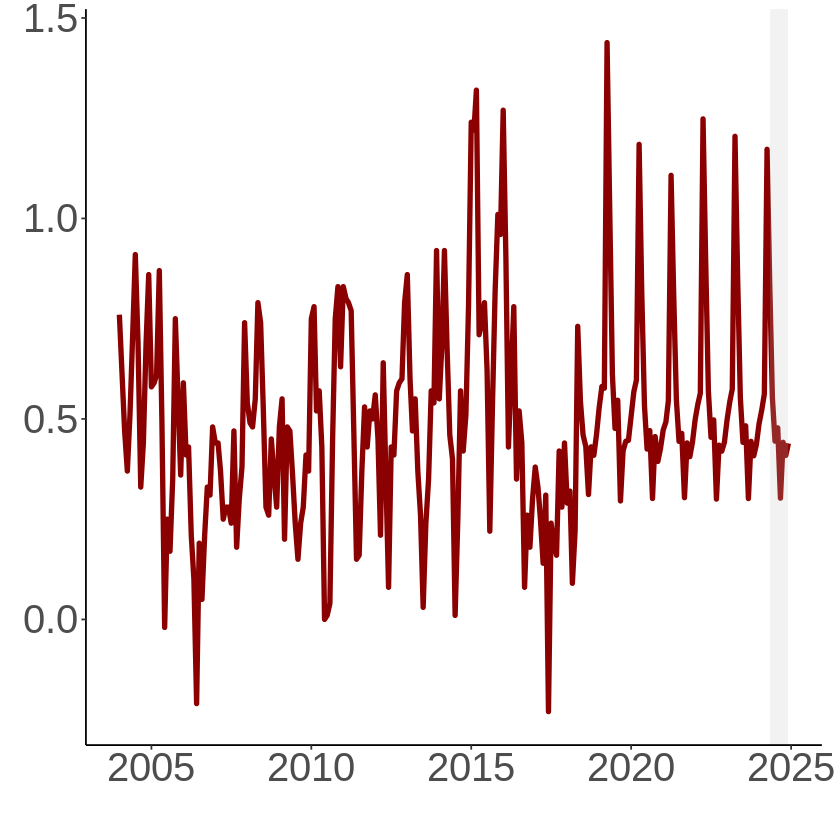

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

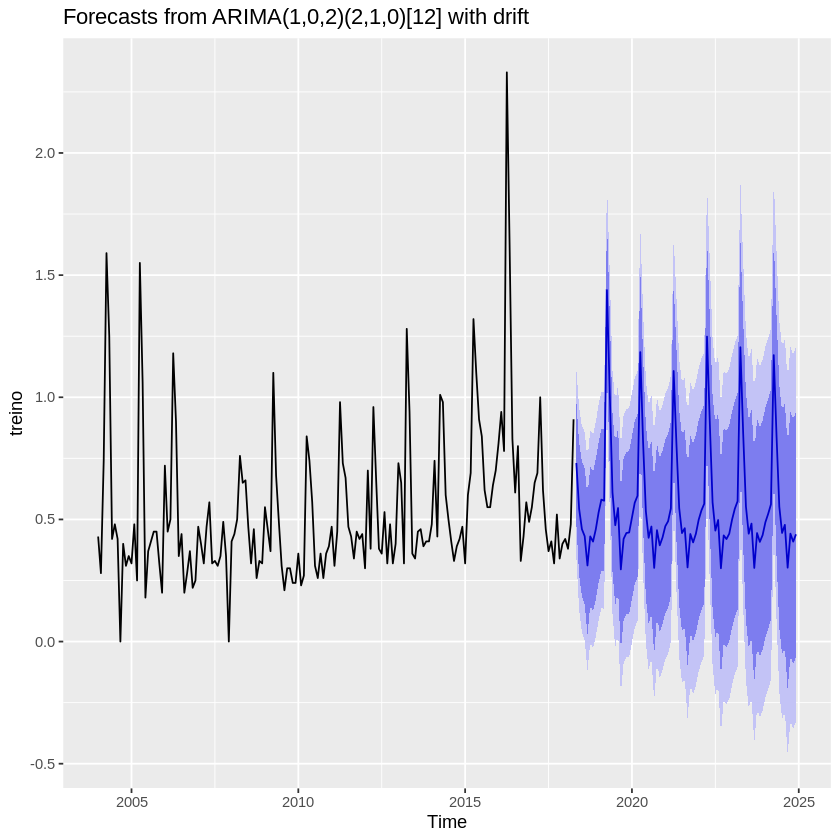

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

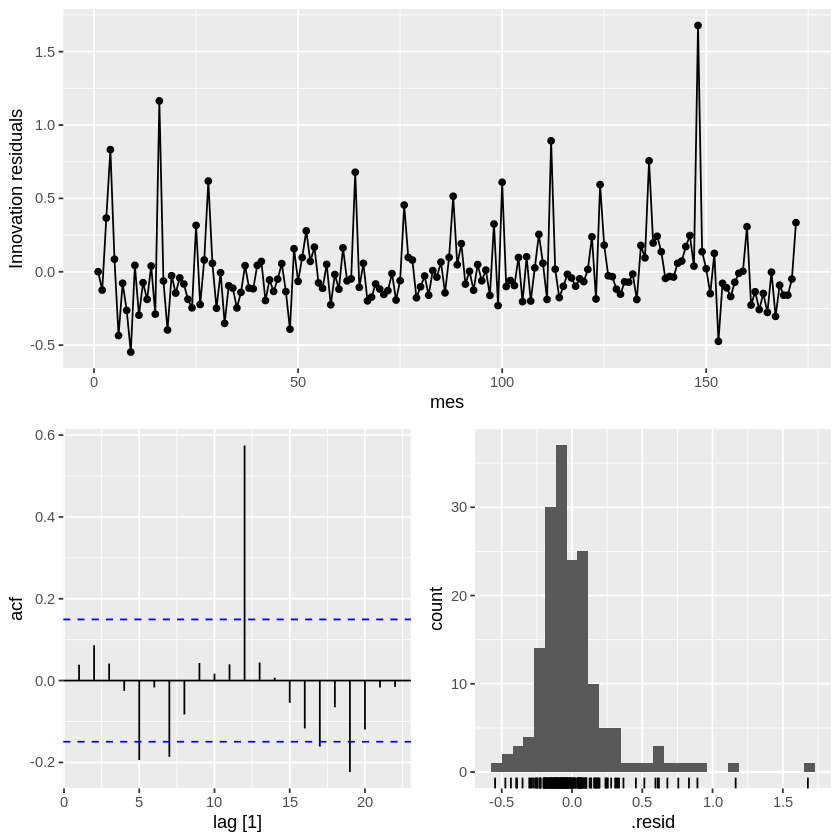

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
saude_e_cuidados_pessoais_acumulado=(prod(df$value)-1)*100
saude_e_cuidados_pessoais_acumulado

[1] 6.859651

# **IPCA desagregado - Despesas pessoais**

In [ ]:
dat_ipca <- data.frame( ipca = dat$despesas_pessoais, mes = time(dat$despesas_pessoais))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

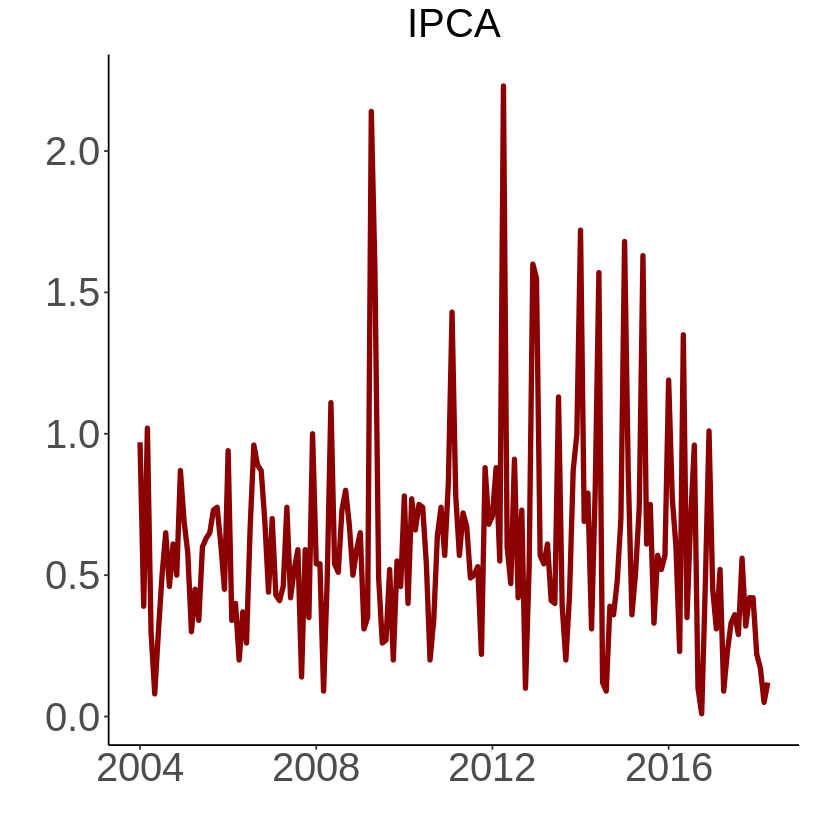

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

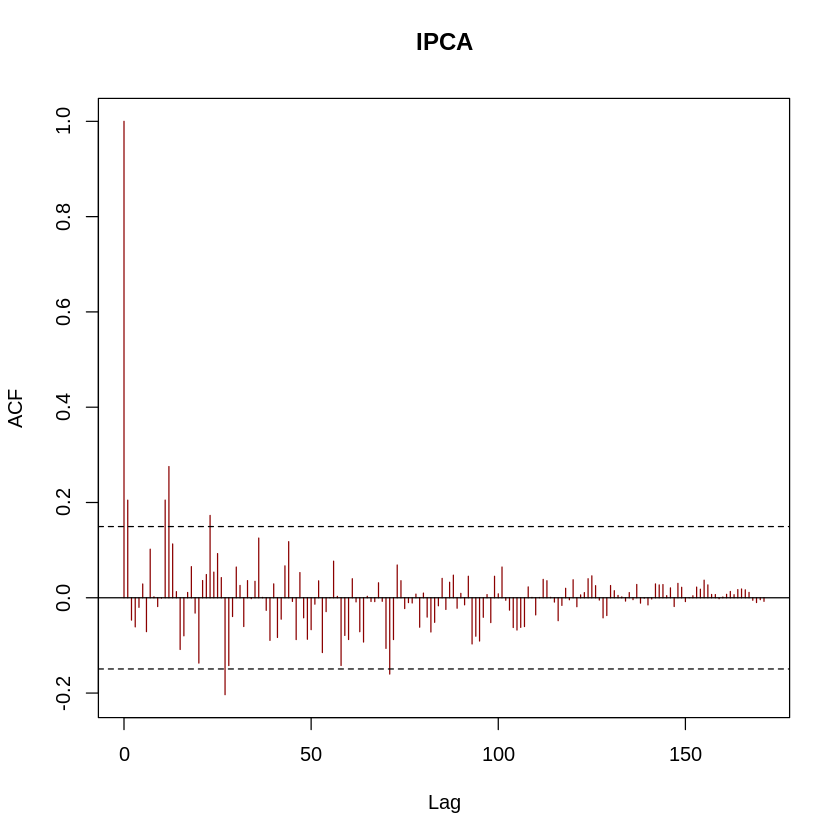

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

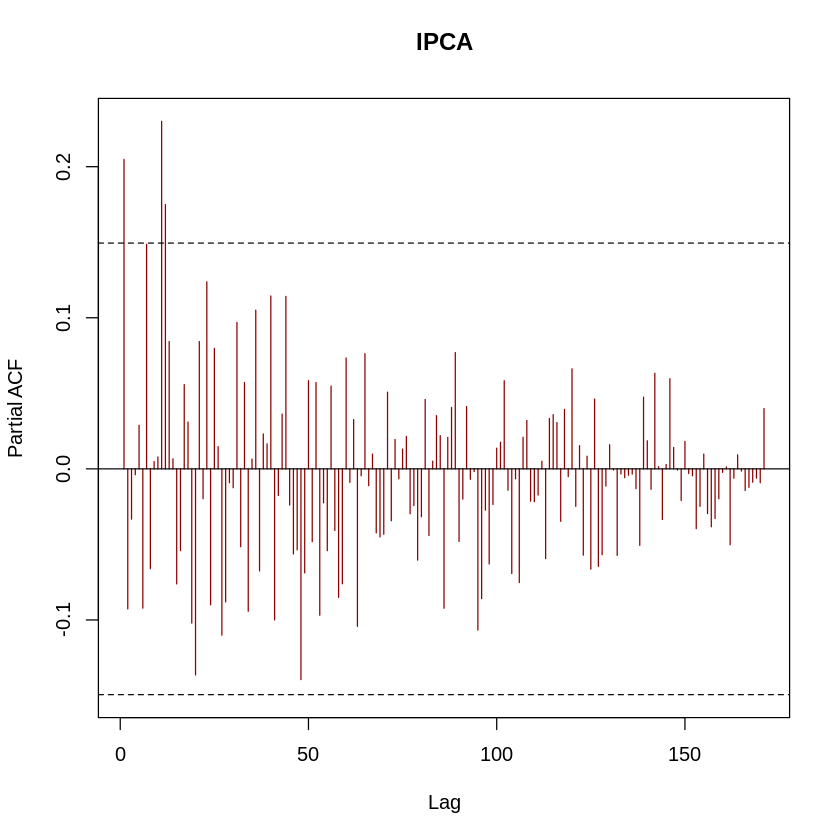

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62374 -0.20217 -0.06478  0.14077  1.59326 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2029228  0.1742609   1.164 0.246156    
z.lag.1      -0.2251661  0.2755139  -0.817 0.415131    
tt           -0.0008440  0.0006371  -1.325 0.187335    
z.diff.lag1  -0.5929079  0.2781590  -2.132 0.034742 *  
z.diff.lag2  -0.7174568  0.2714397  -2.643 0.009123 ** 
z.diff.lag3  -0.7114522  0.2585366  -2.752 0.006689 ** 
z.diff.lag4  -0.7438744  0.2454504  -3.031 0.002894 ** 
z.diff.lag5  -0.6605752  0.2309941  -2.860 0.004871 ** 
z.diff.lag6  -0.7808742  0.2171174  -3.597 0.000442 ***
z.diff.lag7  -0.5836070  0.1970788  -2.961 0.003584 ** 
z.diff.lag8  -0.6176535  0.17910

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2372 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é maior em módulo que a estatística crítica de teste t (no nível de significância de 0.01), rejeita-se a hipótese nula do teste KPSS. Portanto não se pode concluir que a série temporal não possui raiz unitária, o que significa que a série não é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1 -0.58 1  
2  0.63 2  
3 -0.72 3  
4 -0.22 4  
5  0.22 5  
6  0.20 6

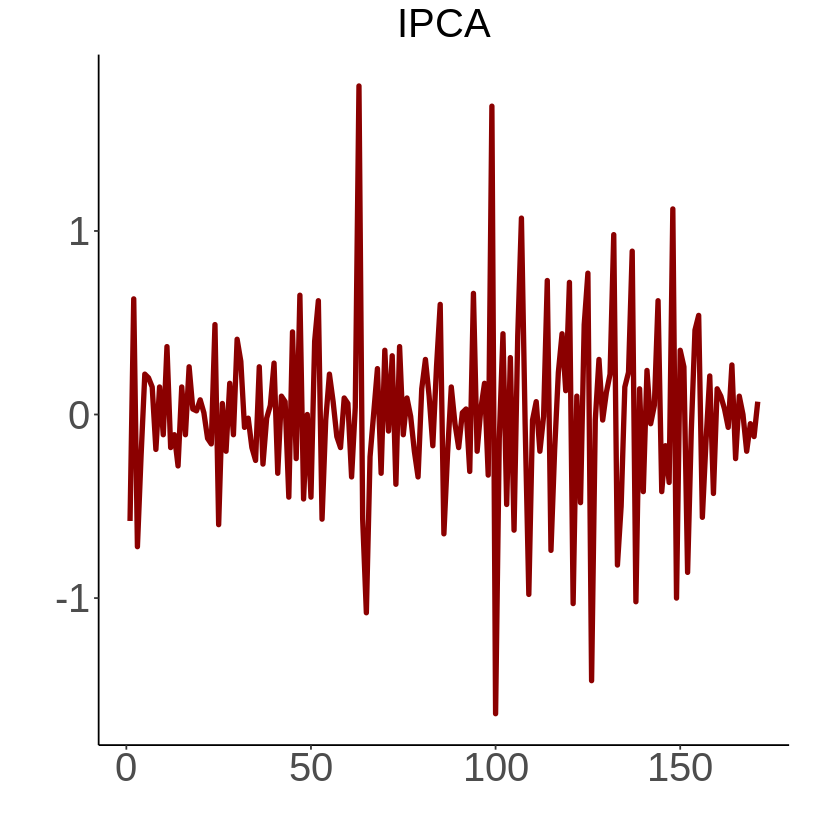

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

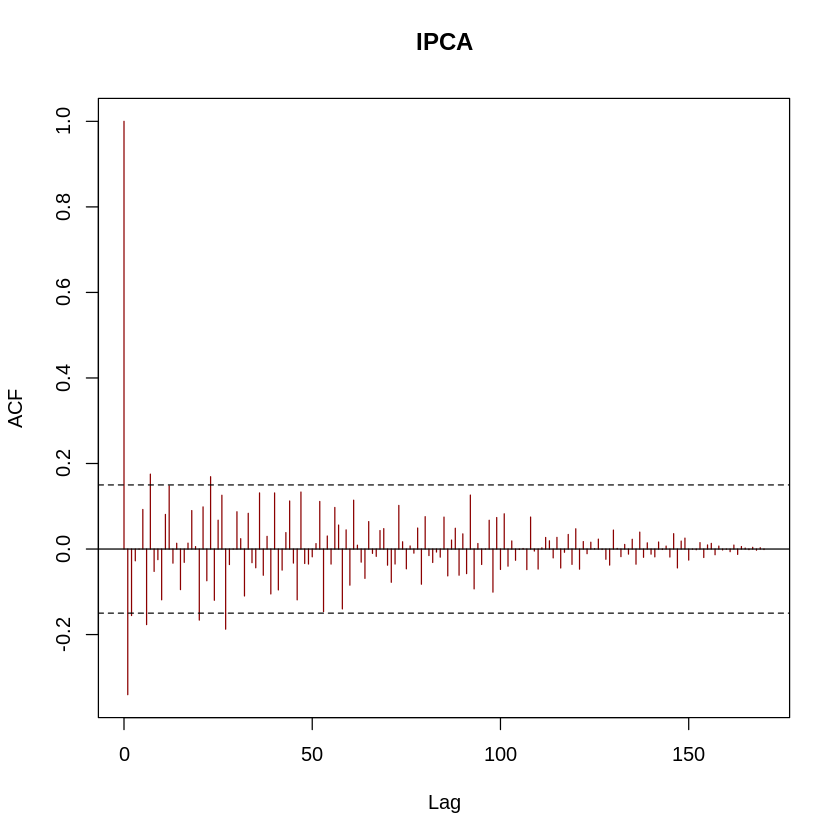

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

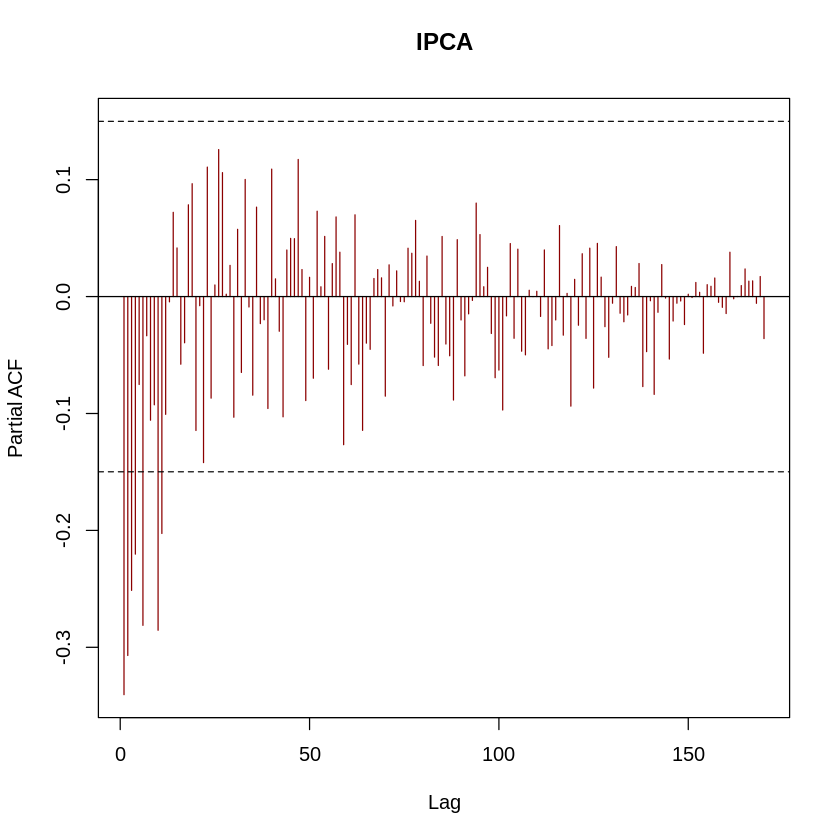

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64481 -0.21574 -0.05542  0.13593  1.54619 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.684e-02  6.470e-02   1.188 0.236949    
z.lag.1      -1.011e+01  1.381e+00  -7.320 1.64e-11 ***
tt           -1.021e-03  6.386e-04  -1.600 0.111905    
z.diff.lag1   8.285e+00  1.335e+00   6.207 5.51e-09 ***
z.diff.lag2   7.337e+00  1.260e+00   5.825 3.62e-08 ***
z.diff.lag3   6.394e+00  1.160e+00   5.512 1.61e-07 ***
z.diff.lag4   5.436e+00  1.049e+00   5.181 7.38e-07 ***
z.diff.lag5   4.574e+00  9.265e-01   4.936 2.19e-06 ***
z.diff.lag6   3.610e+00  7.990e-01   4.518 1.30e-05 ***
z.diff.lag7   2.850e+00  6.604e-01   4.315 2.96e-05 ***
z.diff.lag8   2.081e+00  5.298e-

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal não possui raiz unitária, o que significa que pode-se afirmar que a série é estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0209 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1642`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.97  0.39  1.02  0.30  0.08  0.30  0.50  0.65  0.46  0.61  0.50  0.87
2005  0.69  0.58  0.30  0.45  0.34  0.60  0.63  0.65  0.73  0.74  0.61  0.45
2006  0.94  0.34  0.40  0.20  0.37  0.26  0.67  0.96  0.89  0.87  0.69  0.44
2007  0.70  0.43  0.41  0.46  0.74  0.42  0.52  0.59  0.14  0.59  0.35  1.00
2008  0.54  0.54  0.09  0.49  1.11  0.54  0.51  0.73  0.80  0.68  0.50  0.59
2009  0.65  0.31  0.35  2.14  1.57  0.49  0.26  0.27  0.52  0.20  0.55  0.46
2010  0.78  0.40  0.77  0.66  0.75  0.74  0.54  0.20  0.34  0.64  0.74  0.57
2011  0.83  1.43  0.78  0.57  0.72  0.67  0.49  0.50  0.53  0.22  0.88  0.68
2012  0.71  0.88  0.55  2.23  0.60  0.47  0.91  0.42  0.73  0.10  0.53  1.60
2013  1.55  0.57  0.54  0.61  0.41  0.40  1.13  0.39  0.20  0.43  0.87  1.00
2014  1.72  0.69  0.79  0.31  0.80  1.57  0.12  0.09  0.39  0.36  0.48  0.70
2015  1.68  0.86  0.36  0.51  0.74  1.63  0.61  0.75  0.33  0.57  0.52  0.57
2016  1.19  0.77  0.60  0.23  1.35  0.35  0.70  0.96  0.10  0.01  0.47  1.01
2017  0.45  0.31  0.52  0.09  0.23  0.33  0.36  0.29  0.56  0.32  0.42  0.42
2018  0.22  0.17  0.05  0.12  0.11  0.33  0.31  0.36  0.38  0.25  0.36  0.29
2019  0.61  0.18  0.16  0.17  0.16  0.15  0.44  0.31  0.04  0.20  1.24  0.92
2020  0.35  0.31 -0.23 -0.14 -0.04 -0.05 -0.11 -0.01  0.09  0.19  0.01  0.65
2021  0.39  0.17  0.04  0.01  0.21  0.29  0.45  0.64  0.56  0.75  0.57  0.56
2022  0.78  0.64  0.59  0.48  0.52  0.49  1.13  0.54  0.95  0.57  0.21  0.62
2023  0.76  0.44  0.38  0.18  0.64  0.36  0.38  0.38  0.45  0.27  0.58  0.48
2024  0.82  0.05  0.33  0.10  0.22

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(0,0,1)(0,0,1)[12] with non-zero mean 

Coefficients:
         ma1    sma1    mean
      0.1823  0.3062  0.6022
s.e.  0.0788  0.0896  0.0405

sigma^2 = 0.1241:  log likelihood = -63.69
AIC=135.38   AICc=135.62   BIC=147.97

In [ ]:
accuracy(arima_treino,train=treino)

ME          RMSE      MAE       MPE       MAPE     MASE     
Training set 8.40081e-05 0.3491769 0.2415049 -75.77376 97.36642 0.7712732
             ACF1        
Training set -0.009409571

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME        RMSE      MAE       MPE      MAPE     MASE ACF1
Training set 0.3459705 0.3459705 0.3459705 35.66707 35.66707 NaN  NaN

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


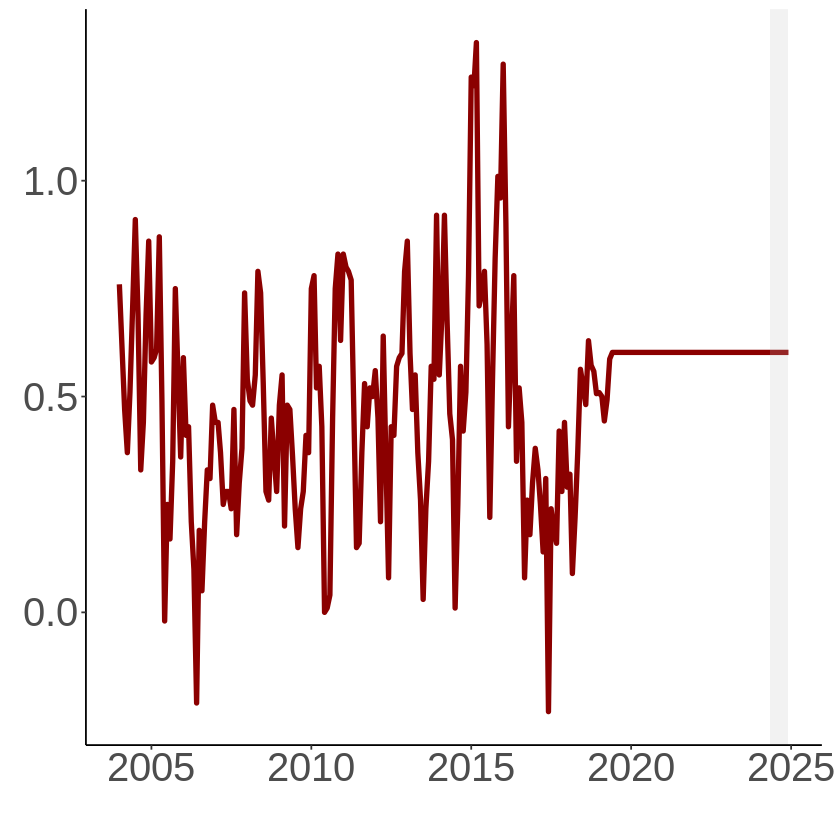

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

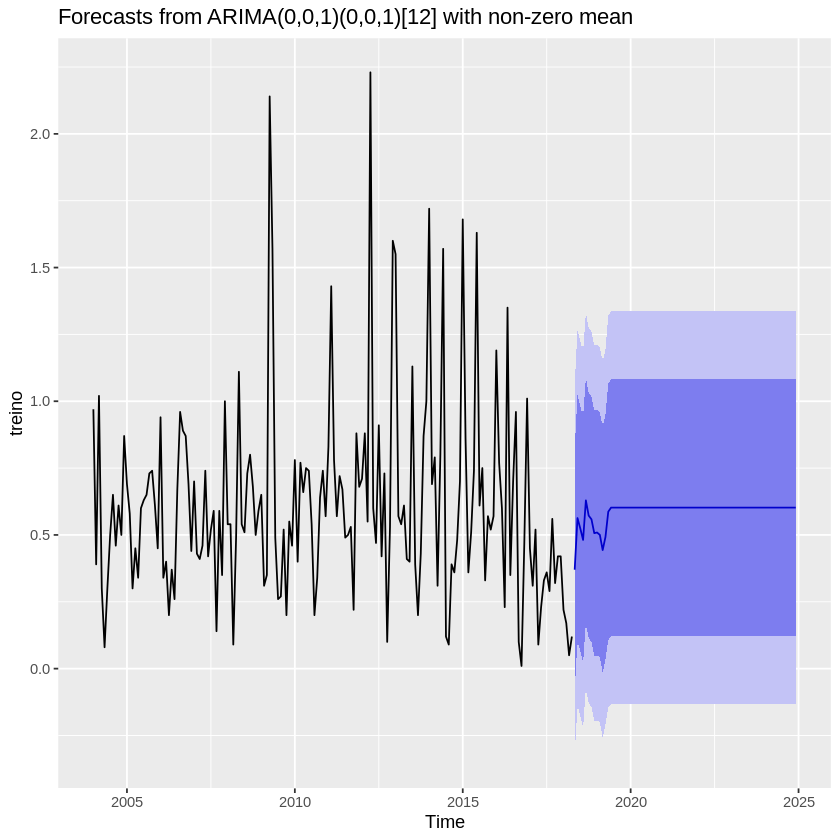

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

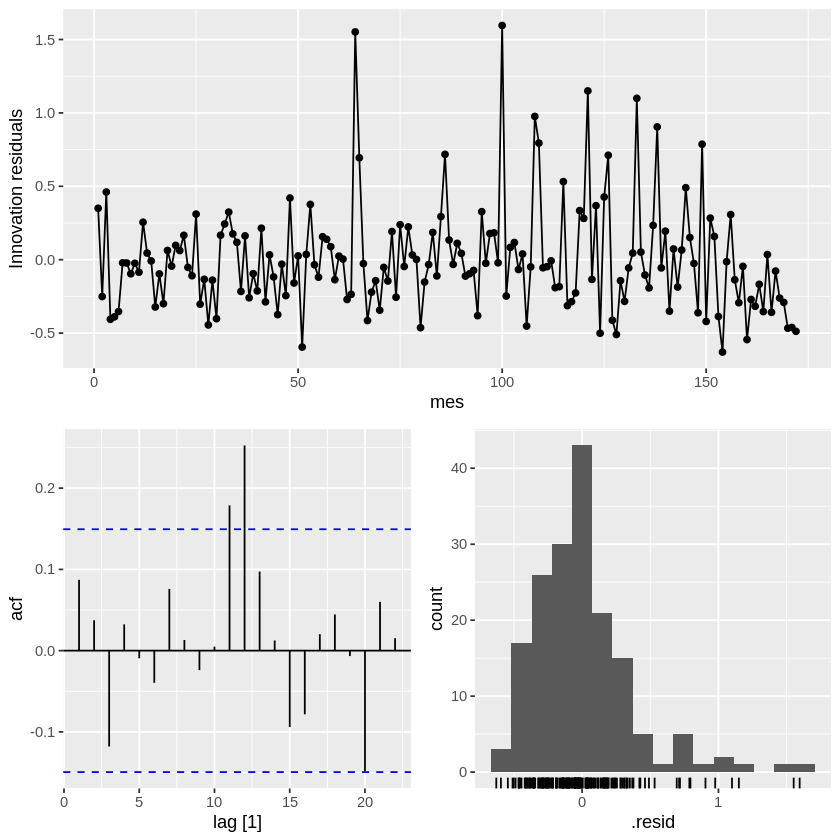

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
despesas_pessoais_acumulado=(prod(df$value)-1)*100
despesas_pessoais_acumulado

[1] 7.470794

# **IPCA desagregado - Educação**

In [ ]:
dat_ipca <- data.frame( ipca = dat$educacao, mes = time(dat$educacao))

In [ ]:
treino <- head(dat_ipca, round(nrow(dat) * 0.7))
teste <- tail(dat_ipca, round(nrow(dat) * 0.3)-1)

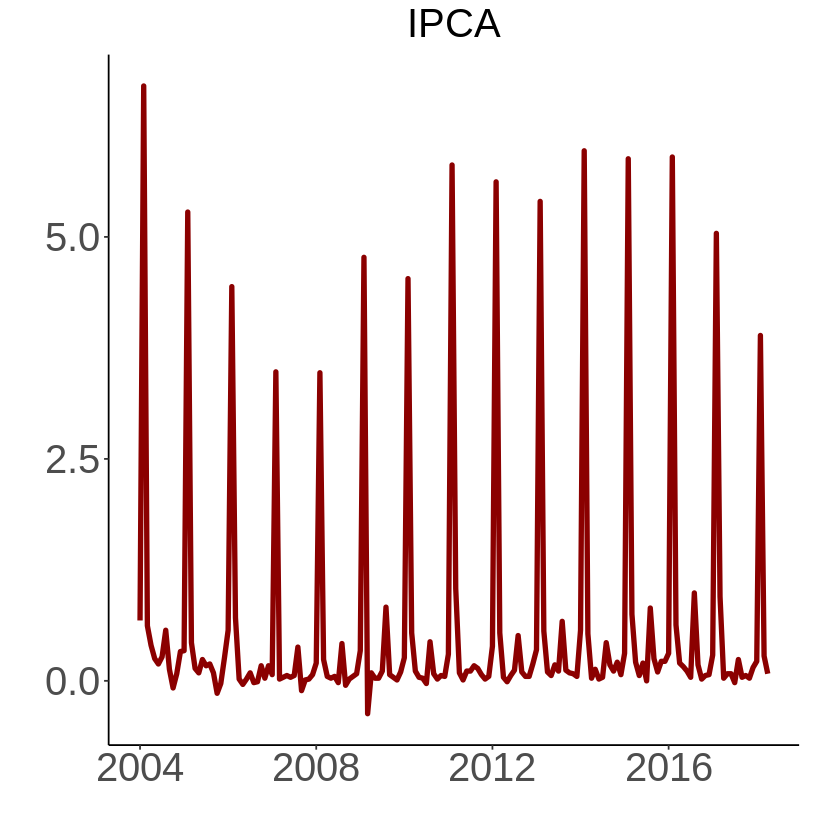

In [ ]:
ggplot( treino ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

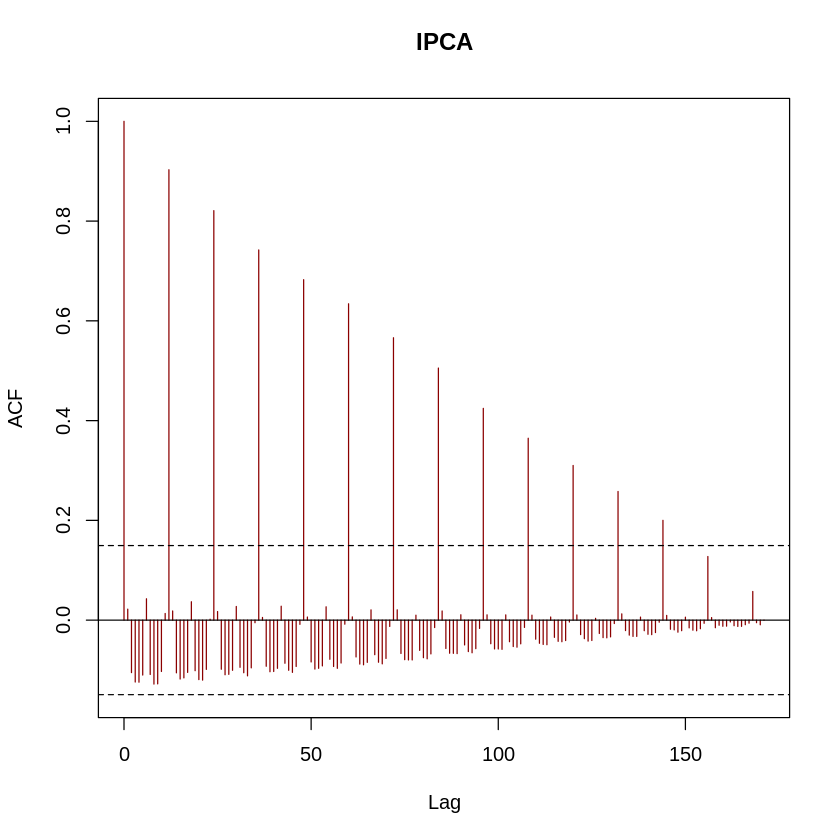

In [ ]:
acf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

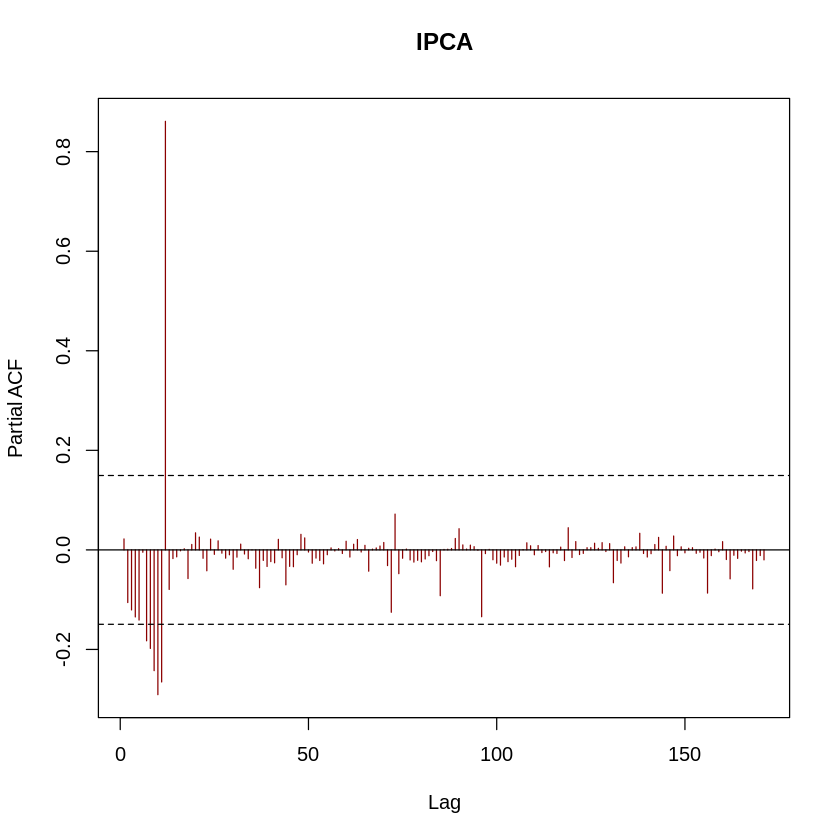

In [ ]:
pacf(treino$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino$ipca) - 1)

**Estacionariedade**

In [ ]:
summary( ur.df( treino$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95082 -0.08340  0.00277  0.09453  1.48712 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2137988  0.1199925   1.782 0.076895 .  
z.lag.1      -0.5678320  0.2421952  -2.345 0.020418 *  
tt            0.0010295  0.0006451   1.596 0.112679    
z.diff.lag1  -0.3133987  0.2399624  -1.306 0.193624    
z.diff.lag2  -0.3629622  0.2211249  -1.641 0.102889    
z.diff.lag3  -0.4050693  0.2033514  -1.992 0.048266 *  
z.diff.lag4  -0.4465261  0.1854571  -2.408 0.017319 *  
z.diff.lag5  -0.4955242  0.1678649  -2.952 0.003688 ** 
z.diff.lag6  -0.5340376  0.1507687  -3.542 0.000535 ***
z.diff.lag7  -0.5761197  0.1341026  -4.296 3.18e-05 ***
z.diff.lag8  -0.6170768  0.11819

Como as estatísticas calculadas de teste t são menores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal possui raiz unitária, o que significa que pode-se afirmar que a série é não estacionária.

In [ ]:
summary( ur.kpss( treino$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0413 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**Induzir estacionariedade**

In [ ]:
treino_diff <- data.frame( ipca = diff(treino$ipca), mes = time(diff(treino$ipca)))
head(treino_diff)

ipca  mes
1  6.02 1  
2 -6.08 2  
3 -0.22 3  
4 -0.15 4  
5 -0.06 5  
6  0.08 6

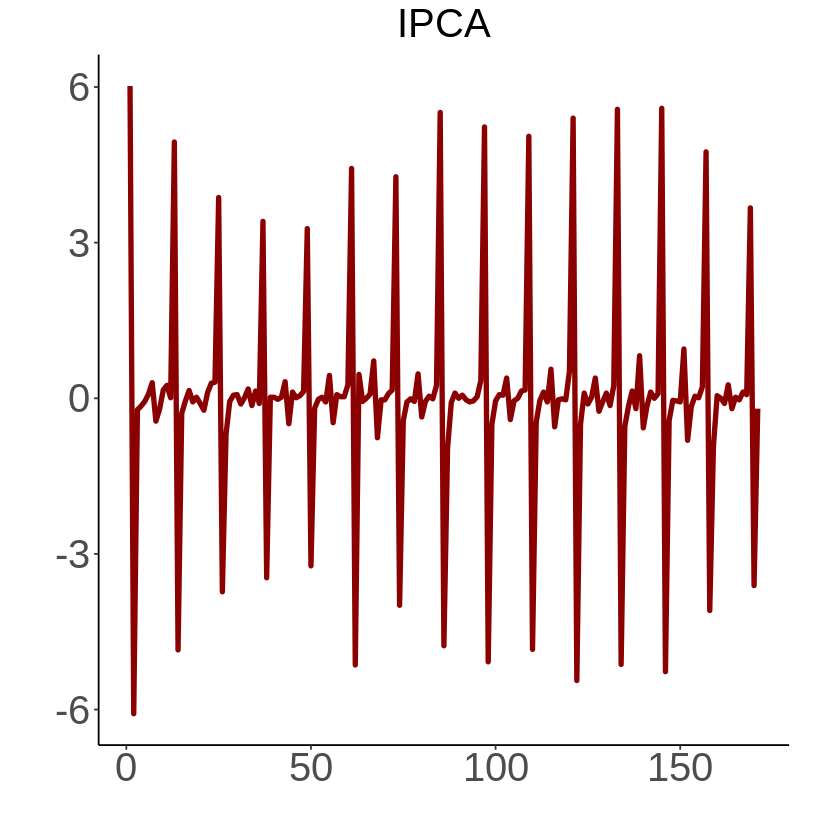

In [ ]:
ggplot( treino_diff ) + geom_line(aes(x = mes, y =  ipca ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "IPCA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) )

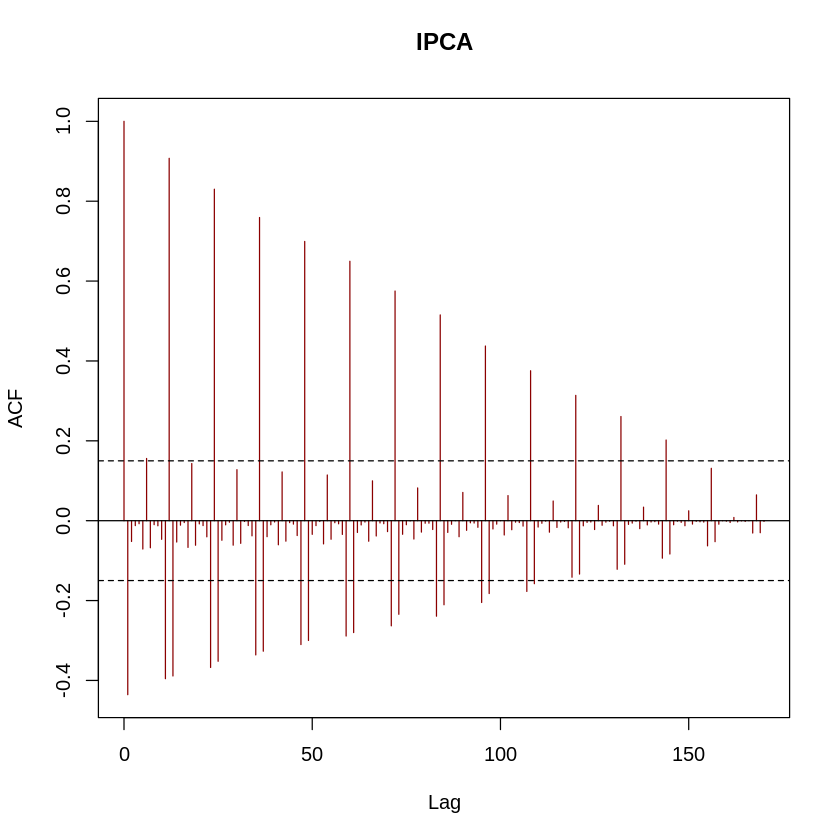

In [ ]:
acf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

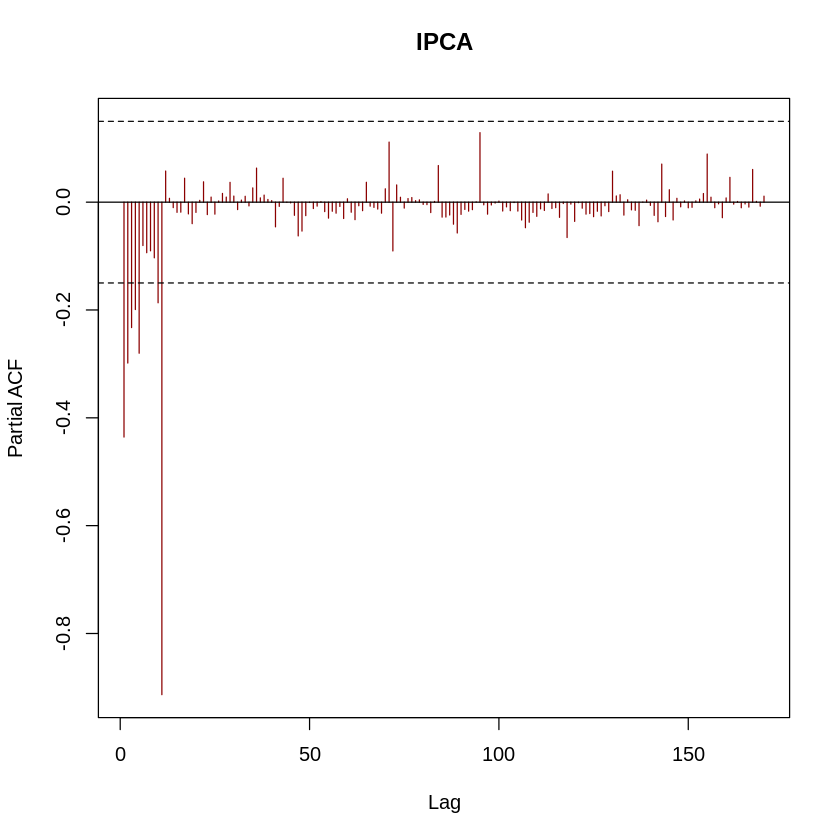

In [ ]:
pacf(treino_diff$ipca, main = "IPCA", col = "darkred", ci.col = "black", lag.max = length(treino_diff$ipca) - 1)

In [ ]:
summary( ur.df( treino_diff$ipca, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94803 -0.08927 -0.00337  0.08198  1.44428 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.446e-03  5.359e-02  -0.120   0.9044    
z.lag.1      -1.004e+01  1.237e+00  -8.119 1.97e-13 ***
tt           -1.064e-04  5.222e-04  -0.204   0.8389    
z.diff.lag1   8.176e+00  1.187e+00   6.885 1.68e-10 ***
z.diff.lag2   7.329e+00  1.084e+00   6.759 3.27e-10 ***
z.diff.lag3   6.484e+00  9.813e-01   6.608 7.17e-10 ***
z.diff.lag4   5.643e+00  8.776e-01   6.430 1.79e-09 ***
z.diff.lag5   4.798e+00  7.739e-01   6.200 5.71e-09 ***
z.diff.lag6   3.960e+00  6.701e-01   5.909 2.41e-08 ***
z.diff.lag7   3.126e+00  5.664e-01   5.519 1.55e-07 ***
z.diff.lag8   2.298e+00  4.632e-

Como as estatísticas calculadas de teste t são maiores em módulo que as estatísticas críticas de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste ADF. Portanto pode-se afirmar que a série temporal não possui raiz unitária, o que significa que pode-se afirmar que a série é estacionária.

In [ ]:
summary( ur.kpss( treino_diff$ipca, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0135 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


Como a estatística calculada de teste t é menor em módulo que a estatística crítica de teste t (no nível de significância de 0.05), não se rejeita a hipótese nula do teste KPSS. Portanto pode-se concluir que a série temporal não possui raiz unitária, o que significa que a série é estacionária.

**ARIMA: a estimativa**

In [ ]:
ipca_ts = ipca$`1643`
ipca_ts

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2004  0.68  6.70  0.62  0.40  0.25  0.19  0.27  0.57  0.13 -0.08  0.08  0.33
2005  0.34  5.28  0.43  0.14  0.09  0.24  0.17  0.19  0.09 -0.14 -0.03  0.26
2006  0.57  4.44  0.71  0.02 -0.04  0.02  0.09 -0.02 -0.01  0.17  0.03  0.17
2007  0.07  3.48  0.02  0.04  0.06  0.04  0.06  0.38 -0.11  0.01  0.02  0.07
2008  0.20  3.47  0.24  0.05  0.03  0.05 -0.02  0.42 -0.05  0.02  0.05  0.08
2009  0.34  4.77 -0.37  0.09  0.03  0.03  0.11  0.83  0.07  0.04  0.01  0.10
2010  0.26  4.53  0.54  0.11  0.04  0.03 -0.03  0.44  0.08  0.02  0.06  0.05
2011  0.30  5.81  1.04  0.09  0.01  0.11  0.11  0.17  0.14  0.07  0.02  0.05
2012  0.39  5.62  0.54  0.04 -0.01  0.06  0.12  0.51  0.10  0.05  0.05  0.19
2013  0.35  5.40  0.56  0.10  0.06  0.18  0.11  0.67  0.12  0.09  0.08  0.05
2014  0.57  5.97  0.53  0.03  0.13  0.02  0.04  0.43  0.18  0.11  0.21  0.07
2015  0.31  5.88  0.75  0.21  0.06  0.20  0.00  0.82  0.25  0.10  0.22  0.22
2016  0.31  5.90  0.63  0.20  0.16  0.11  0.04  0.99  0.18  0.02  0.06  0.07
2017  0.29  5.04  0.95  0.03  0.08  0.08 -0.02  0.24  0.04  0.06  0.03  0.15
2018  0.22  3.89  0.28  0.08  0.06  0.02 -0.08  0.25  0.24  0.04  0.04  0.21
2019  0.12  3.53  0.32  0.09 -0.04  0.14  0.04  0.16  0.04  0.03  0.08  0.20
2020  0.16  3.70  0.59  0.00  0.02  0.05 -0.12 -3.47 -0.09 -0.04 -0.02  0.48
2021  0.13  2.48 -0.52  0.04  0.06  0.05  0.18  0.28 -0.01  0.06  0.02  0.05
2022  0.25  5.61  0.15  0.06  0.04  0.09  0.06  0.61  0.12  0.18  0.02  0.19
2023  0.36  6.28  0.10  0.09  0.05  0.06  0.13  0.69  0.05  0.05  0.02  0.24
2024  0.33  4.98  0.14  0.05  0.09

In [ ]:
treino <- window(ipca_ts, end = c(2018, 4))
teste <- window(ipca_ts, start = c(2018, 5))

In [ ]:
arima_treino = auto.arima(treino)
arima_treino

Series: treino 
ARIMA(3,0,0)(2,1,0)[12] 

Coefficients:
         ar1     ar2     ar3     sar1    sar2
      0.1558  0.0202  0.0377  -0.0165  0.1050
s.e.  0.0796  0.0855  0.0891   0.0906  0.0953

sigma^2 = 0.09701:  log likelihood = -38.01
AIC=88.02   AICc=88.57   BIC=106.47

In [ ]:
accuracy(arima_treino,train=treino)

ME         RMSE      MAE       MPE  MAPE MASE      ACF1        
Training set -0.0226111 0.2956772 0.1649881 -Inf Inf  0.9384324 -0.005920426

In [ ]:
arima = arima_treino %>% forecast(h = length(teste))

In [ ]:
accuracy(arima,test=teste)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


ME          RMSE        MAE         MPE        MAPE       MASE
Training set 0.001463332 0.002766386 0.001463332 0.09999982 0.09999982 NaN 
             ACF1      
Training set -0.2165122

**ARIMA: a projeção**

In [ ]:
arima_projecao = arima_treino %>% forecast(h = length(teste)+round((2025-1/12-max(dat$mes))*12))

In [ ]:
data = data.frame( value = ts( c( head(dat, round(nrow(dat) * 0.7))$ipca,  arima_projecao$mean ) ),
                   dates = seq(as.Date('2004-01-01'), as.Date('2024-12-01'), by='month') )

In [ ]:
forecast = read.table(textConnection(
  paste("Beg, End
",paste(as.Date(date_decimal(max(dat$mes))),'2024-12-01',sep=','))), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


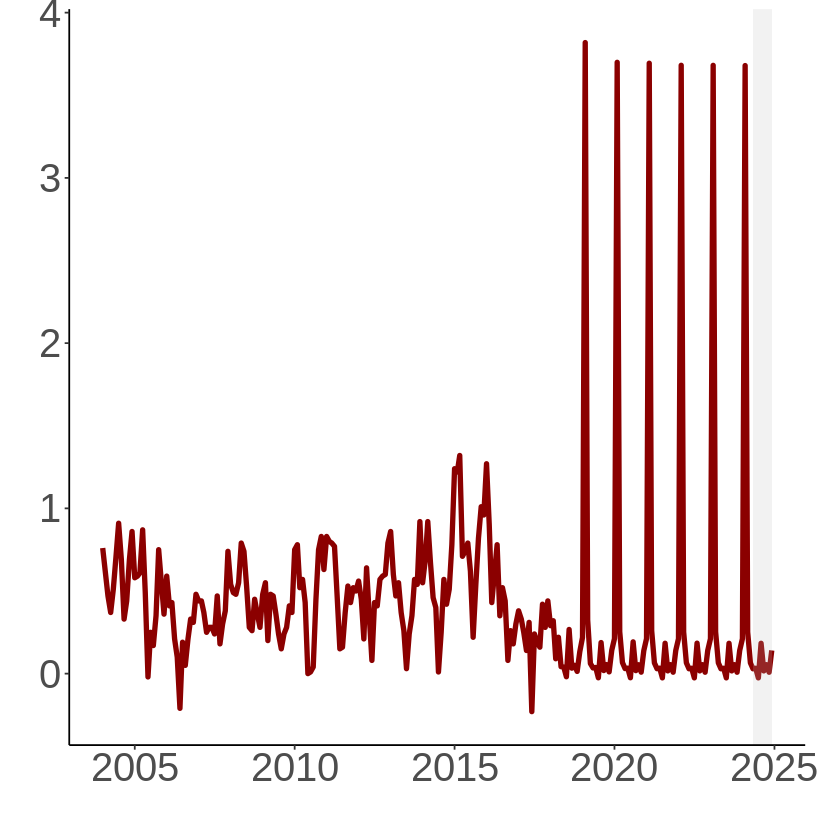

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  value ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) )

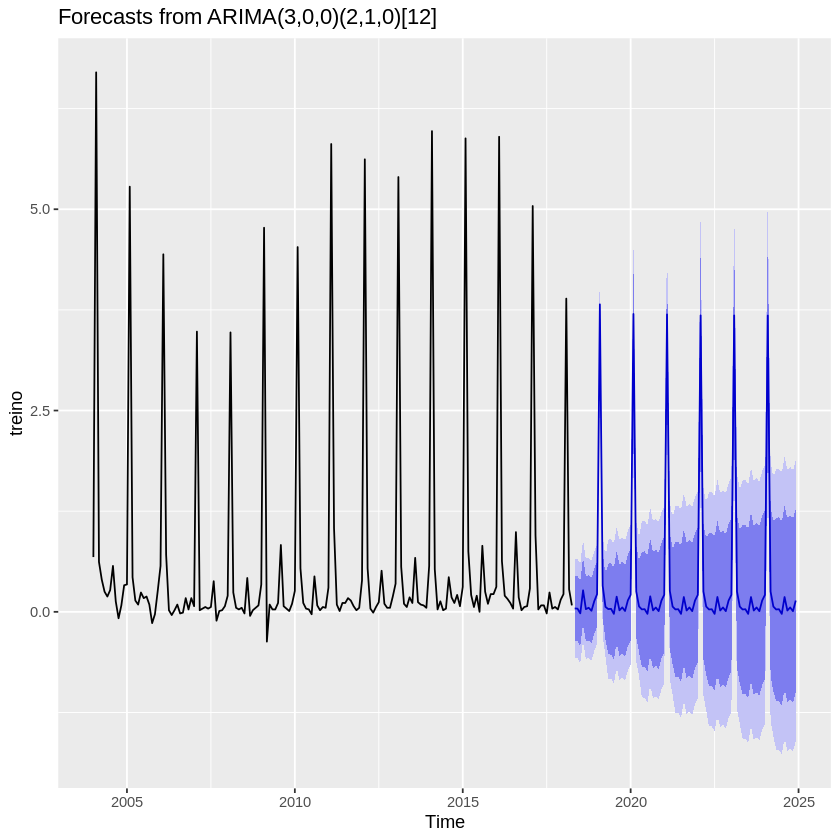

In [ ]:
autoplot(arima_projecao)

**ARIMA: os resíduos**

In [ ]:
df=data.frame(value=as.numeric(treino))
df$mes=time(df$value)

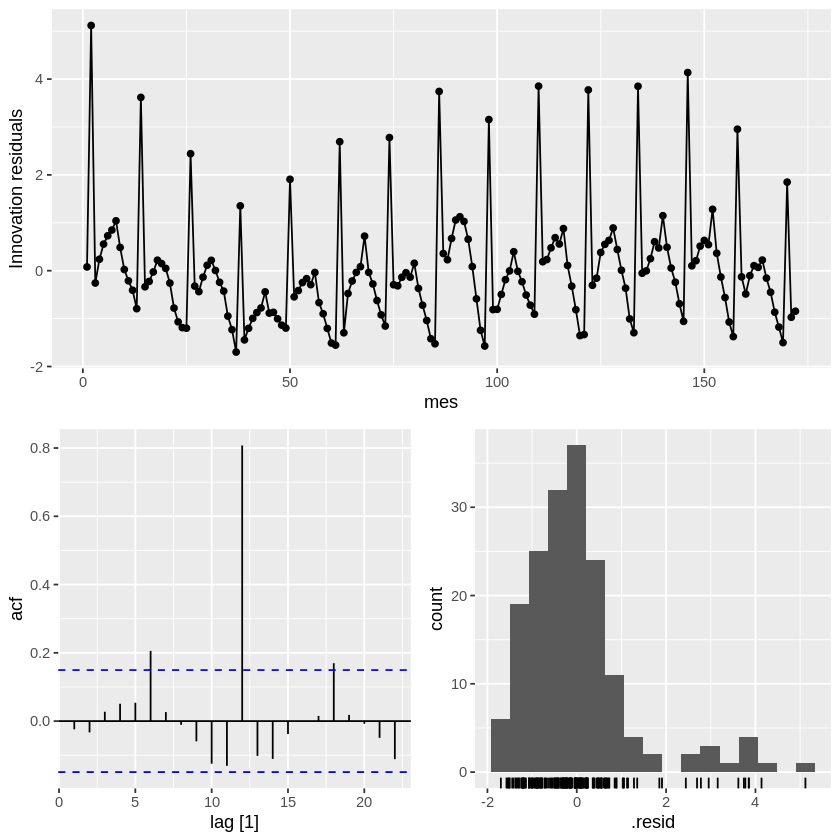

In [ ]:
df %>% as_tsibble(index=mes) %>%  model( ARIMA( value ) )  %>%
  gg_tsresiduals()

In [ ]:
df=data.frame(value=as.numeric(window(arima_projecao$mean, start = c(2024, 1)))/100+1)
educacao_acumulado=(prod(df$value)-1)*100
educacao_acumulado

[1] 4.685992

# **Comparações acumulado 2024**

Cálculo do índice ponderado pelos pesos mais recentes (maio):

In [ ]:
ipca_acumulado_agregado

[1] 5.762844

In [ ]:
ipca_acumulado_desagregado = (alimentacao_e_bebidas_acumulado*21.4858
                            +habitacao_acumulado*15.1591
                            +artigos_de_residencia_acumulado*3.7165
                            +vestuario_acumulado*4.6925
                            +transportes_acumulado*20.5342
                            +comunicacao_acumulado*4.8004
                            +saude_e_cuidados_pessoais_acumulado*13.4649
                            +despesas_pessoais_acumulado*10.0915
                            +educacao_acumulado*6.0552)/100


ipca_acumulado_desagregado

[1] 4.932827

Relatório Focus 28/06: IPCA=4%

# **Conclusão**

A análise desagregada se mostrou mais próxima da espectativa do mercado. No entanto, os modelos não aparentam estar próximos da realidade, isso pode ser observado nos gráficos das projeções (média e amplitude dos intervalos de confiança). Embora a divisão 70/30 da base de treino e teste seja válida, uma divisão 80/20 ou até 85/15 pode ser mais equilibrada e adequada, devido ao tamanho da amostra de dados utilizada, e especialmente para séries temporais com forte sazonalidade, como é o caso do ipca.